In [1]:
cd ../..

/Users/joeranbosma/stack/Projects/M5Forecast


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, gc
import matplotlib.pyplot as plt

# own imports
from evaluation import Referee, load_data, select_dates, select_day_nums
from train import get_chronological_train_val_split, get_train_val_slit, train_lightgbm_model

# Setup file paths
data_dir = 'data/'
os.environ['DATA_DIR'] = data_dir
sub_dir = 'submissions_uncertainty/'
plt.rcParams['font.size'] = 13

# Hardcode requested quantiles
quantiles = [0.005, 0.025, 0.165, 0.25, 0.5, 0.75, 0.835, 0.975, 0.995]

/Users/joeranbosma/opt/anaconda3/envs/mlip/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
/Users/joeranbosma/opt/anaconda3/envs/mlip/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence


# Train LightGBM - multiple levels - 5-fold chronological cross-validation

In [3]:
model_dir = 'models/uncertainty/final/run1/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

## Define model architectures

In [4]:
params = {
    'boosting_type': 'gbdt',
    'metric': 'mae',
    'objective': 'regression',
    'n_jobs': -1,
    'seed': 236,
    'learning_rate': 0.1,
    'bagging_fraction': 0.75,
    'bagging_freq': 10,
    'colsample_bytree': 0.75}

## Perform training scheme

/Users/joeranbosma/opt/anaconda3/envs/mlip/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


>>>>>>>>>>>>>>>> LAG IS 28 <<<<<<<<<<<<<<<
========== Starting level 1 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.049644
Early stopping, best iteration is:
[44]	valid_0's l1: 0.0493934


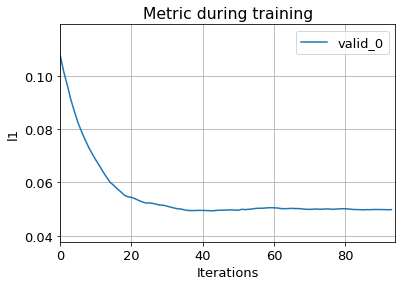

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0314648
[100]	valid_0's l1: 0.0303645
Early stopping, best iteration is:
[73]	valid_0's l1: 0.0298529


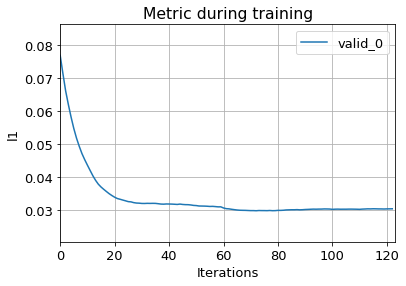

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0351158
[100]	valid_0's l1: 0.0345754
[150]	valid_0's l1: 0.0343509
Early stopping, best iteration is:
[133]	valid_0's l1: 0.0342514


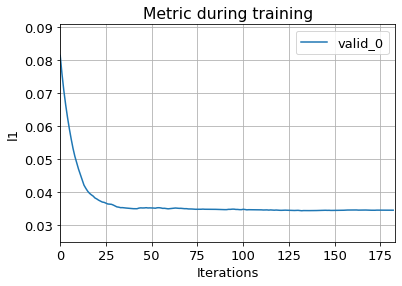

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0357032
[100]	valid_0's l1: 0.034778
Early stopping, best iteration is:
[80]	valid_0's l1: 0.0344774


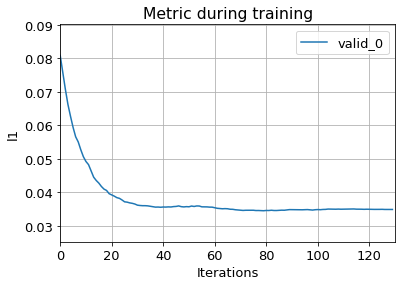

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0722209
[100]	valid_0's l1: 0.0742268
Early stopping, best iteration is:
[55]	valid_0's l1: 0.0710907


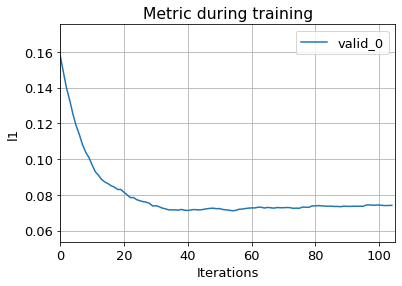

========== Starting level 2 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0356946
[100]	valid_0's l1: 0.0343413
[150]	valid_0's l1: 0.0343013
Early stopping, best iteration is:
[121]	valid_0's l1: 0.033977


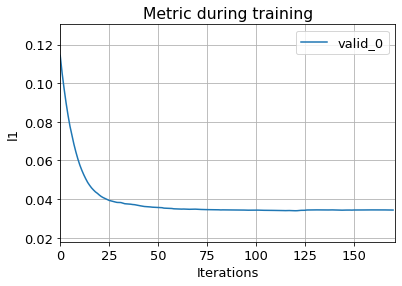

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0283865
[100]	valid_0's l1: 0.027284
[150]	valid_0's l1: 0.0267839
[200]	valid_0's l1: 0.0264995
[250]	valid_0's l1: 0.0262115
[300]	valid_0's l1: 0.0261881
Early stopping, best iteration

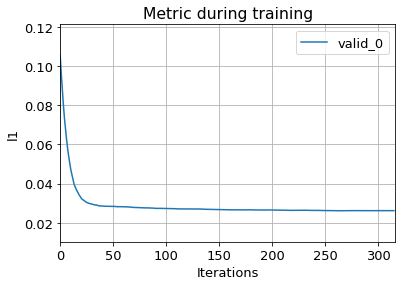

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0301848
[100]	valid_0's l1: 0.0291118
[150]	valid_0's l1: 0.0289122
Early stopping, best iteration is:
[132]	valid_0's l1: 0.0287358


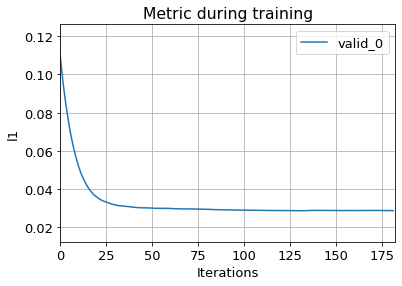

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0304352
[100]	valid_0's l1: 0.0297613
[150]	valid_0's l1: 0.0294831
[200]	valid_0's l1: 0.0291889
[250]	valid_0's l1: 0.0291417
[300]	valid_0's l1: 0.0290423
[350]	valid_0's l1: 0.0290153

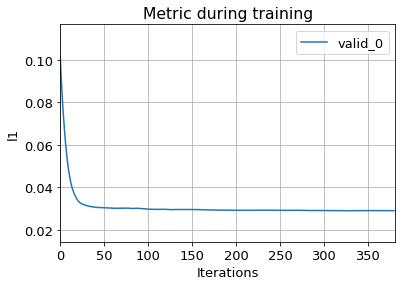

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0402228
[100]	valid_0's l1: 0.04081
Early stopping, best iteration is:
[64]	valid_0's l1: 0.0394615


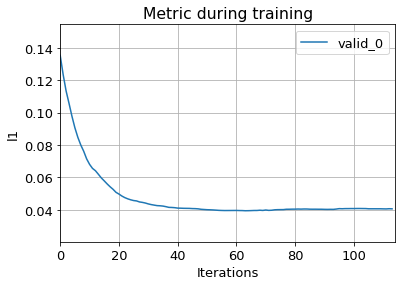

========== Starting level 3 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0287665
[100]	valid_0's l1: 0.0279615
[150]	valid_0's l1: 0.027448
[200]	valid_0's l1: 0.0274343
Early stopping, best iteration is:
[190]	valid

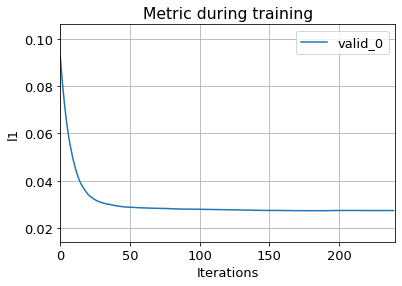

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0262454
[100]	valid_0's l1: 0.0257883
[150]	valid_0's l1: 0.0253694
[200]	valid_0's l1: 0.0251586
[250]	valid_0's l1: 0.0250424
[300]	valid_0's l1: 0.0249099
Early stopping, b

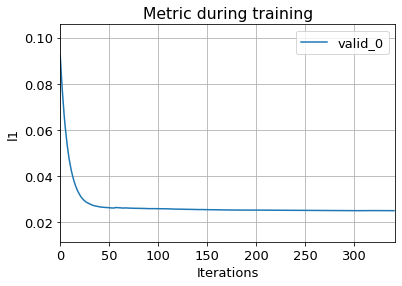

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0265517
[100]	valid_0's l1: 0.0256575
[150]	valid_0's l1: 0.0253466
[200]	valid_0's l1: 0.0252566
[250]	valid_0's l1: 0.0251249
[300]	valid_0's l1: 0.0251032
[350]	valid_0's l

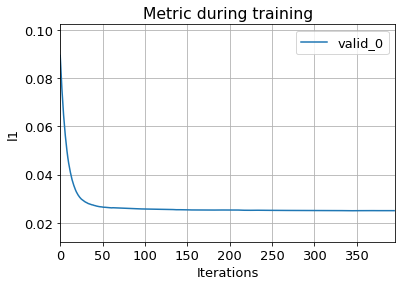

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.027816
[100]	valid_0's l1: 0.0269837
[150]	valid_0's l1: 0.0265621
[200]	valid_0's l1: 0.026405
[250]	valid_0's l1: 0.0261191
[300]	valid_0's l1: 0.0260589
[350]	valid_0's l1:

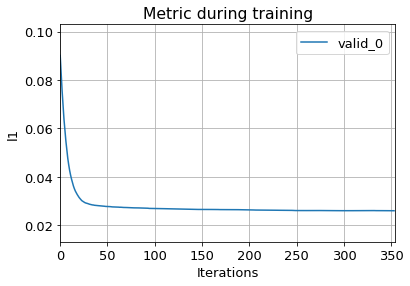

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.030063
Early stopping, best iteration is:
[49]	valid_0's l1: 0.0299978


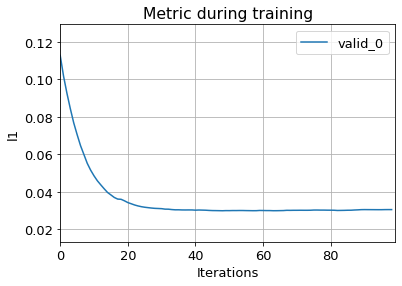

========== Starting level 4 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0308582
[100]	valid_0's l1: 0.0301646
Early stopping, best iteration is:
[69]	valid_0's l1: 0.0300114


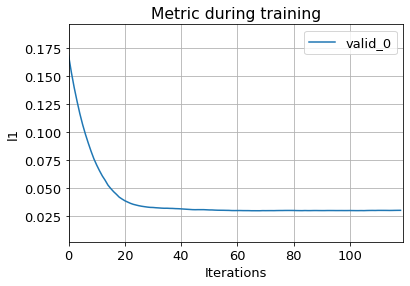

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0213122
[100]	valid_0's l1: 0.0208372
[150]	valid_0's l1: 0.020708
[200]	valid_0's l1: 0.0206464
[250]	valid_0's l1: 0.0205022
[300]	valid_0's l1: 0.0204901
Early stopping, best iteration i

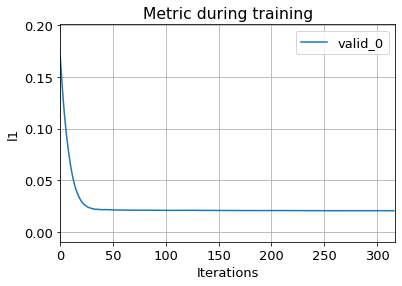

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0243096
[100]	valid_0's l1: 0.0237734
[150]	valid_0's l1: 0.0237656
[200]	valid_0's l1: 0.0235015
[250]	valid_0's l1: 0.0234544
Early stopping, best iteration is:
[220]	valid_0's l1: 0.0234

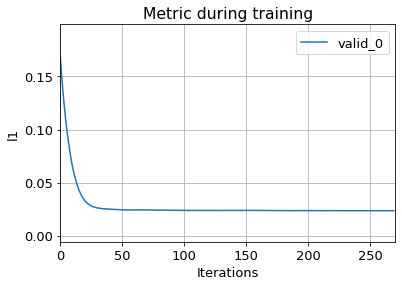

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0252018
[100]	valid_0's l1: 0.0241021
[150]	valid_0's l1: 0.024009
[200]	valid_0's l1: 0.0238724
[250]	valid_0's l1: 0.0237759
[300]	valid_0's l1: 0.0236677
[350]	valid_0's l1: 0.0236162
[4

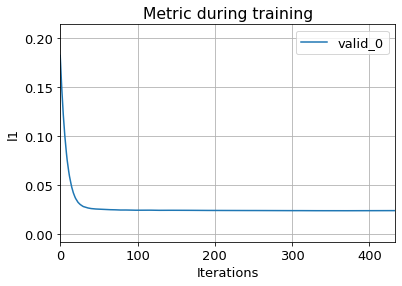

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0308338
[100]	valid_0's l1: 0.0304653
[150]	valid_0's l1: 0.0302403
[200]	valid_0's l1: 0.0303447
Early stopping, best iteration is:
[157]	valid_0's l1: 0.0301774


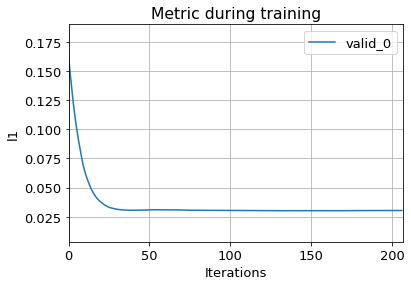

========== Starting level 5 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0216218
[100]	valid_0's l1: 0.0211048
[150]	valid_0's l1: 0.0205844
[200]	valid_0's l1: 0.0205914
[250]	valid_0's l1: 0.020435
[300]	valid_0's l1:

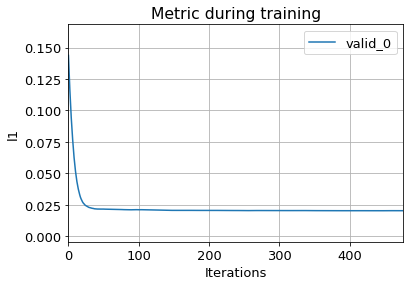

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0182075
[100]	valid_0's l1: 0.0178108
[150]	valid_0's l1: 0.0175441
[200]	valid_0's l1: 0.0174315
[250]	valid_0's l1: 0.0172966
[300]	valid_0's l1: 0.0172228
[350]	valid_0's l1: 

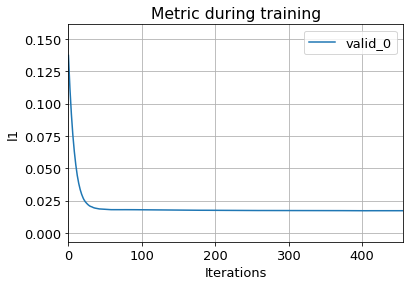

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0199738
[100]	valid_0's l1: 0.019599
[150]	valid_0's l1: 0.0194008
[200]	valid_0's l1: 0.0193703
[250]	valid_0's l1: 0.0193001
Early stopping, best iteration is:
[247]	valid_0's 

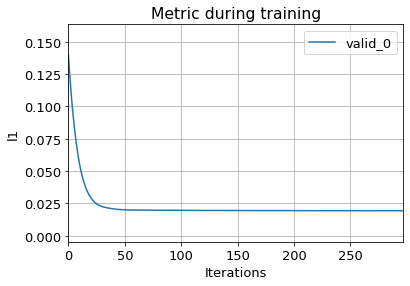

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0214957
[100]	valid_0's l1: 0.0207434
[150]	valid_0's l1: 0.020692
Early stopping, best iteration is:
[130]	valid_0's l1: 0.0206354


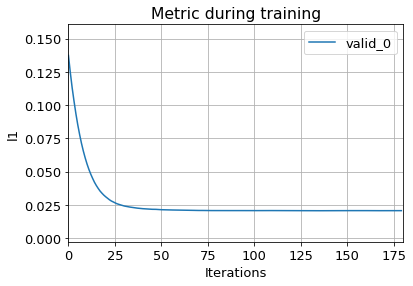

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0365498
[100]	valid_0's l1: 0.0355343
[150]	valid_0's l1: 0.0352764
[200]	valid_0's l1: 0.0351254
[250]	valid_0's l1: 0.0351465
Early stopping, best iteration is:
[219]	valid_0's l1: 0.

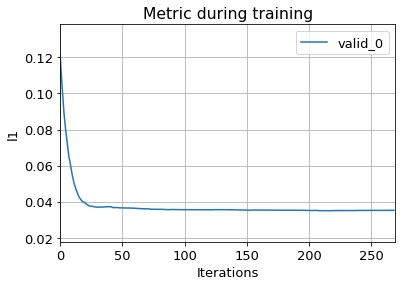

========== Starting level 6 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.022512
[100]	valid_0's l1: 0.0216465
[150]	valid_0's l1: 0.0215226
[200]	valid_0's l1: 0.0213885
[250]	valid_0's l1: 0.0213581
Early stopping, be

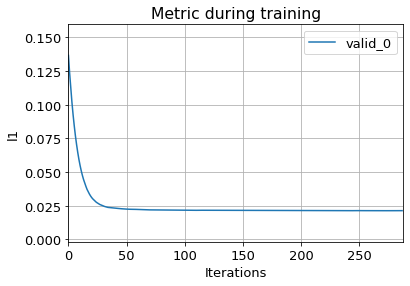

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.019347
[100]	valid_0's l1: 0.0186622
[150]	valid_0's l1: 0.0185024
[200]	valid_0's l1: 0.0184057
[250]	valid_0's l1: 0.0183382
[300]	valid_0's l1: 0.0183556
Early stopping, best

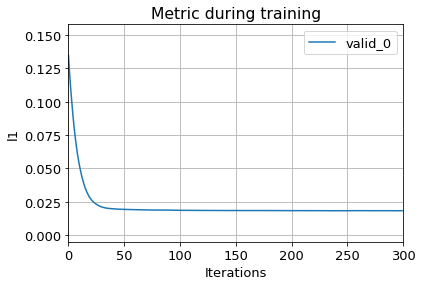

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0221325
[100]	valid_0's l1: 0.0212501
[150]	valid_0's l1: 0.0211421
[200]	valid_0's l1: 0.0210074
[250]	valid_0's l1: 0.020844
[300]	valid_0's l1: 0.0207977
Early stopping, best

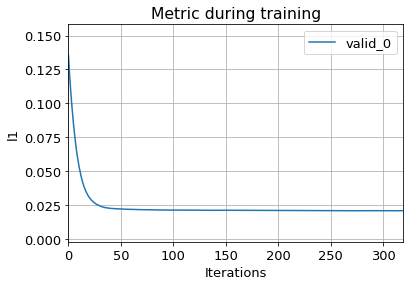

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0231885
[100]	valid_0's l1: 0.022273
[150]	valid_0's l1: 0.0220064
[200]	valid_0's l1: 0.0219435
Early stopping, best iteration is:
[192]	valid_0's l1: 0.0219127


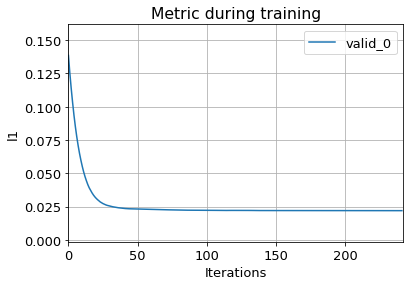

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.032067
[100]	valid_0's l1: 0.0318771
Early stopping, best iteration is:
[87]	valid_0's l1: 0.0317965


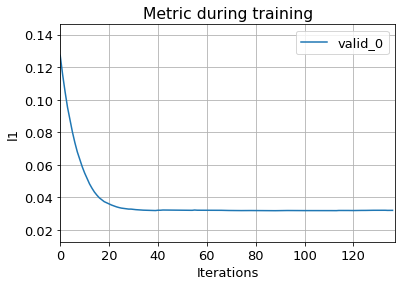

========== Starting level 7 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0172002
[100]	valid_0's l1: 0.0168437
[150]	valid_0's l1: 0.0167722
[200]	valid_0's l1: 0.016696
Early stopping, best iteration is:
[1

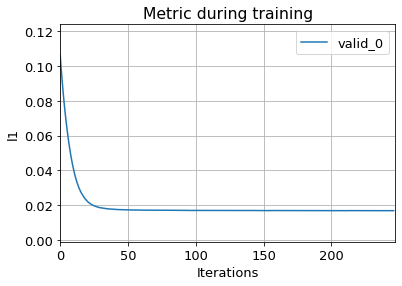

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0152438
[100]	valid_0's l1: 0.0147555
[150]	valid_0's l1: 0.0145293
[200]	valid_0's l1: 0.014376
[250]	valid_0's l1: 0.014306
[300]	valid_0's l1: 0.0141887
[350]	vali

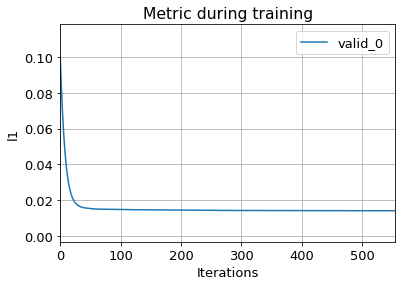

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0169127
[100]	valid_0's l1: 0.0161556
[150]	valid_0's l1: 0.0161219
[200]	valid_0's l1: 0.0160152
[250]	valid_0's l1: 0.0160536
[300]	valid_0's l1: 0.0159999
Early st

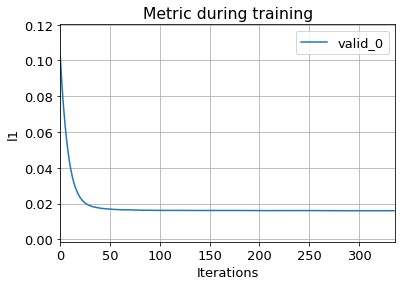

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0171866
[100]	valid_0's l1: 0.016355
[150]	valid_0's l1: 0.0162369
[200]	valid_0's l1: 0.0161735
[250]	valid_0's l1: 0.0160983
[300]	valid_0's l1: 0.0160513
[350]	val

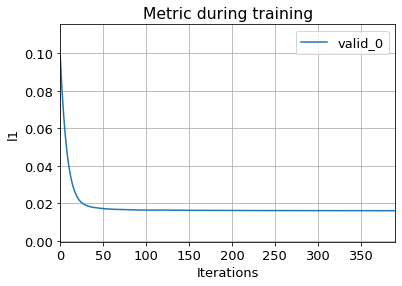

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0239573
[100]	valid_0's l1: 0.0232777
[150]	valid_0's l1: 0.0231048
[200]	valid_0's l1: 0.0228444
[250]	valid_0's l1: 0.0228496
Early stopping, best iteration is:
[218]	vali

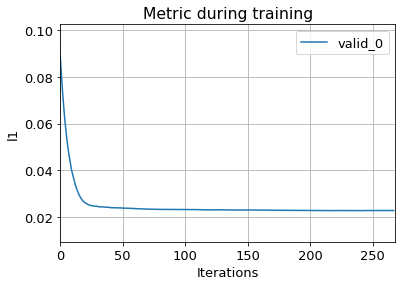

========== Starting level 8 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0208643
[100]	valid_0's l1: 0.020281
[150]	valid_0's l1: 0.0201267
[200]	valid_0's l1: 0.0199427
[250]	valid_0's l1: 0.0198391
[300]

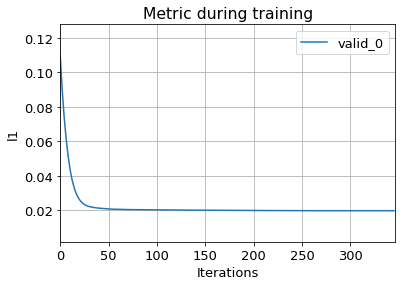

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0183845
[100]	valid_0's l1: 0.0177521
[150]	valid_0's l1: 0.0175433
[200]	valid_0's l1: 0.0173718
[250]	valid_0's l1: 0.0172644
Early stopping, best iteration is:
[

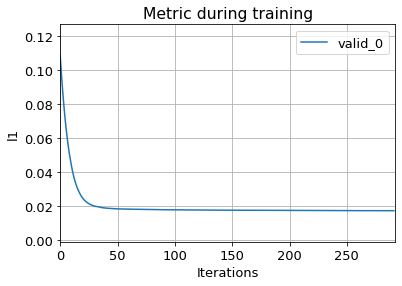

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.019549
[100]	valid_0's l1: 0.0190122
[150]	valid_0's l1: 0.0188746
[200]	valid_0's l1: 0.0187756
[250]	valid_0's l1: 0.0187291
[300]	valid_0's l1: 0.0187164
Early s

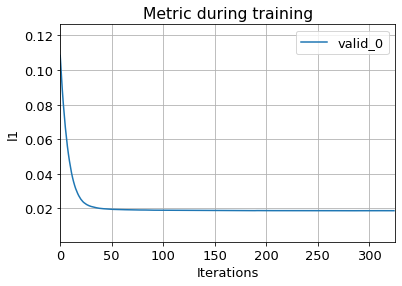

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0197308
[100]	valid_0's l1: 0.0191596
[150]	valid_0's l1: 0.0189183
[200]	valid_0's l1: 0.0187949
[250]	valid_0's l1: 0.0187279
[300]	valid_0's l1: 0.0186557
[350]	

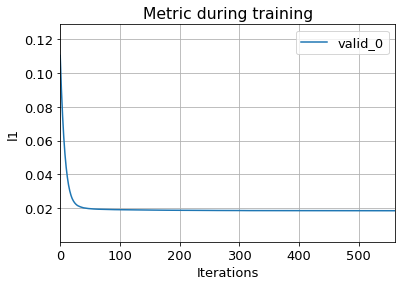

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0244364
[100]	valid_0's l1: 0.0243093
Early stopping, best iteration is:
[79]	valid_0's l1: 0.0240605


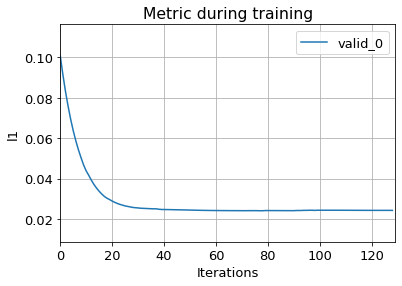

========== Starting level 9 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0145746
[100]	valid_0's l1: 0.0142778
[150]	valid_0's l1: 0.0141793
[200]	valid_0's l1: 0.0140626
[250]	valid_0's l1: 0.01

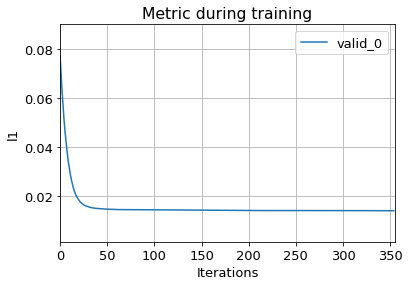

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0132239
[100]	valid_0's l1: 0.0129806
[150]	valid_0's l1: 0.0128925
[200]	valid_0's l1: 0.0127698
[250]	valid_0's l1: 0.0127108
[300]	valid_0's l1: 0.0126

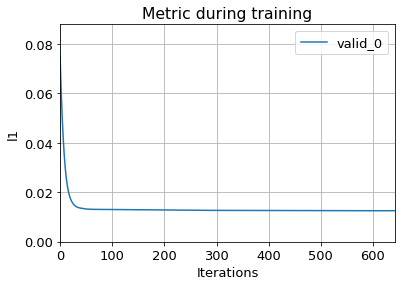

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0140892
[100]	valid_0's l1: 0.0136638
[150]	valid_0's l1: 0.0135527
[200]	valid_0's l1: 0.0134485
[250]	valid_0's l1: 0.0134047
[300]	valid_0's l1: 0.0133

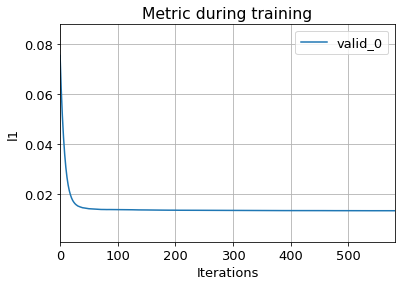

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0143442
[100]	valid_0's l1: 0.0138924
[150]	valid_0's l1: 0.0137636
[200]	valid_0's l1: 0.0137365
[250]	valid_0's l1: 0.013638
[300]	valid_0's l1: 0.01356

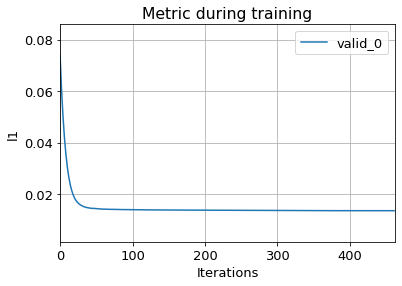

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0176807
[100]	valid_0's l1: 0.0175599
Early stopping, best iteration is:
[90]	valid_0's l1: 0.0174374


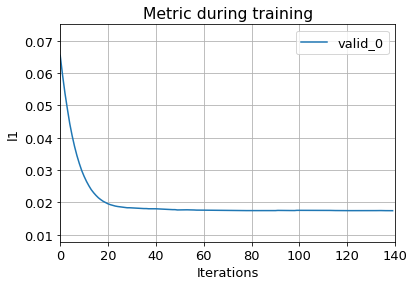

========== Starting level 10 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00223204
[100]	valid_0's l1: 0.00219906
[150]	valid_0's l1: 0.00219203
[200]	valid_0's l1: 0.00218593
[250]	valid_0's l1: 0.00218305
[

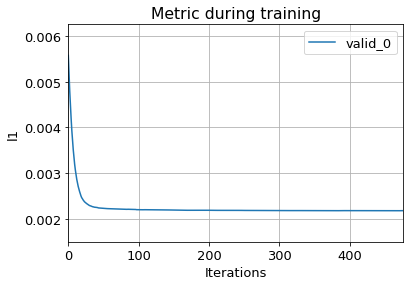

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00206681
[100]	valid_0's l1: 0.0020346
[150]	valid_0's l1: 0.00202224
[200]	valid_0's l1: 0.00201707
[250]	valid_0's l1: 0.00201437
[300]	valid_0's l1: 0.00201283
[350

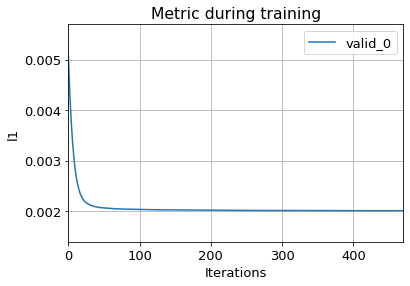

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00197985
[100]	valid_0's l1: 0.00193013
[150]	valid_0's l1: 0.00191989
[200]	valid_0's l1: 0.00191031
[250]	valid_0's l1: 0.00190636
[300]	valid_0's l1: 0.00190314
[35

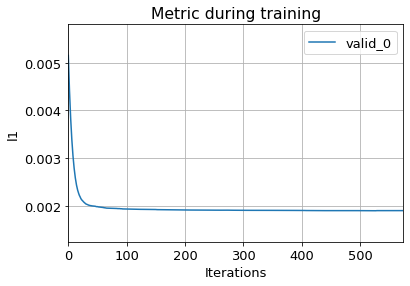

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0017148
[100]	valid_0's l1: 0.00166597
[150]	valid_0's l1: 0.00166053
[200]	valid_0's l1: 0.00165562
[250]	valid_0's l1: 0.00164573
[300]	valid_0's l1: 0.001644
[350]	

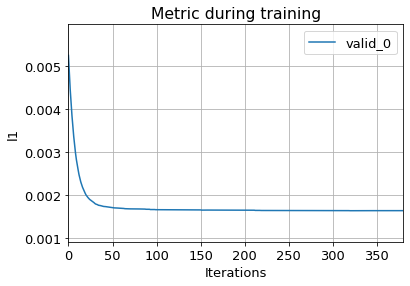

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00174668
Early stopping, best iteration is:
[47]	valid_0's l1: 0.00172987


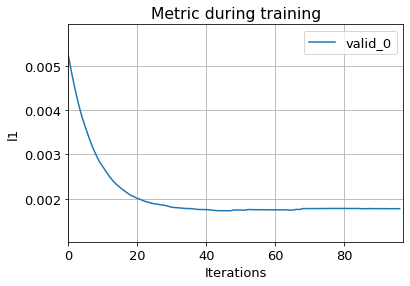

========== Starting level 11 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00106485
[100]	valid_0's l1: 0.00104837
[150]	valid_0's l1: 0.00104517
[200]	valid_0's l1: 0.00104288
[250]	valid_0's l1: 

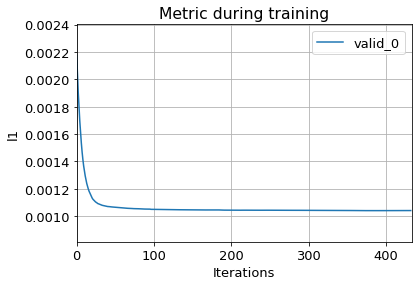

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000943064
[100]	valid_0's l1: 0.000926939
[150]	valid_0's l1: 0.000922338
[200]	valid_0's l1: 0.000919745
[250]	valid_0's l1: 0.000918346
[300]	valid_0's l

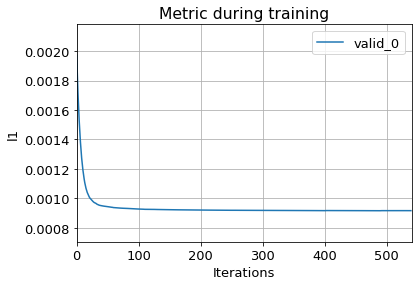

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000904249
[100]	valid_0's l1: 0.000885039
[150]	valid_0's l1: 0.000879885
[200]	valid_0's l1: 0.000878041
[250]	valid_0's l1: 0.00087434
[300]	valid_0's l1

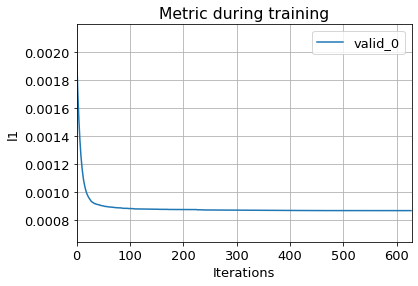

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000802932
[100]	valid_0's l1: 0.000781624
[150]	valid_0's l1: 0.000775831
[200]	valid_0's l1: 0.000772691
[250]	valid_0's l1: 0.000770372
[300]	valid_0's l

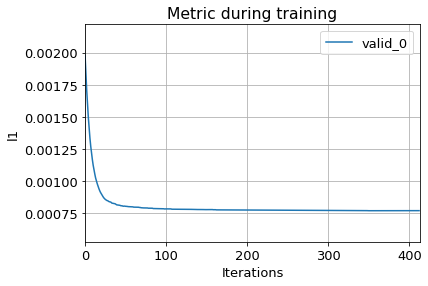

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000756128
[100]	valid_0's l1: 0.000891074
Early stopping, best iteration is:
[54]	valid_0's l1: 0.000754928


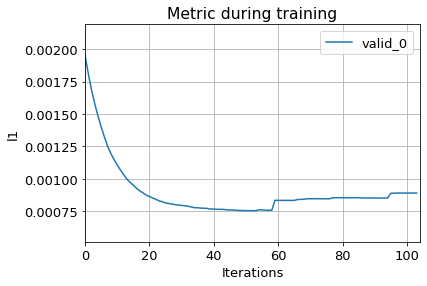

========== Starting level 12 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-11-07 19:11:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0007020

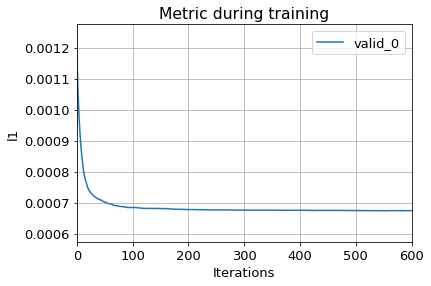

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-06-20 14:23:59.600000 and 2015-11-07 19:11:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000632974
[100]	valid_0's l1: 0.00061622

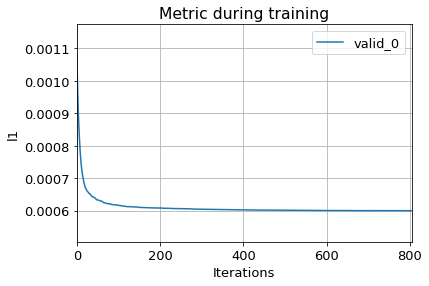

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-01-31 09:35:59.400000 and 2015-06-20 14:23:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000670051
Early stopping, best iteration

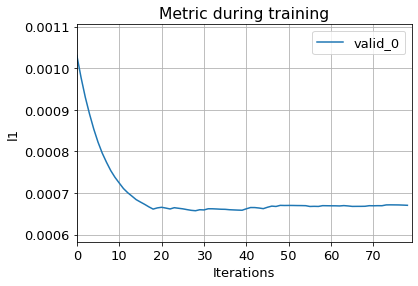

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-09-13 04:47:59.200000 and 2015-01-31 09:35:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000578925
[100]	valid_0's l1: 0.00056549

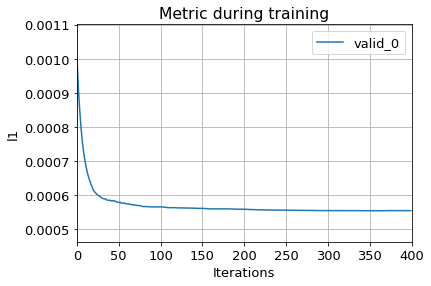

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t28', 'shift_t29', 'shift_t30', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-04-25 23:59:59 and 2014-09-13 04:47:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000613651
[100]	valid_0's l1: 0.000598368
[150]

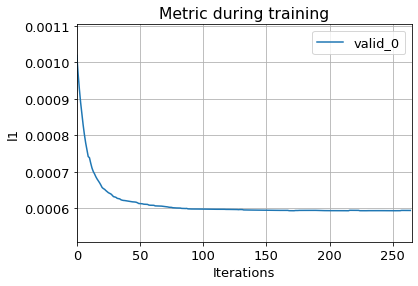

>>>>>>>>>>>>>>>> LAG IS 21 <<<<<<<<<<<<<<<
========== Starting level 1 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0482725
[100]	valid_0's l1: 0.0485938
Early stopping, best iteration is:
[50]	valid_0's l1: 0.0482725


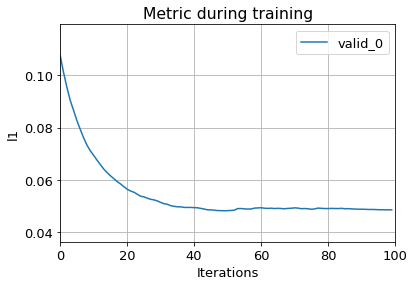

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.029866
[100]	valid_0's l1: 0.0289513
[150]	valid_0's l1: 0.0288702
[200]	valid_0's l1: 0.0285843
[250]	valid_0's l1: 0.0285176
[300]	valid_0's l1: 0.0283915
[350]	valid_0's l1: 0.0283965
[400]	valid_

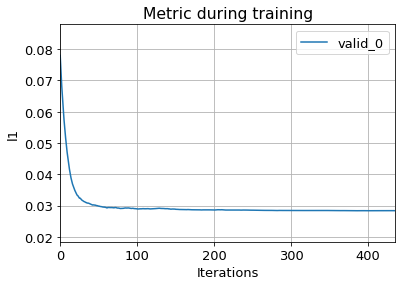

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.033443
[100]	valid_0's l1: 0.032849
Early stopping, best iteration is:
[96]	valid_0's l1: 0.0327627


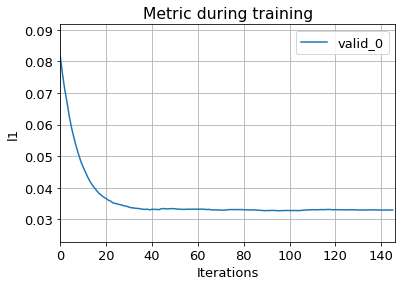

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0347598
[100]	valid_0's l1: 0.0348335
Early stopping, best iteration is:
[70]	valid_0's l1: 0.034421


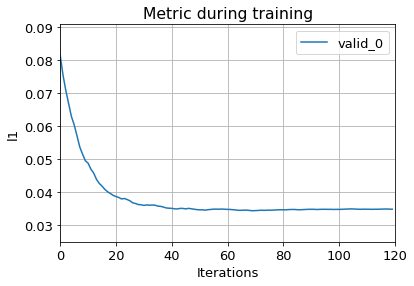

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0931909
[100]	valid_0's l1: 0.0902447
[150]	valid_0's l1: 0.0893924
Early stopping, best iteration is:
[109]	valid_0's l1: 0.0874078


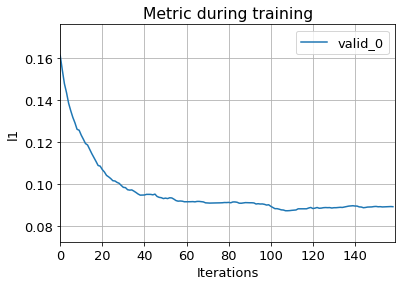

========== Starting level 2 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0365307
[100]	valid_0's l1: 0.0346179
[150]	valid_0's l1: 0.0345693
Early stopping, best iteration is:
[117]	valid_0's l1: 0.0343177


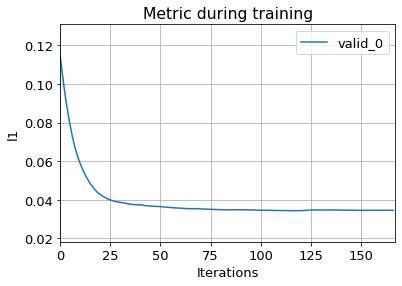

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0269719
[100]	valid_0's l1: 0.0258446
[150]	valid_0's l1: 0.0253653
[200]	valid_0's l1: 0.0249122
[250]	valid_0's l1: 0.024928
Early stopping, best iteration is:
[208]	valid_0's l1: 0.024

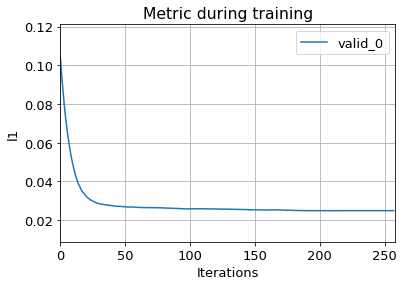

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0281049
[100]	valid_0's l1: 0.026819
[150]	valid_0's l1: 0.0262921
[200]	valid_0's l1: 0.0262626
[250]	valid_0's l1: 0.0262675
Early stopping, best iteration is:
[218]	valid_0's l1: 0.026

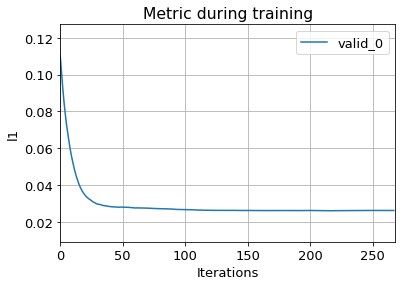

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0310076
[100]	valid_0's l1: 0.0300254
[150]	valid_0's l1: 0.0299275
[200]	valid_0's l1: 0.0296509
[250]	valid_0's l1: 0.0294598
[300]	valid_0's l1: 0.0294274
[350]	valid_0's l1: 0.0293078

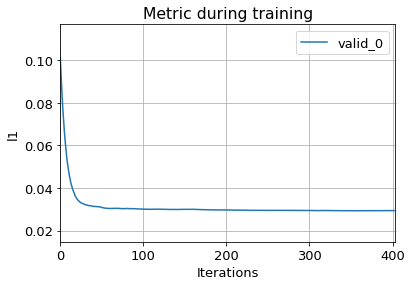

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0457595
[100]	valid_0's l1: 0.0468745
Early stopping, best iteration is:
[75]	valid_0's l1: 0.0448514


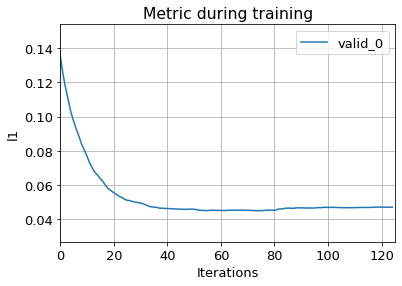

========== Starting level 3 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0294695
[100]	valid_0's l1: 0.0282831
[150]	valid_0's l1: 0.027866
[200]	valid_0's l1: 0.0276901
[250]	valid_0's l1: 0.0276368
[300]	valid_0's 

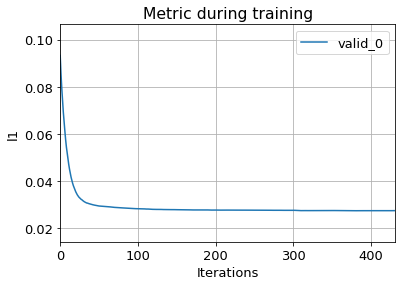

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0254774
[100]	valid_0's l1: 0.0245167
[150]	valid_0's l1: 0.0241511
[200]	valid_0's l1: 0.0238473
[250]	valid_0's l1: 0.0237077
[300]	valid_0's l1: 0.023683
Early stopping, be

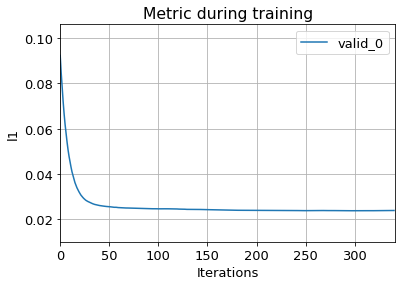

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0261863
[100]	valid_0's l1: 0.0250915
[150]	valid_0's l1: 0.0248752
[200]	valid_0's l1: 0.0248578
[250]	valid_0's l1: 0.0247093
[300]	valid_0's l1: 0.0246552
[350]	valid_0's l

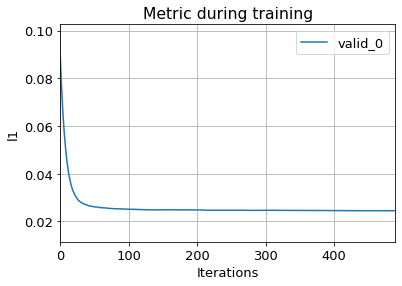

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0277295
[100]	valid_0's l1: 0.0265427
[150]	valid_0's l1: 0.0264071
[200]	valid_0's l1: 0.0262482
[250]	valid_0's l1: 0.0260493
[300]	valid_0's l1: 0.02603
[350]	valid_0's l1:

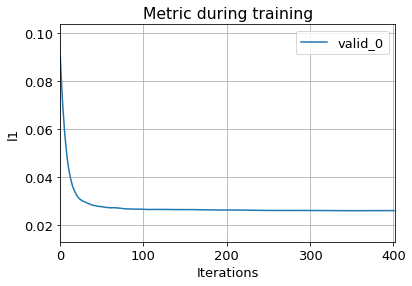

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0303366
[100]	valid_0's l1: 0.0295221
[150]	valid_0's l1: 0.0297556
Early stopping, best iteration is:
[117]	valid_0's l1: 0.0293655


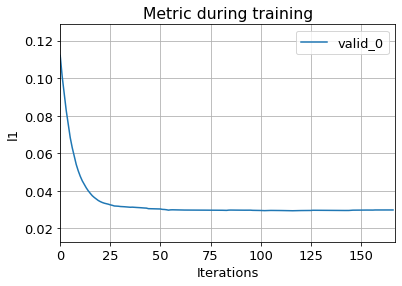

========== Starting level 4 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0325134
[100]	valid_0's l1: 0.0308496
[150]	valid_0's l1: 0.0301128
[200]	valid_0's l1: 0.0301856
Early stopping, best iteration is:
[162]	valid_0's l1: 0.03

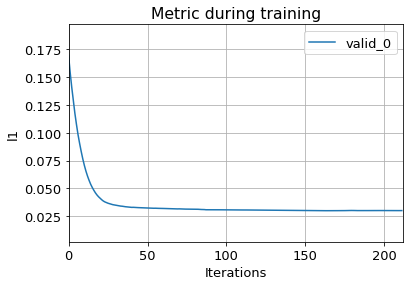

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0213272
[100]	valid_0's l1: 0.0210569
[150]	valid_0's l1: 0.0207443
[200]	valid_0's l1: 0.0206661
[250]	valid_0's l1: 0.0206205
Early stopping, best iteration is:
[212]	valid_0's l1: 0.0205

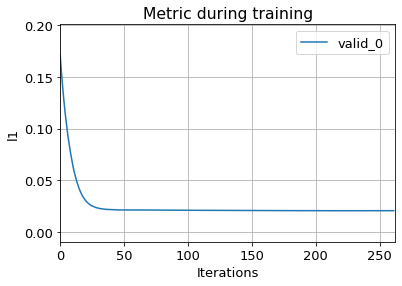

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0230053
[100]	valid_0's l1: 0.0232487
Early stopping, best iteration is:
[60]	valid_0's l1: 0.0227328


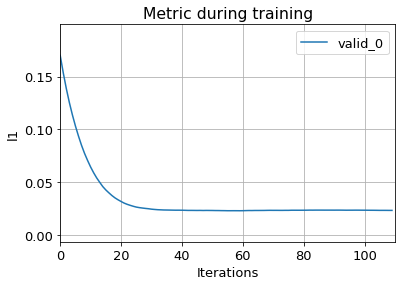

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0260059
[100]	valid_0's l1: 0.0250949
[150]	valid_0's l1: 0.0251124
Early stopping, best iteration is:
[114]	valid_0's l1: 0.0249695


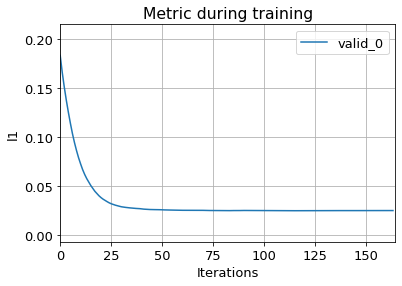

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0351833
Early stopping, best iteration is:
[43]	valid_0's l1: 0.0348414


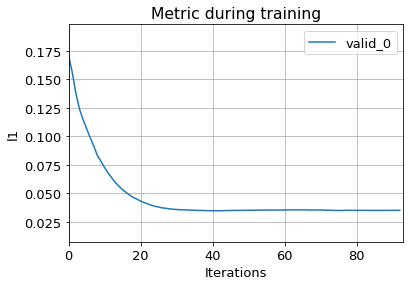

========== Starting level 5 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0229047
[100]	valid_0's l1: 0.0220456
[150]	valid_0's l1: 0.0215087
[200]	valid_0's l1: 0.0213613
[250]	valid_0's l1: 0.0211886
[300]	valid_0's l1

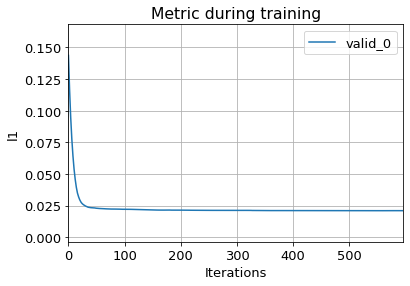

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.017806
[100]	valid_0's l1: 0.0171433
[150]	valid_0's l1: 0.0170256
[200]	valid_0's l1: 0.0169276
[250]	valid_0's l1: 0.016946
Early stopping, best iteration is:
[214]	valid_0's l

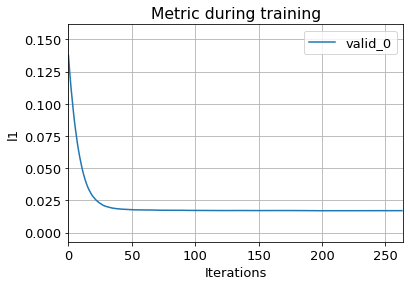

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0199878
[100]	valid_0's l1: 0.019438
[150]	valid_0's l1: 0.0192846
[200]	valid_0's l1: 0.0192083
[250]	valid_0's l1: 0.0191041
[300]	valid_0's l1: 0.0190445
[350]	valid_0's l1: 0

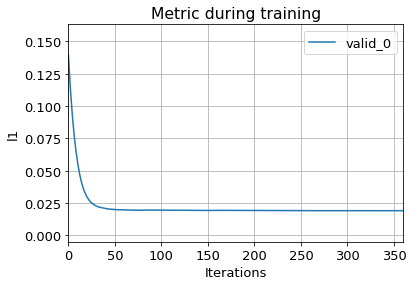

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0214681
[100]	valid_0's l1: 0.0206838
[150]	valid_0's l1: 0.0204889
Early stopping, best iteration is:
[143]	valid_0's l1: 0.0204472


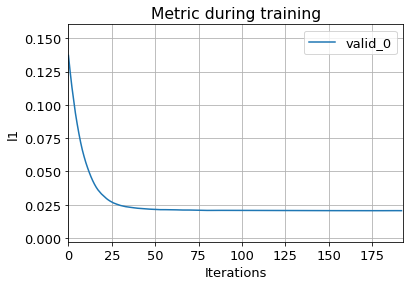

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.036788
[100]	valid_0's l1: 0.0358072
[150]	valid_0's l1: 0.0355785
[200]	valid_0's l1: 0.035644
Early stopping, best iteration is:
[182]	valid_0's l1: 0.0354747


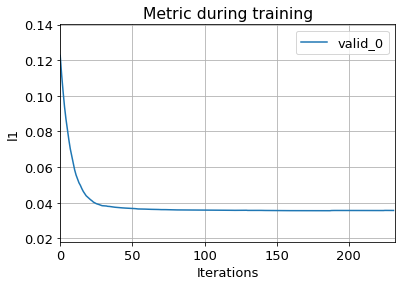

========== Starting level 6 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0227812
[100]	valid_0's l1: 0.0221315
[150]	valid_0's l1: 0.0218614
Early stopping, best iteration is:
[146]	valid_0's l1: 0.0218489


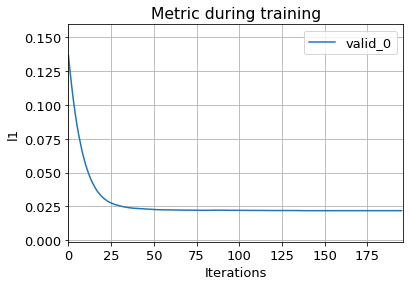

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0189769
[100]	valid_0's l1: 0.0183427
[150]	valid_0's l1: 0.0180874
[200]	valid_0's l1: 0.0179934
[250]	valid_0's l1: 0.0179428
[300]	valid_0's l1: 0.0179277
[350]	valid_0's l1:

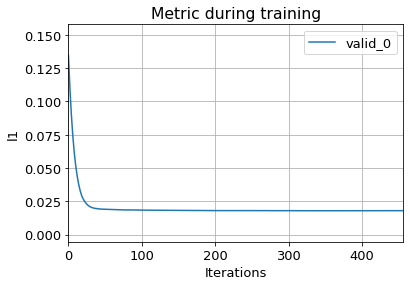

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0209228
[100]	valid_0's l1: 0.020064
[150]	valid_0's l1: 0.0199836
[200]	valid_0's l1: 0.0199451
[250]	valid_0's l1: 0.0199611
[300]	valid_0's l1: 0.0199049
Early stopping, best

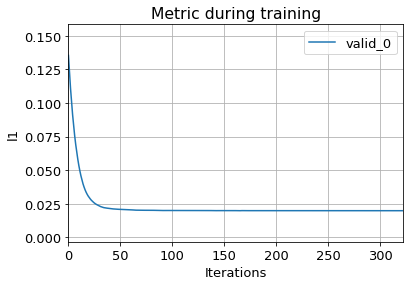

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0229365
[100]	valid_0's l1: 0.0218232
[150]	valid_0's l1: 0.0217291
[200]	valid_0's l1: 0.0216599
[250]	valid_0's l1: 0.02151
[300]	valid_0's l1: 0.0214354
Early stopping, best 

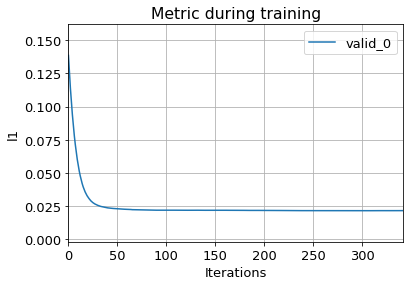

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0351504
[100]	valid_0's l1: 0.034747
Early stopping, best iteration is:
[99]	valid_0's l1: 0.0347318


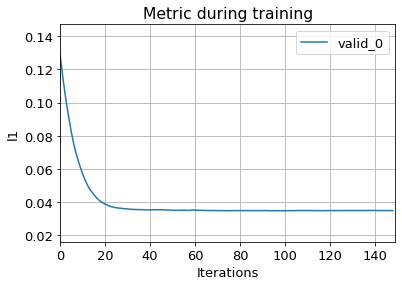

========== Starting level 7 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.017353
[100]	valid_0's l1: 0.0167277
[150]	valid_0's l1: 0.0166399
[200]	valid_0's l1: 0.0166474
[250]	valid_0's l1: 0.0165725
[300]	v

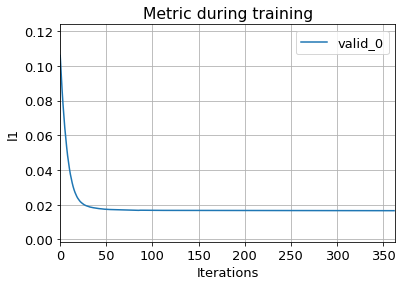

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0150911
[100]	valid_0's l1: 0.0144709
[150]	valid_0's l1: 0.0142435
[200]	valid_0's l1: 0.0141114
[250]	valid_0's l1: 0.0140694
[300]	valid_0's l1: 0.0140484
[350]	va

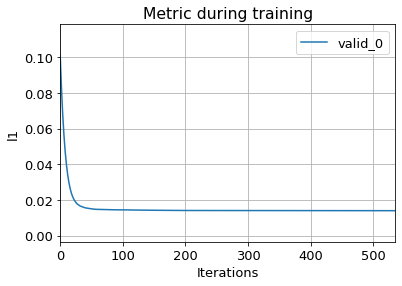

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0166204
[100]	valid_0's l1: 0.015618
[150]	valid_0's l1: 0.0155054
[200]	valid_0's l1: 0.0154034
[250]	valid_0's l1: 0.0153748
[300]	valid_0's l1: 0.0153472
[350]	val

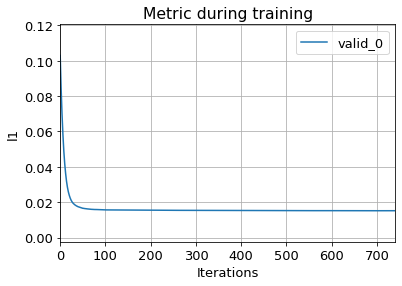

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0169622
[100]	valid_0's l1: 0.0160375
[150]	valid_0's l1: 0.0159612
[200]	valid_0's l1: 0.0159652
[250]	valid_0's l1: 0.0159344
[300]	valid_0's l1: 0.015868
[350]	val

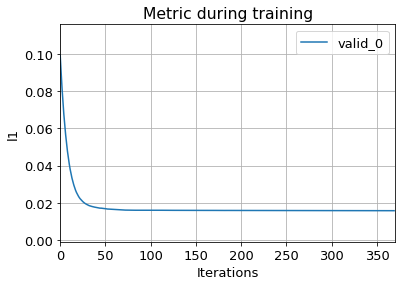

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0286323
[100]	valid_0's l1: 0.0276399
[150]	valid_0's l1: 0.0271489
[200]	valid_0's l1: 0.0269399
[250]	valid_0's l1: 0.0268318
[300]	valid_0's l1: 0.0267284
[350]	valid_0's

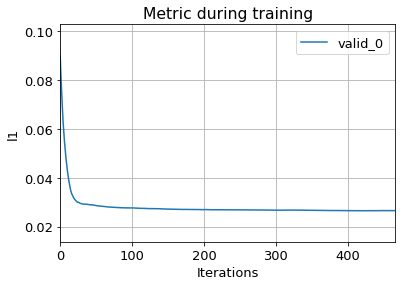

========== Starting level 8 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0210719
[100]	valid_0's l1: 0.0205082
[150]	valid_0's l1: 0.0203476
[200]	valid_0's l1: 0.0201879
[250]	valid_0's l1: 0.0200401
[300

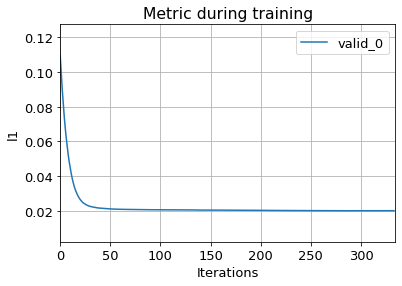

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0184284
[100]	valid_0's l1: 0.0177315
[150]	valid_0's l1: 0.0174984
[200]	valid_0's l1: 0.0172999
[250]	valid_0's l1: 0.0172339
[300]	valid_0's l1: 0.0171754
[350]	

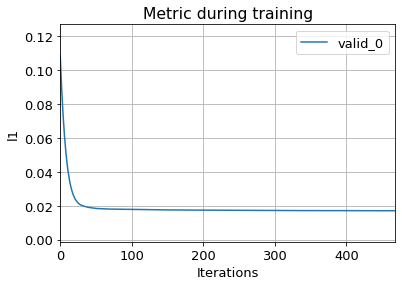

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0191219
[100]	valid_0's l1: 0.0185593
[150]	valid_0's l1: 0.0184411
[200]	valid_0's l1: 0.0183021
[250]	valid_0's l1: 0.0182629
[300]	valid_0's l1: 0.0182764
Early 

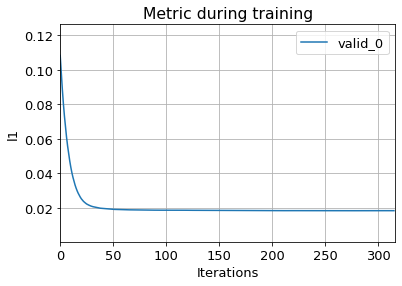

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.019576
[100]	valid_0's l1: 0.0187953
[150]	valid_0's l1: 0.0185919
[200]	valid_0's l1: 0.0184594
Early stopping, best iteration is:
[194]	valid_0's l1: 0.0184503


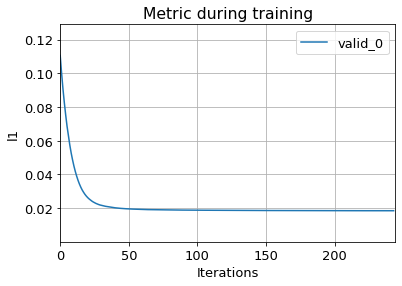

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0251899
[100]	valid_0's l1: 0.0247436
Early stopping, best iteration is:
[92]	valid_0's l1: 0.0245876


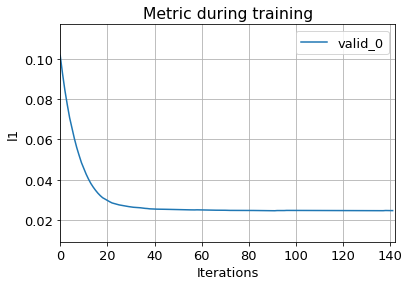

========== Starting level 9 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0145643
[100]	valid_0's l1: 0.0142248
[150]	valid_0's l1: 0.0140791
[200]	valid_0's l1: 0.0139442
[250]	valid_0's l1: 0.01

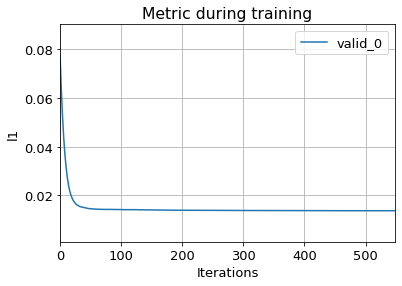

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0131537
[100]	valid_0's l1: 0.0126568
[150]	valid_0's l1: 0.0125151
[200]	valid_0's l1: 0.012344
[250]	valid_0's l1: 0.0122651
[300]	valid_0's l1: 0.01221

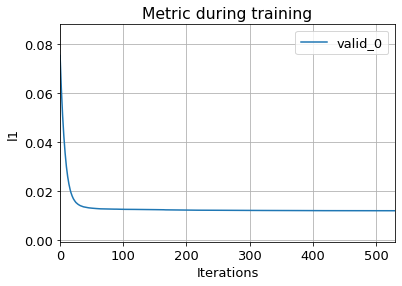

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0139084
[100]	valid_0's l1: 0.0133902
[150]	valid_0's l1: 0.0132942
Early stopping, best iteration is:
[141]	valid_0's l1: 0.0132299


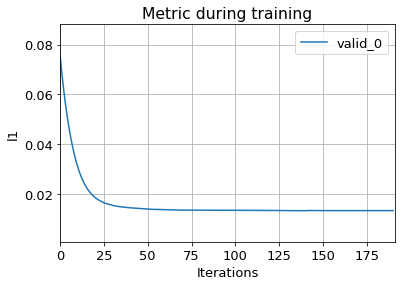

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0140365
[100]	valid_0's l1: 0.0135635
[150]	valid_0's l1: 0.0135229
[200]	valid_0's l1: 0.0133977
[250]	valid_0's l1: 0.0132805
[300]	valid_0's l1: 0.0132

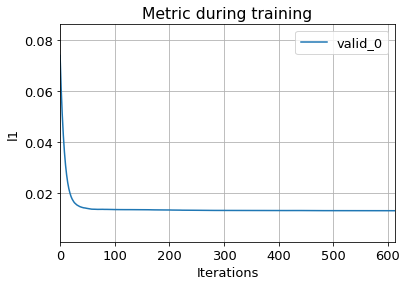

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0190339
[100]	valid_0's l1: 0.0183528
[150]	valid_0's l1: 0.018167
[200]	valid_0's l1: 0.0179709
[250]	valid_0's l1: 0.0178289
[300]	valid_0's l1: 0.0177864
[350

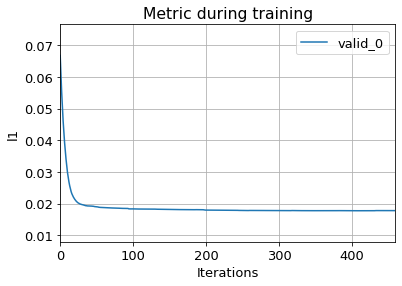

========== Starting level 10 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00213881
[100]	valid_0's l1: 0.00211018
[150]	valid_0's l1: 0.00210322
[200]	valid_0's l1: 0.0020973
[250]	valid_0's l1: 0.00209269
[3

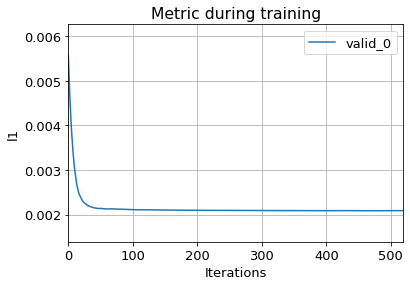

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00197172
[100]	valid_0's l1: 0.00194257
[150]	valid_0's l1: 0.0019349
[200]	valid_0's l1: 0.00192853
[250]	valid_0's l1: 0.00192708
[300]	valid_0's l1: 0.00192607
[350

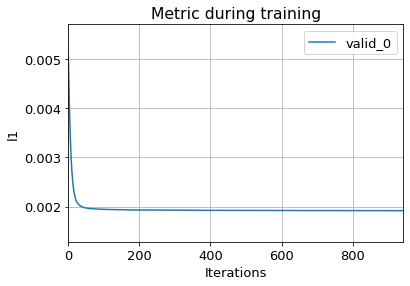

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00188221
[100]	valid_0's l1: 0.00184755
[150]	valid_0's l1: 0.00183866
[200]	valid_0's l1: 0.00183155
[250]	valid_0's l1: 0.00182853
[300]	valid_0's l1: 0.00182801
[35

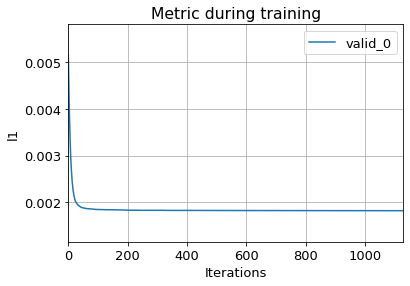

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00165344
[100]	valid_0's l1: 0.0015958
[150]	valid_0's l1: 0.00157803
[200]	valid_0's l1: 0.0015721
[250]	valid_0's l1: 0.00156903
[300]	valid_0's l1: 0.0015683
[350]	

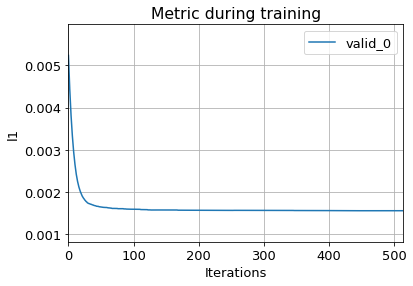

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00162772
Early stopping, best iteration is:
[47]	valid_0's l1: 0.00161399


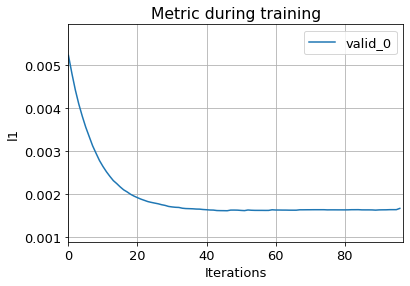

========== Starting level 11 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00103408
[100]	valid_0's l1: 0.00101774
[150]	valid_0's l1: 0.00101106
[200]	valid_0's l1: 0.00101019
[250]	valid_0's l1: 

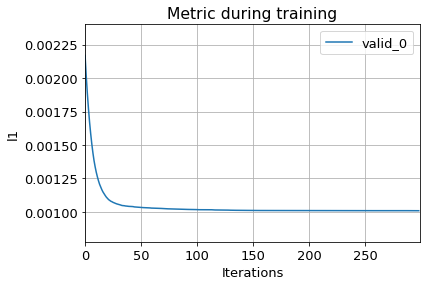

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000915572
[100]	valid_0's l1: 0.000898685
[150]	valid_0's l1: 0.000895118
[200]	valid_0's l1: 0.000892935
[250]	valid_0's l1: 0.000892568
[300]	valid_0's l

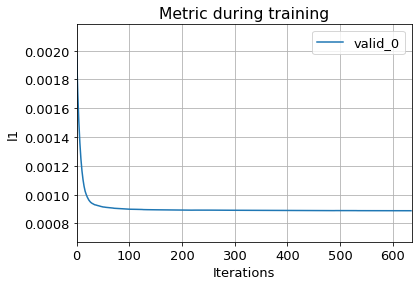

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000874136
[100]	valid_0's l1: 0.000856576
[150]	valid_0's l1: 0.000851015
[200]	valid_0's l1: 0.000848894
[250]	valid_0's l1: 0.000847097
[300]	valid_0's l

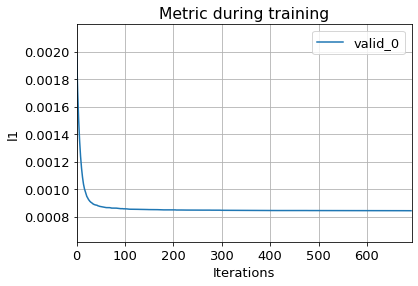

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000778367
[100]	valid_0's l1: 0.000749447
[150]	valid_0's l1: 0.000745448
[200]	valid_0's l1: 0.00074182
[250]	valid_0's l1: 0.000737892
Early stopping, be

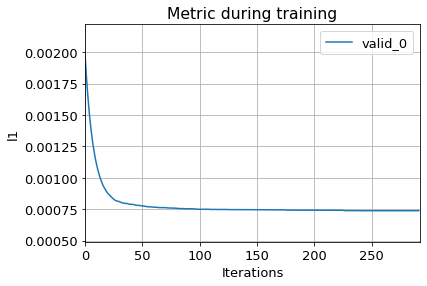

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000721768
[100]	valid_0's l1: 0.000744074
Early stopping, best iteration is:
[57]	valid_0's l1: 0.000713718


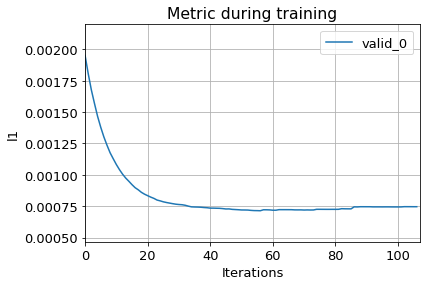

========== Starting level 12 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-11-07 19:11:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0006929

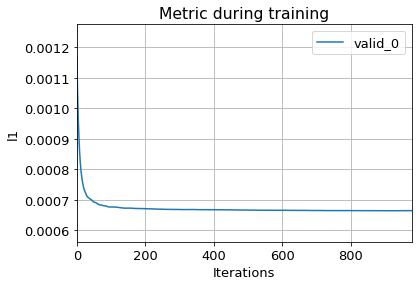

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-06-20 14:23:59.600000 and 2015-11-07 19:11:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000618851
[100]	valid_0's l1: 0.00060252

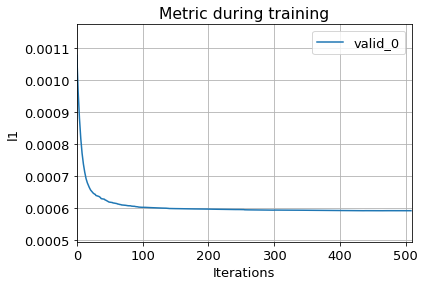

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-01-31 09:35:59.400000 and 2015-06-20 14:23:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000655971
Early stopping, best iteration

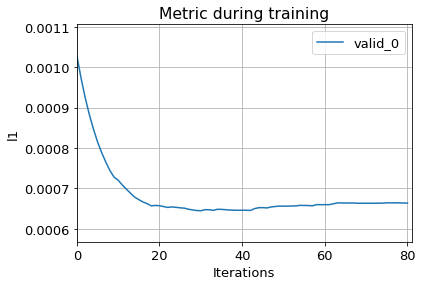

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-09-13 04:47:59.200000 and 2015-01-31 09:35:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000564961
[100]	valid_0's l1: 0.00055109

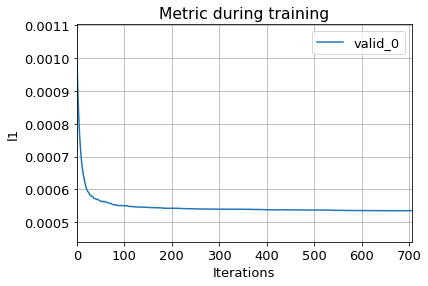

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t21', 'shift_t22', 'shift_t23', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-04-25 23:59:59 and 2014-09-13 04:47:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000577794
[100]	valid_0's l1: 0.000561883
[150]

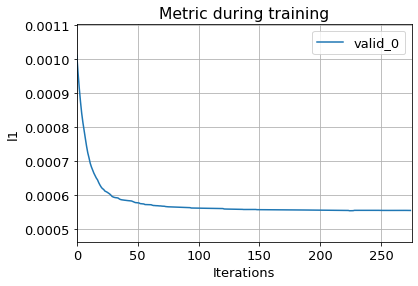

>>>>>>>>>>>>>>>> LAG IS 14 <<<<<<<<<<<<<<<
========== Starting level 1 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.045672
[100]	valid_0's l1: 0.0464622
Early stopping, best iteration is:
[50]	valid_0's l1: 0.045672


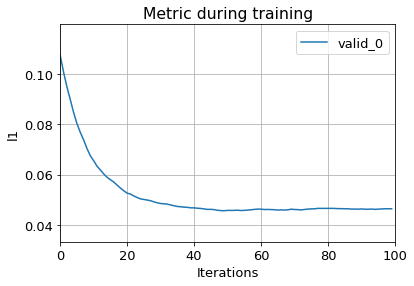

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0301954
[100]	valid_0's l1: 0.029498
[150]	valid_0's l1: 0.0294828
[200]	valid_0's l1: 0.0295113
Early stopping, best iteration is:
[168]	valid_0's l1: 0.0293682


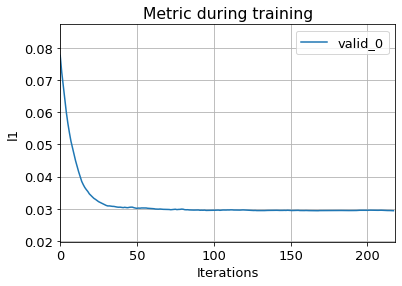

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0325142
[100]	valid_0's l1: 0.0326252
Early stopping, best iteration is:
[60]	valid_0's l1: 0.0318974


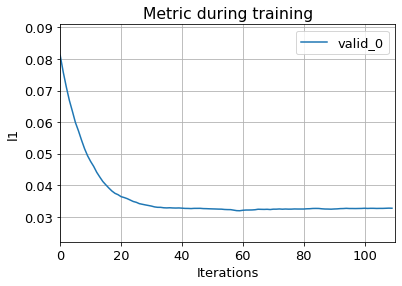

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0369462
[100]	valid_0's l1: 0.0366332
Early stopping, best iteration is:
[86]	valid_0's l1: 0.0361372


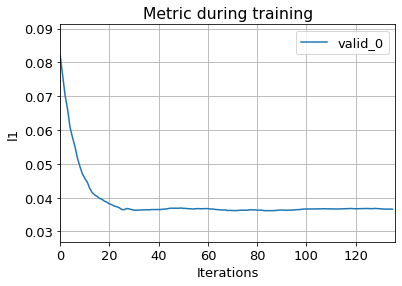

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0960825
[100]	valid_0's l1: 0.0927658
[150]	valid_0's l1: 0.0931757
Early stopping, best iteration is:
[112]	valid_0's l1: 0.0919722


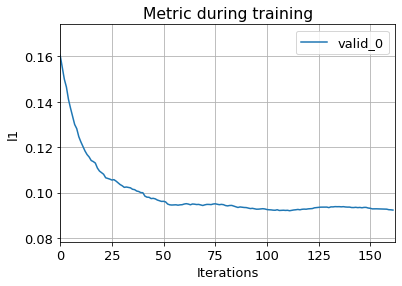

========== Starting level 2 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0339981
[100]	valid_0's l1: 0.0326665
[150]	valid_0's l1: 0.0325202
Early stopping, best iteration is:
[120]	valid_0's l1: 0.0321841


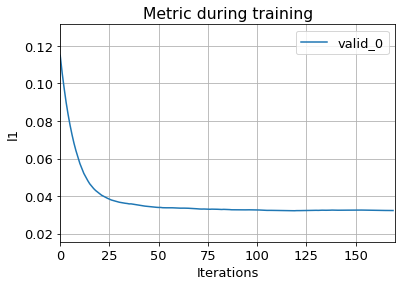

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0262265
[100]	valid_0's l1: 0.0250147
[150]	valid_0's l1: 0.0247376
[200]	valid_0's l1: 0.0245423
[250]	valid_0's l1: 0.024499
[300]	valid_0's l1: 0.024516
Early stopping, best iteration 

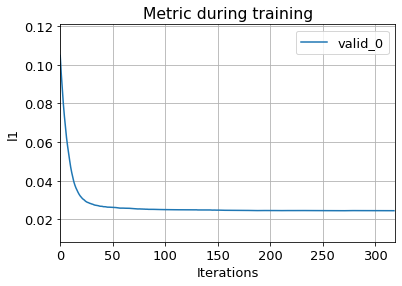

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0273472
[100]	valid_0's l1: 0.02592
[150]	valid_0's l1: 0.0256485
Early stopping, best iteration is:
[143]	valid_0's l1: 0.0255749


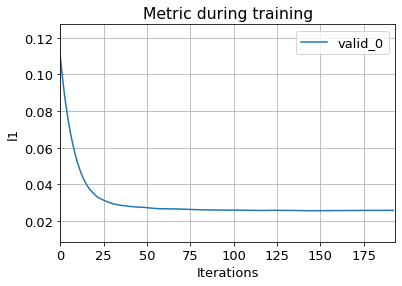

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0298727
[100]	valid_0's l1: 0.0291038
[150]	valid_0's l1: 0.0291121
Early stopping, best iteration is:
[130]	valid_0's l1: 0.0289866


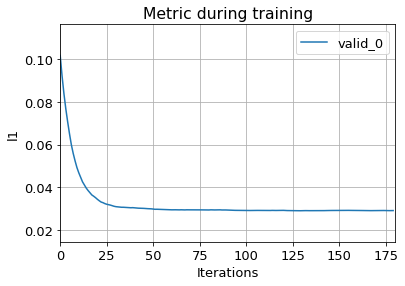

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0398562
[100]	valid_0's l1: 0.0400631
Early stopping, best iteration is:
[77]	valid_0's l1: 0.0392745


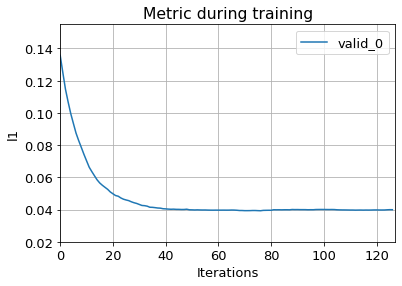

========== Starting level 3 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0285382
[100]	valid_0's l1: 0.0272856
[150]	valid_0's l1: 0.0269512
[200]	valid_0's l1: 0.0268846
[250]	valid_0's l1: 0.0268882
[300]	valid_0's

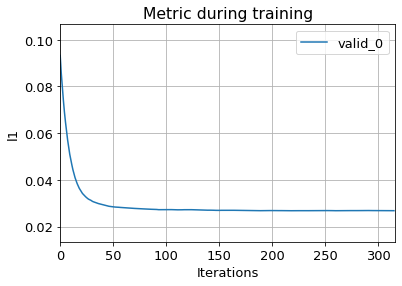

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0243629
[100]	valid_0's l1: 0.0231912
[150]	valid_0's l1: 0.0228848
[200]	valid_0's l1: 0.0226677
[250]	valid_0's l1: 0.0225468
[300]	valid_0's l1: 0.022573
Early stopping, be

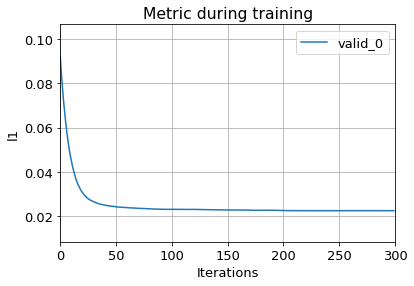

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0253299
[100]	valid_0's l1: 0.0242612
[150]	valid_0's l1: 0.0241047
[200]	valid_0's l1: 0.0240453
[250]	valid_0's l1: 0.0239698
Early stopping, best iteration is:
[229]	valid_

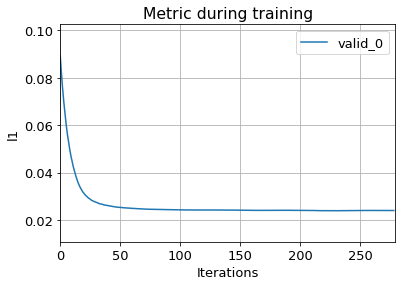

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0283103
[100]	valid_0's l1: 0.0266261
[150]	valid_0's l1: 0.026384
[200]	valid_0's l1: 0.0261995
[250]	valid_0's l1: 0.0259954
[300]	valid_0's l1: 0.0258829
[350]	valid_0's l1

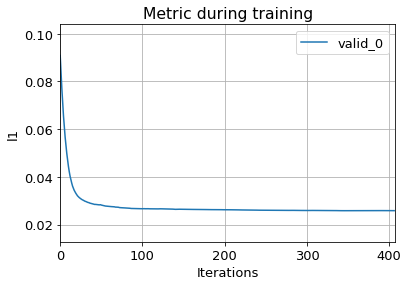

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0309785
[100]	valid_0's l1: 0.0302039
[150]	valid_0's l1: 0.0299118
Early stopping, best iteration is:
[149]	valid_0's l1: 0.0298313


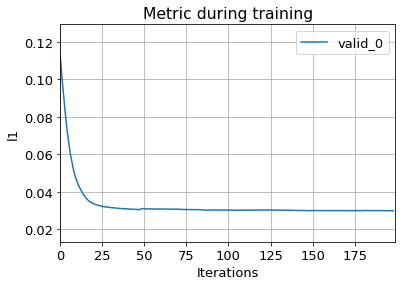

========== Starting level 4 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.029247
[100]	valid_0's l1: 0.0281992
[150]	valid_0's l1: 0.0277623
[200]	valid_0's l1: 0.0276766
Early stopping, best iteration is:
[164]	valid_0's l1: 0.027

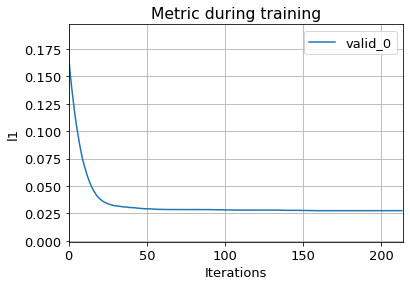

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.020693
[100]	valid_0's l1: 0.0200845
[150]	valid_0's l1: 0.020081
[200]	valid_0's l1: 0.0200566
Early stopping, best iteration is:
[165]	valid_0's l1: 0.0199988


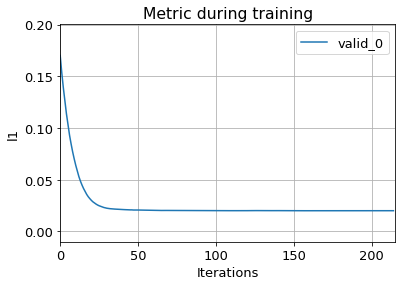

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0223971
[100]	valid_0's l1: 0.0219092
[150]	valid_0's l1: 0.0219049
Early stopping, best iteration is:
[110]	valid_0's l1: 0.0216999


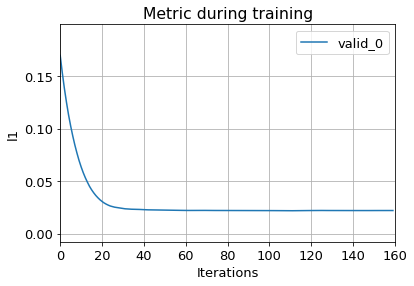

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0241249
[100]	valid_0's l1: 0.0231661
[150]	valid_0's l1: 0.022993
[200]	valid_0's l1: 0.0228713
[250]	valid_0's l1: 0.0228301
Early stopping, best iteration is:
[237]	valid_0's l1: 0.02275

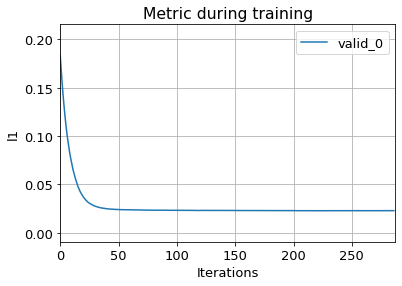

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0295698
Early stopping, best iteration is:
[34]	valid_0's l1: 0.0294635


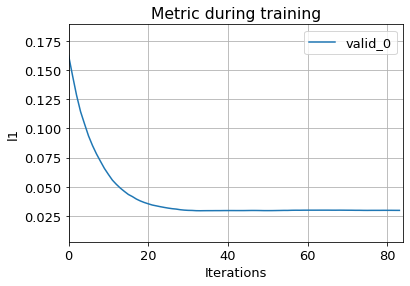

========== Starting level 5 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0229975
[100]	valid_0's l1: 0.0223206
[150]	valid_0's l1: 0.0217569
[200]	valid_0's l1: 0.0215662
[250]	valid_0's l1: 0.0214785
[300]	valid_0's l1

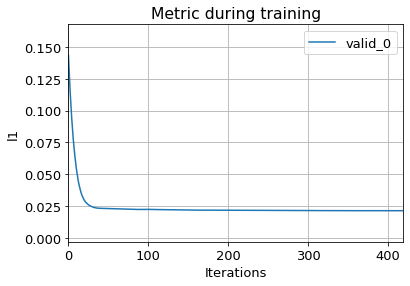

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0166155
[100]	valid_0's l1: 0.0162622
Early stopping, best iteration is:
[84]	valid_0's l1: 0.0161721


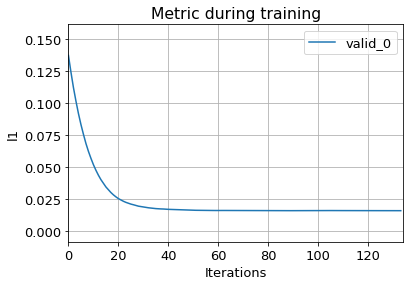

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0194083
[100]	valid_0's l1: 0.0182652
[150]	valid_0's l1: 0.0181102
[200]	valid_0's l1: 0.0178886
[250]	valid_0's l1: 0.0178915
Early stopping, best iteration is:
[211]	valid_0's

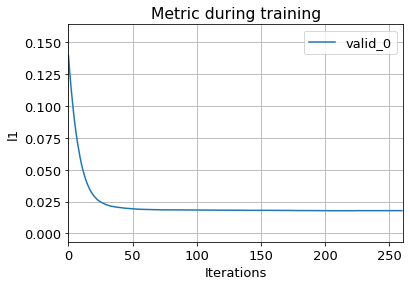

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.020569
[100]	valid_0's l1: 0.0195976
[150]	valid_0's l1: 0.0194997
[200]	valid_0's l1: 0.019464
Early stopping, best iteration is:
[169]	valid_0's l1: 0.0194356


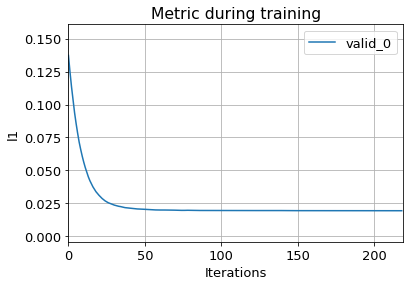

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0368771
[100]	valid_0's l1: 0.0359361
[150]	valid_0's l1: 0.0357261
[200]	valid_0's l1: 0.0355307
[250]	valid_0's l1: 0.035413
[300]	valid_0's l1: 0.0354589
[350]	valid_0's l1: 0.035283

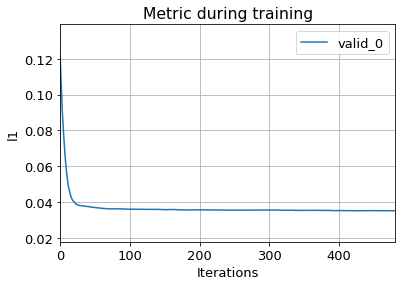

========== Starting level 6 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.023053
[100]	valid_0's l1: 0.0222657
[150]	valid_0's l1: 0.0219763
[200]	valid_0's l1: 0.0218361
[250]	valid_0's l1: 0.0218204
[300]	valid_0's l1

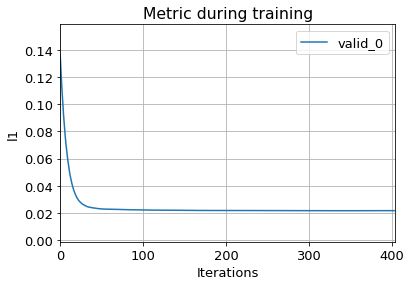

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0184187
[100]	valid_0's l1: 0.0176784
[150]	valid_0's l1: 0.0175588
Early stopping, best iteration is:
[132]	valid_0's l1: 0.0175129


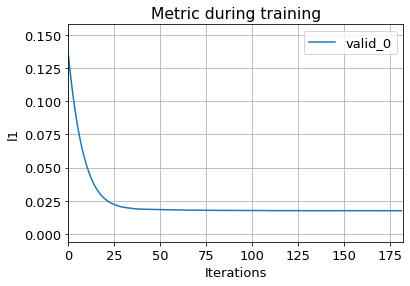

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0205284
[100]	valid_0's l1: 0.019774
[150]	valid_0's l1: 0.0197539
Early stopping, best iteration is:
[113]	valid_0's l1: 0.0197401


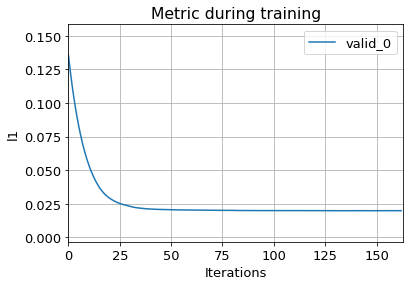

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0222424
[100]	valid_0's l1: 0.0213522
[150]	valid_0's l1: 0.0211063
[200]	valid_0's l1: 0.0210598
[250]	valid_0's l1: 0.0208929
[300]	valid_0's l1: 0.0208856
Early stopping, bes

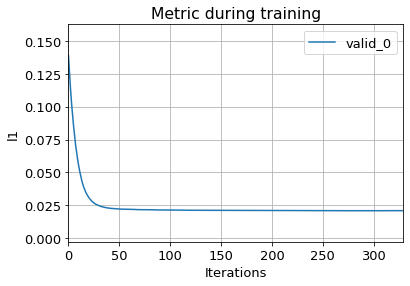

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0309555
[100]	valid_0's l1: 0.0309407
[150]	valid_0's l1: 0.0308642
Early stopping, best iteration is:
[142]	valid_0's l1: 0.0307516


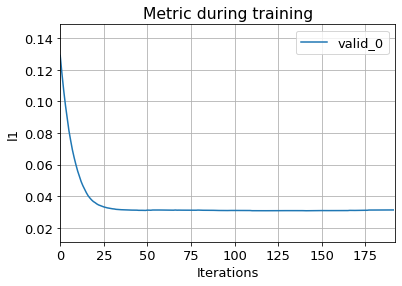

========== Starting level 7 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0168351
[100]	valid_0's l1: 0.0162662
[150]	valid_0's l1: 0.016254
[200]	valid_0's l1: 0.0162081
[250]	valid_0's l1: 0.0161074
[300]	v

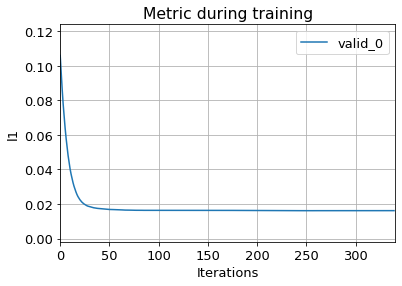

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0145977
[100]	valid_0's l1: 0.0137846
[150]	valid_0's l1: 0.0136136
[200]	valid_0's l1: 0.0134497
[250]	valid_0's l1: 0.0134059
[300]	valid_0's l1: 0.0133989
[350]	va

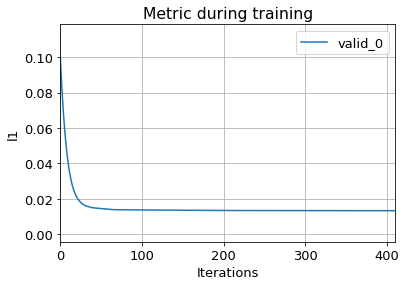

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0161696
[100]	valid_0's l1: 0.0153563
[150]	valid_0's l1: 0.0153306
[200]	valid_0's l1: 0.0151818
[250]	valid_0's l1: 0.0150547
[300]	valid_0's l1: 0.0150366
Early st

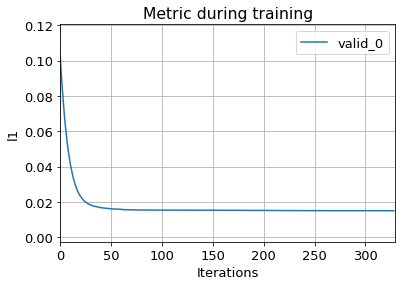

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.016224
[100]	valid_0's l1: 0.0154597
[150]	valid_0's l1: 0.0154709
Early stopping, best iteration is:
[108]	valid_0's l1: 0.0154337


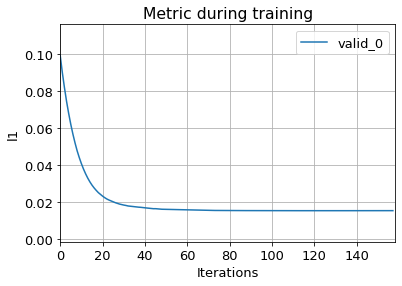

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0263191
[100]	valid_0's l1: 0.0254175
[150]	valid_0's l1: 0.0251058
[200]	valid_0's l1: 0.0248782
[250]	valid_0's l1: 0.0247817
[300]	valid_0's l1: 0.0246568
[350]	valid_0's

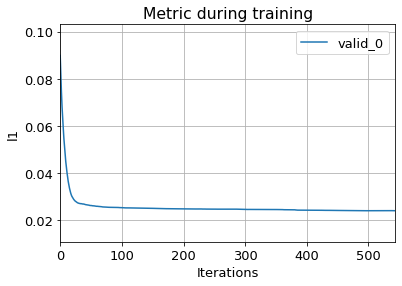

========== Starting level 8 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0205269
[100]	valid_0's l1: 0.0199301
[150]	valid_0's l1: 0.0197886
[200]	valid_0's l1: 0.0196395
[250]	valid_0's l1: 0.0195576
[300

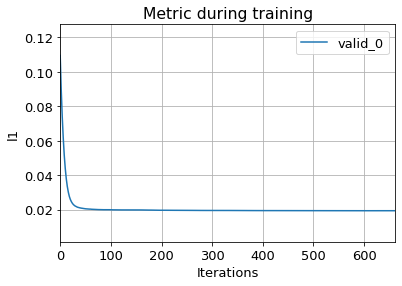

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0176773
[100]	valid_0's l1: 0.0170064
[150]	valid_0's l1: 0.0168217
[200]	valid_0's l1: 0.0166872
[250]	valid_0's l1: 0.0166526
[300]	valid_0's l1: 0.0165649
[350]	

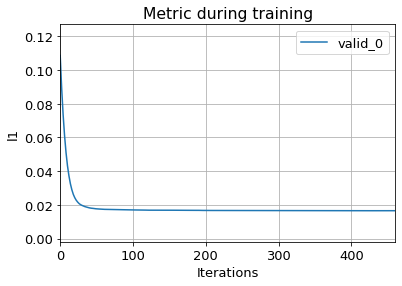

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0186503
[100]	valid_0's l1: 0.0181476
[150]	valid_0's l1: 0.0180619
[200]	valid_0's l1: 0.0180864
Early stopping, best iteration is:
[179]	valid_0's l1: 0.0179763


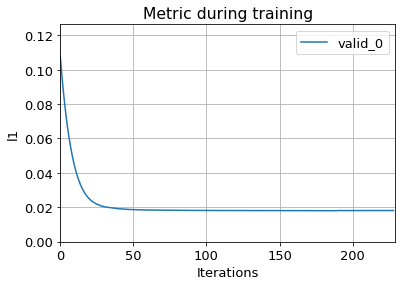

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0187814
[100]	valid_0's l1: 0.0180592
[150]	valid_0's l1: 0.0179037
[200]	valid_0's l1: 0.0178077
Early stopping, best iteration is:
[190]	valid_0's l1: 0.0177974


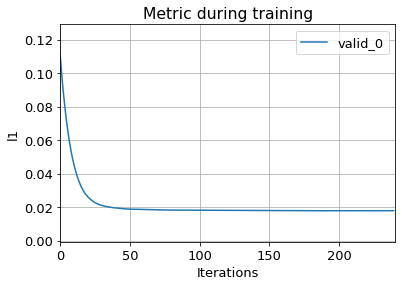

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0225847
[100]	valid_0's l1: 0.0221613
[150]	valid_0's l1: 0.0218076
[200]	valid_0's l1: 0.02176
[250]	valid_0's l1: 0.0217817
Early stopping, best iteration is:
[237]	vali

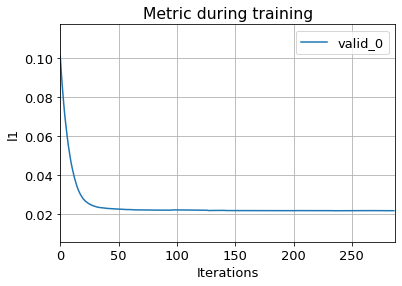

========== Starting level 9 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0141832
[100]	valid_0's l1: 0.0137911
[150]	valid_0's l1: 0.0136972
[200]	valid_0's l1: 0.0135815
[250]	valid_0's l1: 0.01

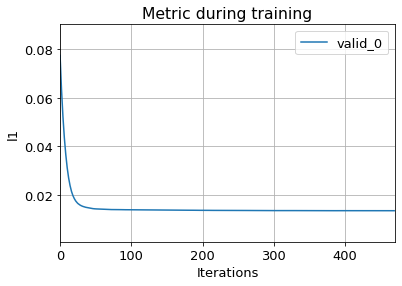

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0127357
[100]	valid_0's l1: 0.0122504
[150]	valid_0's l1: 0.0121101
[200]	valid_0's l1: 0.0120178
[250]	valid_0's l1: 0.0119699
[300]	valid_0's l1: 0.0119

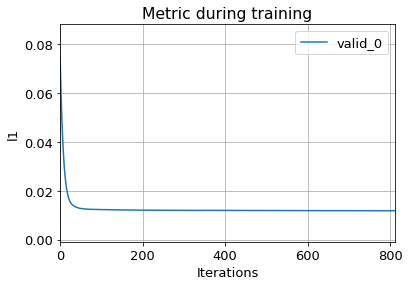

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0135467
[100]	valid_0's l1: 0.0130439
[150]	valid_0's l1: 0.0129861
[200]	valid_0's l1: 0.0129439
[250]	valid_0's l1: 0.0129205
Early stopping, best itera

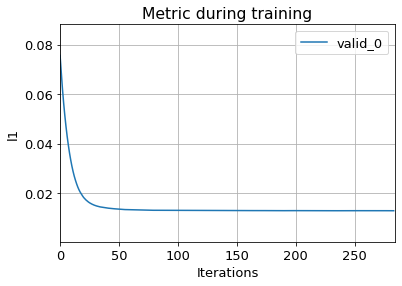

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.013389
[100]	valid_0's l1: 0.0130125
Early stopping, best iteration is:
[91]	valid_0's l1: 0.0129329


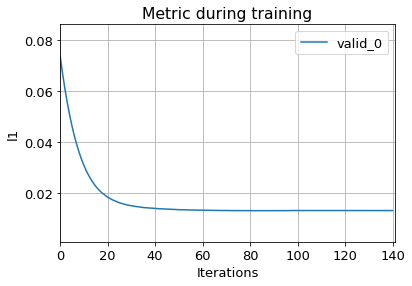

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0182327
[100]	valid_0's l1: 0.0176487
[150]	valid_0's l1: 0.0175269
[200]	valid_0's l1: 0.0173549
[250]	valid_0's l1: 0.016976
[300]	valid_0's l1: 0.0169684
Earl

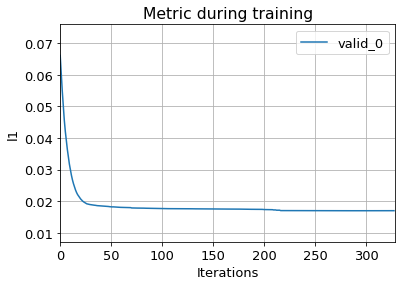

========== Starting level 10 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00201242
[100]	valid_0's l1: 0.00198226
[150]	valid_0's l1: 0.00197295
[200]	valid_0's l1: 0.00196723
[250]	valid_0's l1: 0.00196459
[

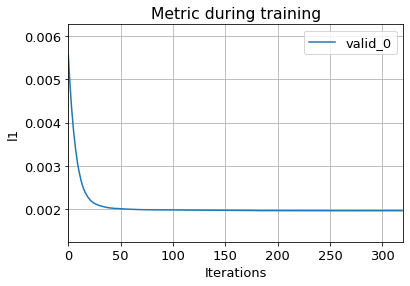

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00186285
[100]	valid_0's l1: 0.00182991
[150]	valid_0's l1: 0.00182343
[200]	valid_0's l1: 0.00181989
[250]	valid_0's l1: 0.001816
[300]	valid_0's l1: 0.00181545
[350]

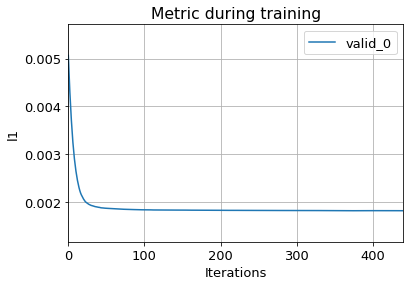

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00178021
[100]	valid_0's l1: 0.00174273
[150]	valid_0's l1: 0.00173595
[200]	valid_0's l1: 0.00173456
[250]	valid_0's l1: 0.00173294
Early stopping, best iteration is:

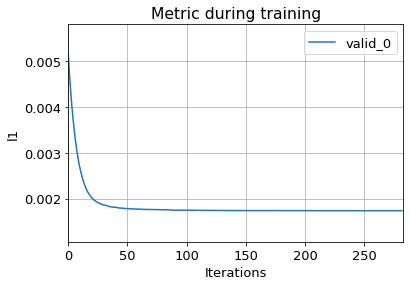

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00154333
[100]	valid_0's l1: 0.00148411
[150]	valid_0's l1: 0.00147651
[200]	valid_0's l1: 0.00147244
[250]	valid_0's l1: 0.0014688
Early stopping, best iteration is:


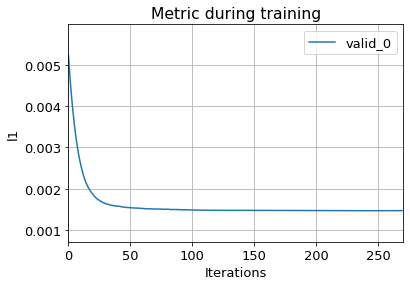

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00146529
Early stopping, best iteration is:
[49]	valid_0's l1: 0.00145722


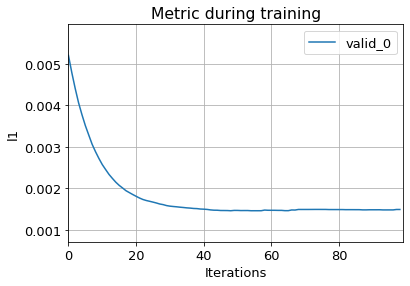

========== Starting level 11 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2015-03-16 04:47:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000986002
[100]	valid_0's l1: 0.000971644
[150]	valid_0's l1: 0.000967816
[200]	valid_0's l1: 0.000965624
[250]	valid_0's 

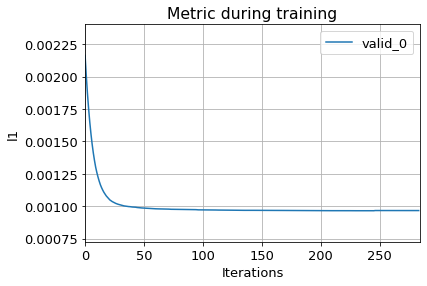

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000877465
[100]	valid_0's l1: 0.000864602
[150]	valid_0's l1: 0.000861401
[200]	valid_0's l1: 0.000860189
[250]	valid_0's l1: 0.000859376
[300]	valid_0's l

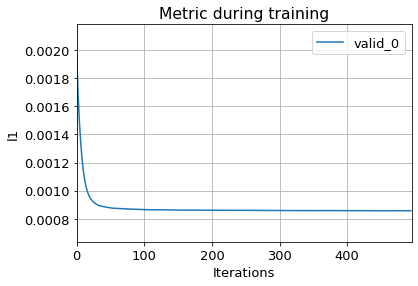

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000833696
[100]	valid_0's l1: 0.00081379
[150]	valid_0's l1: 0.000810482
[200]	valid_0's l1: 0.000808296
[250]	valid_0's l1: 0.000806932
[300]	valid_0's l1

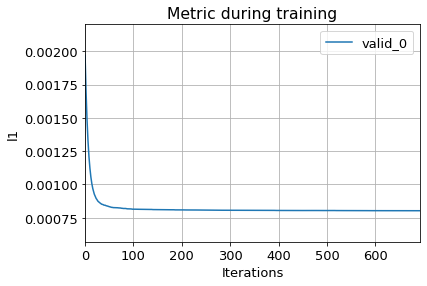

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000739098
[100]	valid_0's l1: 0.000711117
[150]	valid_0's l1: 0.000708612
[200]	valid_0's l1: 0.000706324
[250]	valid_0's l1: 0.000705479
[300]	valid_0's l

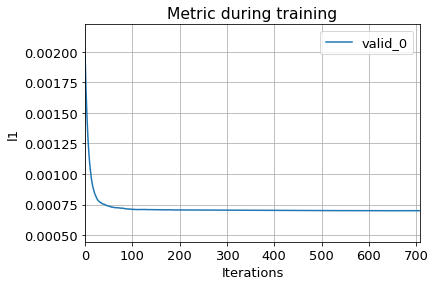

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000670707
[100]	valid_0's l1: 0.000675084
Early stopping, best iteration is:
[62]	valid_0's l1: 0.00066192


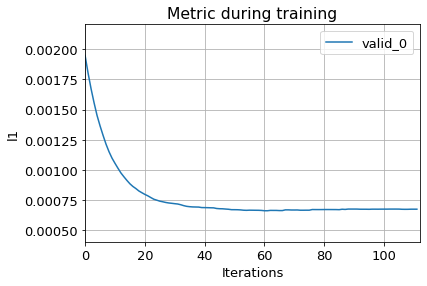

========== Starting level 12 ==========
== Starting fold 1 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-11-07 19:11:59.800000 and 2016-03-27 00:00:00
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0006795

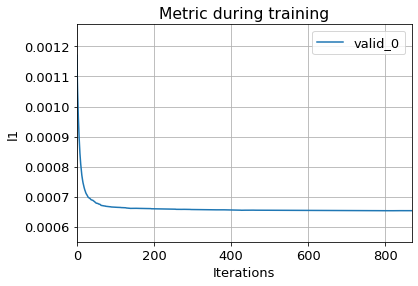

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-06-20 14:23:59.600000 and 2015-11-07 19:11:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000601874
[100]	valid_0's l1: 0.00058772

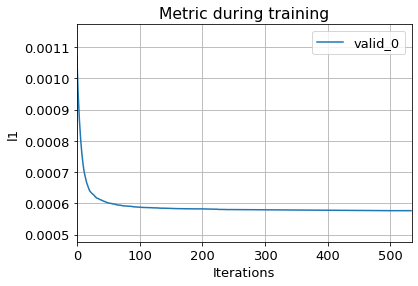

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-01-31 09:35:59.400000 and 2015-06-20 14:23:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00062785
Early stopping, best iteration 

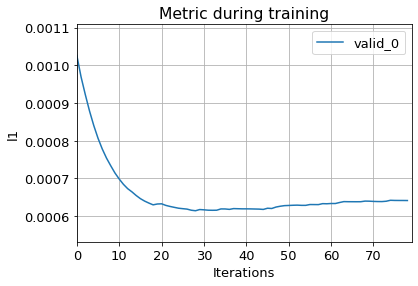

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-09-13 04:47:59.200000 and 2015-01-31 09:35:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000546888
[100]	valid_0's l1: 0.00053347

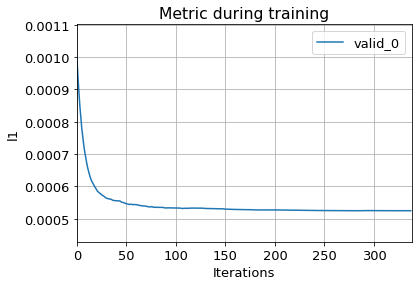

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t14', 'shift_t15', 'shift_t16', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-04-25 23:59:59 and 2014-09-13 04:47:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000557901
[100]	valid_0's l1: 0.00054709
[150]	

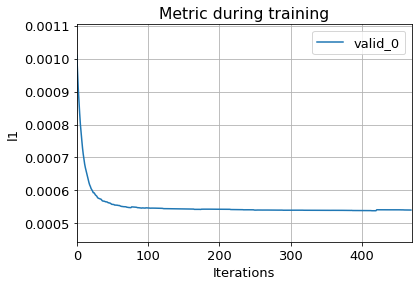

>>>>>>>>>>>>>>>> LAG IS 7 <<<<<<<<<<<<<<<
========== Starting level 1 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.00 Mb (74.6% reduction)
1 7
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.00 Mb (0.0% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 1913 rows and 3 columns
Selecting 2190 rows (114.5%)
Mem. usage decreased to  0.15 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_s

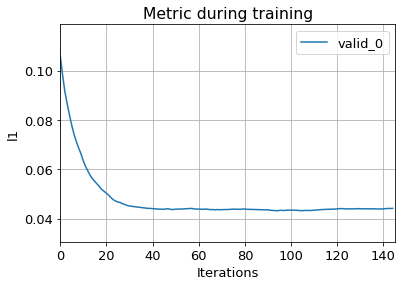

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0307054
[100]	valid_0's l1: 0.0297337
[150]	valid_0's l1: 0.0293505
[200]	valid_0's l1: 0.0293732
Early stopping, best iteration is:
[161]	valid_0's l1: 0.0292762


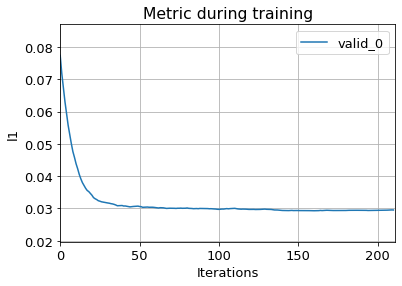

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0329066
Early stopping, best iteration is:
[42]	valid_0's l1: 0.0327115


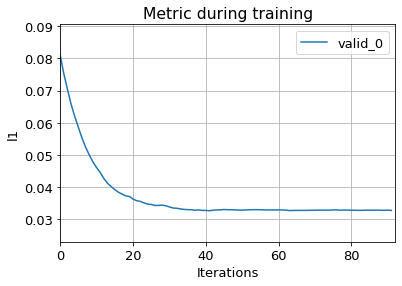

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.033687
[100]	valid_0's l1: 0.0334795
Early stopping, best iteration is:
[67]	valid_0's l1: 0.0332542


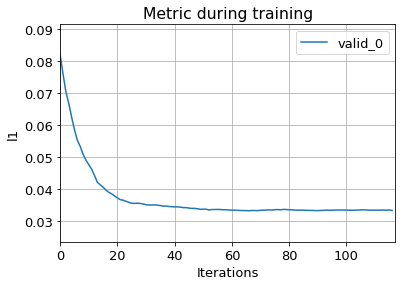

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.091391
[100]	valid_0's l1: 0.0984183
Early stopping, best iteration is:
[50]	valid_0's l1: 0.091391


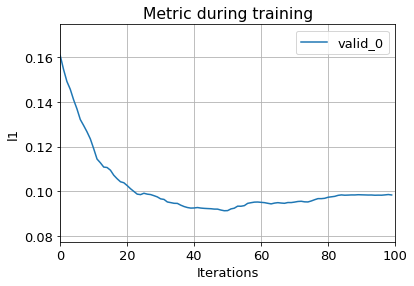

========== Starting level 2 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.01 Mb (74.8% reduction)
3 7
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.01 Mb (0.2% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 5739 rows and 4 columns
Selecting 6570 rows (114.5%)
Mem. usage decreased to  0.46 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean

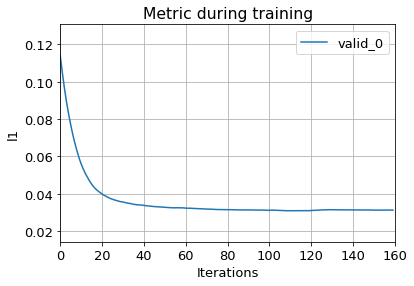

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0268931
[100]	valid_0's l1: 0.0255547
[150]	valid_0's l1: 0.0252401
[200]	valid_0's l1: 0.0247303
[250]	valid_0's l1: 0.0246259
Early stopping, best iteration is:
[248]	valid_0's l1: 0.02461

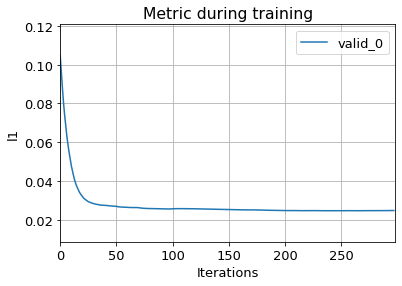

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0272102
[100]	valid_0's l1: 0.0257593
[150]	valid_0's l1: 0.0255773
[200]	valid_0's l1: 0.0254102
[250]	valid_0's l1: 0.0253078
Early stopping, best iteration is:
[244]	valid_0's l1: 0.02526

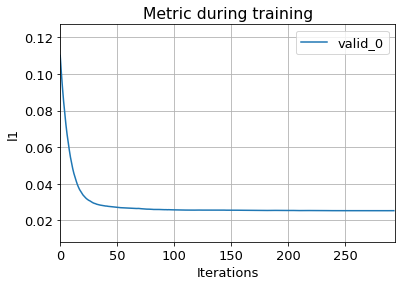

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.027872
[100]	valid_0's l1: 0.0270504
[150]	valid_0's l1: 0.026858
[200]	valid_0's l1: 0.026764
Early stopping, best iteration is:
[190]	valid_0's l1: 0.0267126


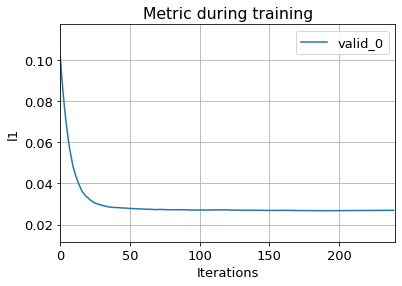

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0395986
Early stopping, best iteration is:
[47]	valid_0's l1: 0.0387317


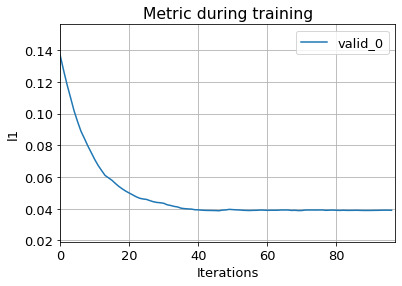

========== Starting level 3 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.04 Mb (74.8% reduction)
10 7
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.04 Mb (0.4% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 19130 rows and 5 columns
Selecting 21900 rows (114.5%)
Mem. usage decreased to  1.55 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_m

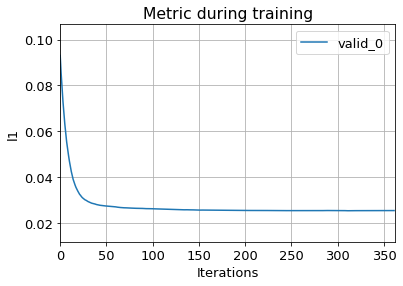

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0242358
[100]	valid_0's l1: 0.0232336
[150]	valid_0's l1: 0.0227126
[200]	valid_0's l1: 0.0224103
[250]	valid_0's l1: 0.0223298
[300]	valid_0's l1: 0.0223864
Early stopping, best

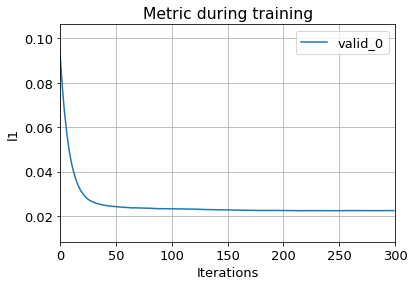

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0248064
[100]	valid_0's l1: 0.0238247
[150]	valid_0's l1: 0.0236893
[200]	valid_0's l1: 0.0236765
[250]	valid_0's l1: 0.0234949
[300]	valid_0's l1: 0.0234608
[350]	valid_0's l1: 

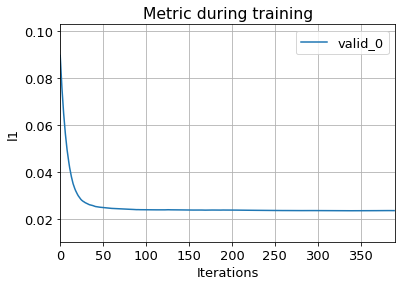

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0258562
[100]	valid_0's l1: 0.0249212
[150]	valid_0's l1: 0.0244189
[200]	valid_0's l1: 0.0241782
[250]	valid_0's l1: 0.0240523
Early stopping, best iteration is:
[246]	valid_0's

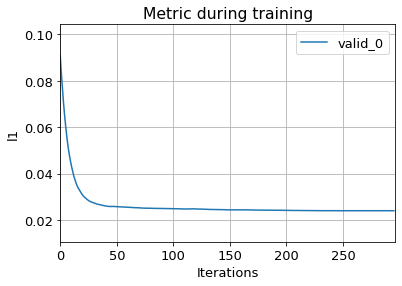

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0281182
[100]	valid_0's l1: 0.0278786
[150]	valid_0's l1: 0.0276081
[200]	valid_0's l1: 0.0276908
Early stopping, best iteration is:
[190]	valid_0's l1: 0.0274147


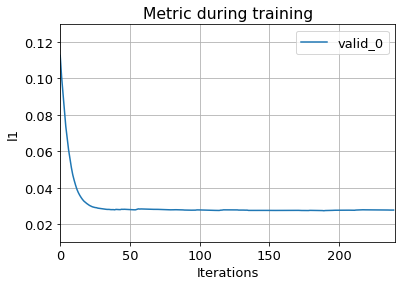

========== Starting level 4 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.01 Mb (74.8% reduction)
3 7
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.01 Mb (0.2% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 5739 rows and 4 columns
Selecting 6570 rows (114.5%)
Mem. usage decreased to  0.46 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean

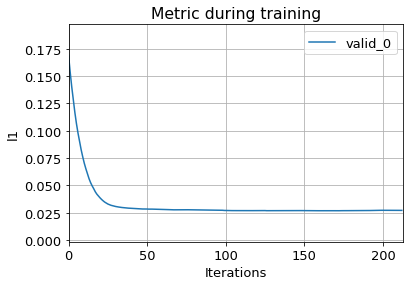

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0202642
[100]	valid_0's l1: 0.0201487
[150]	valid_0's l1: 0.0200133
[200]	valid_0's l1: 0.0199331
[250]	valid_0's l1: 0.0199054
Early stopping, best iteration is:
[214]	valid_0's l1: 0.019874


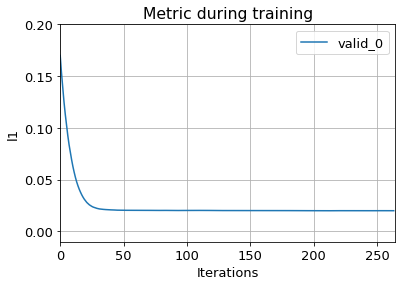

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0217189
[100]	valid_0's l1: 0.0212835
[150]	valid_0's l1: 0.0213844
Early stopping, best iteration is:
[103]	valid_0's l1: 0.0212716


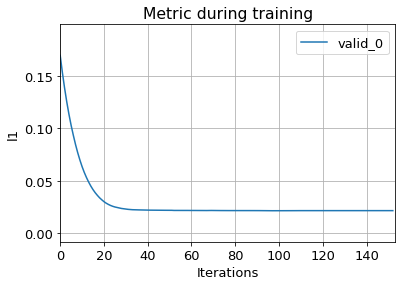

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0223453
[100]	valid_0's l1: 0.0215135
[150]	valid_0's l1: 0.0211595
[200]	valid_0's l1: 0.0210156
[250]	valid_0's l1: 0.0209528
Early stopping, best iteration is:
[221]	valid_0's l1: 0.0209198

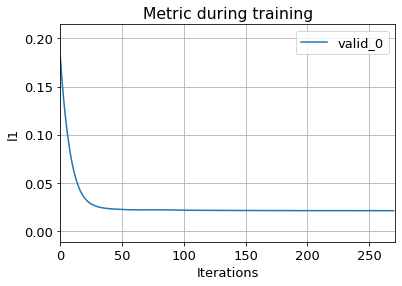

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0267378
Early stopping, best iteration is:
[41]	valid_0's l1: 0.0266037


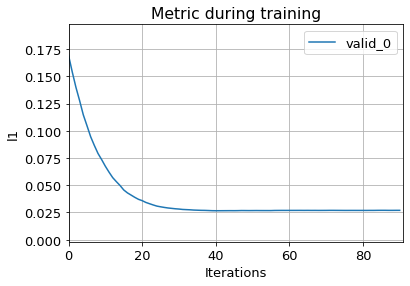

========== Starting level 5 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.03 Mb (74.8% reduction)
7 7
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.03 Mb (0.4% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 13391 rows and 5 columns
Selecting 15330 rows (114.5%)
Mem. usage decreased to  1.09 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_me

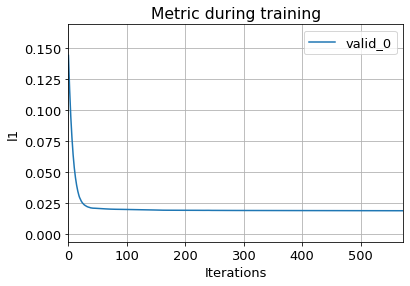

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0163078
[100]	valid_0's l1: 0.0160112
[150]	valid_0's l1: 0.0159394
Early stopping, best iteration is:
[121]	valid_0's l1: 0.0158831


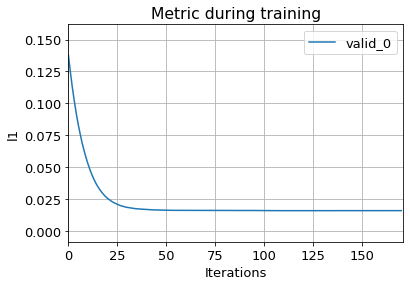

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0176674
[100]	valid_0's l1: 0.0168669
[150]	valid_0's l1: 0.0166177
[200]	valid_0's l1: 0.0165201
[250]	valid_0's l1: 0.0163205
[300]	valid_0's l1: 0.0162619
[350]	valid_0's l1: 0.0

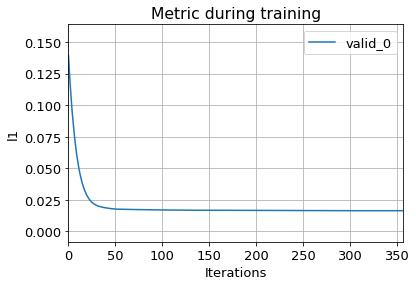

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0189089
[100]	valid_0's l1: 0.0179758
[150]	valid_0's l1: 0.0180096
Early stopping, best iteration is:
[124]	valid_0's l1: 0.0178952


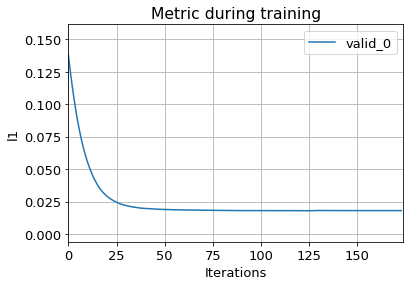

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0289018
[100]	valid_0's l1: 0.0278786
[150]	valid_0's l1: 0.0277808
[200]	valid_0's l1: 0.0273096
[250]	valid_0's l1: 0.0272684
Early stopping, best iteration is:
[204]	valid_0's l1: 0.027

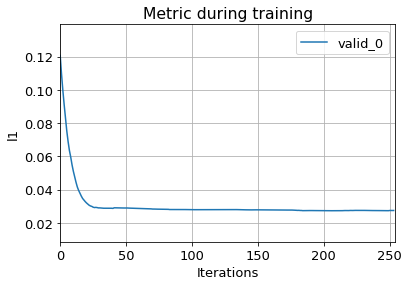

========== Starting level 6 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.03 Mb (74.8% reduction)
9 7
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.03 Mb (0.4% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 17217 rows and 5 columns
Selecting 19710 rows (114.5%)
Mem. usage decreased to  1.40 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_me

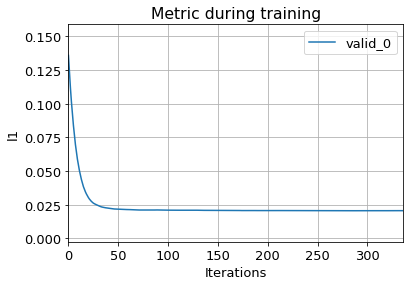

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0182972
[100]	valid_0's l1: 0.017522
[150]	valid_0's l1: 0.0172165
[200]	valid_0's l1: 0.0170396
[250]	valid_0's l1: 0.01693
[300]	valid_0's l1: 0.0168329
[350]	valid_0's l1: 0.016

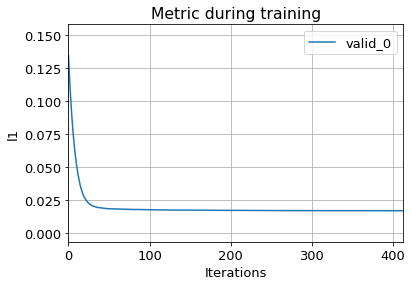

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0196578
[100]	valid_0's l1: 0.0189548
[150]	valid_0's l1: 0.0188321
[200]	valid_0's l1: 0.0187177
[250]	valid_0's l1: 0.0186706
[300]	valid_0's l1: 0.0186065
[350]	valid_0's l1: 0.

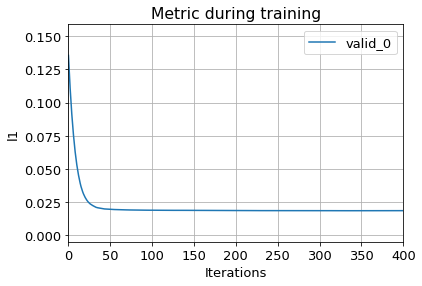

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0208907
[100]	valid_0's l1: 0.0199461
[150]	valid_0's l1: 0.0197176
[200]	valid_0's l1: 0.0196961
Early stopping, best iteration is:
[152]	valid_0's l1: 0.0196781


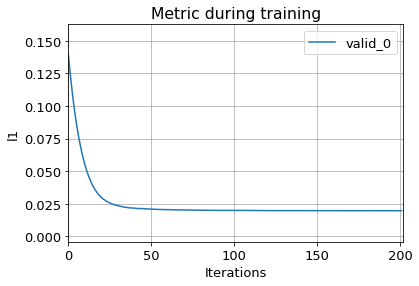

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0249894
[100]	valid_0's l1: 0.0245132
Early stopping, best iteration is:
[97]	valid_0's l1: 0.0244595


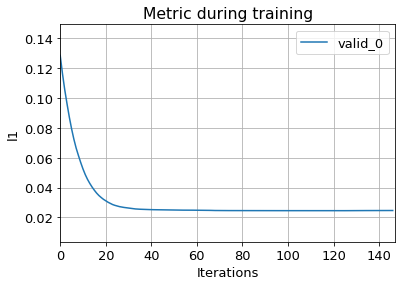

========== Starting level 7 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.08 Mb (74.8% reduction)
21 7
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.08 Mb (0.5% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 40173 rows and 6 columns
Selecting 45990 rows (114.5%)
Mem. usage decreased to  3.29 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_m

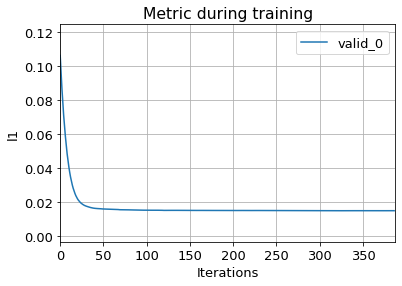

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.014162
[100]	valid_0's l1: 0.0133973
[150]	valid_0's l1: 0.0132
[200]	valid_0's l1: 0.0130366
[250]	valid_0's l1: 0.0129648
[300]	valid_0's l1: 0.0129543
[350]	valid_0's

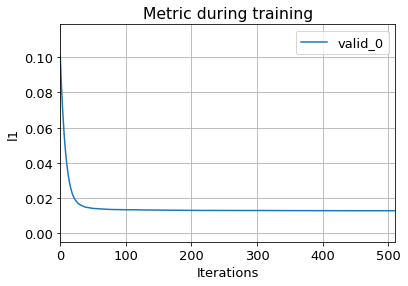

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0151601
[100]	valid_0's l1: 0.0142989
[150]	valid_0's l1: 0.0141575
[200]	valid_0's l1: 0.0140846
[250]	valid_0's l1: 0.0139973
[300]	valid_0's l1: 0.0139759
[350]	valid

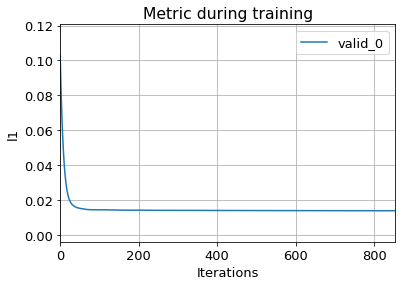

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.015133
[100]	valid_0's l1: 0.0142558
[150]	valid_0's l1: 0.014198
[200]	valid_0's l1: 0.0141255
[250]	valid_0's l1: 0.0140685
[300]	valid_0's l1: 0.0140439
[350]	valid_0

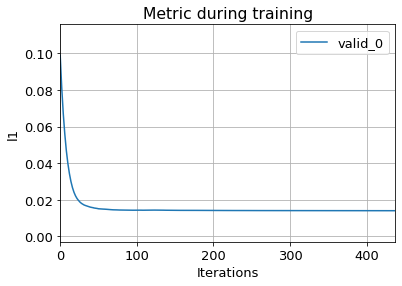

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0215051
[100]	valid_0's l1: 0.0204433
[150]	valid_0's l1: 0.0202247
[200]	valid_0's l1: 0.0201237
[250]	valid_0's l1: 0.0200665
[300]	valid_0's l1: 0.0200615
[350]	valid_0's l1

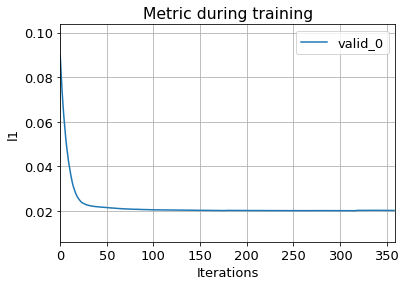

========== Starting level 8 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.11 Mb (74.8% reduction)
30 7
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.11 Mb (0.5% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 57390 rows and 6 columns
Selecting 65700 rows (114.5%)
Mem. usage decreased to  4.71 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_m

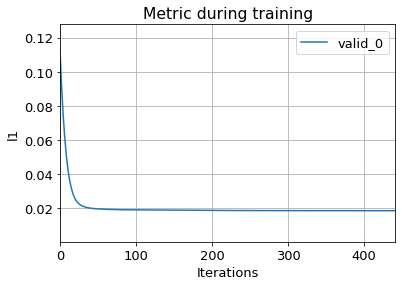

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0174168
[100]	valid_0's l1: 0.0167925
[150]	valid_0's l1: 0.0166221
[200]	valid_0's l1: 0.0164204
[250]	valid_0's l1: 0.0163919
[300]	valid_0's l1: 0.0163345
[350]	val

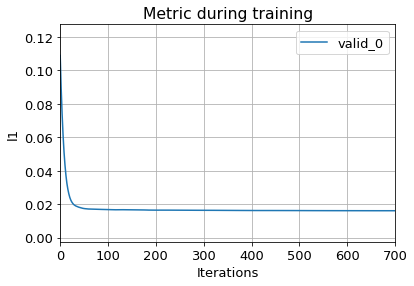

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0179962
[100]	valid_0's l1: 0.0174549
[150]	valid_0's l1: 0.0173166
[200]	valid_0's l1: 0.017101
[250]	valid_0's l1: 0.0170424
[300]	valid_0's l1: 0.016942
[350]	valid

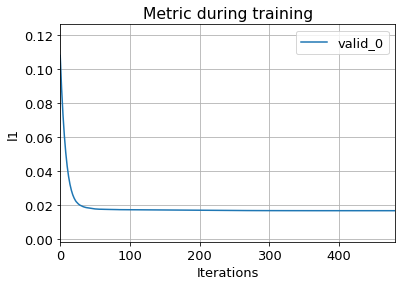

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0175245
[100]	valid_0's l1: 0.0168728
[150]	valid_0's l1: 0.0167936
[200]	valid_0's l1: 0.016671
[250]	valid_0's l1: 0.0165699
[300]	valid_0's l1: 0.0165065
[350]	vali

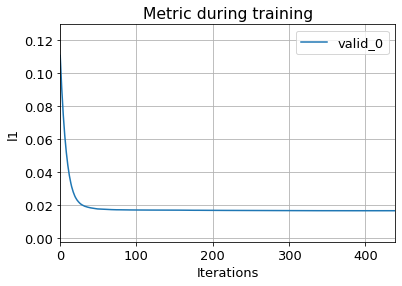

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0199849
[100]	valid_0's l1: 0.0196465
[150]	valid_0's l1: 0.0194951
[200]	valid_0's l1: 0.0195223
[250]	valid_0's l1: 0.019448
[300]	valid_0's l1: 0.0193926
[350]	valid_0's l

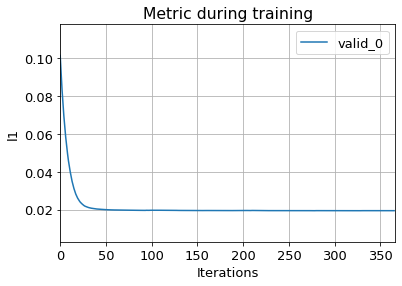

========== Starting level 9 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.26 Mb (74.8% reduction)
70 7
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.26 Mb (0.7% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 133910 rows and 7 columns
Selecting 153300 rows (114.5%)
Mem. usage decreased to 11.11 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling

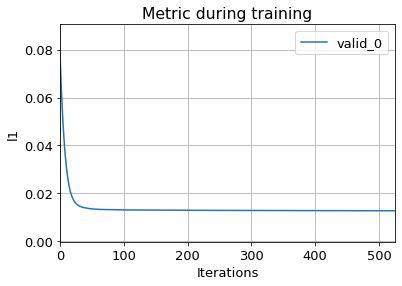

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0125523
[100]	valid_0's l1: 0.0119834
[150]	valid_0's l1: 0.0118036
[200]	valid_0's l1: 0.0116888
[250]	valid_0's l1: 0.0115836
[300]	valid_0's l1: 0.0115578

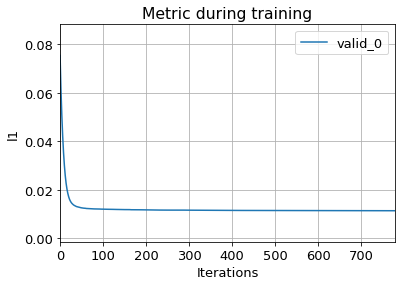

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0130965
[100]	valid_0's l1: 0.0125185
[150]	valid_0's l1: 0.012377
[200]	valid_0's l1: 0.0123063
[250]	valid_0's l1: 0.0122541
[300]	valid_0's l1: 0.0121653


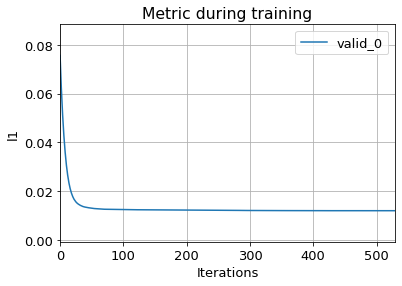

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0126713
[100]	valid_0's l1: 0.0122326
[150]	valid_0's l1: 0.0121316
[200]	valid_0's l1: 0.012033
[250]	valid_0's l1: 0.0119865
[300]	valid_0's l1: 0.0119144


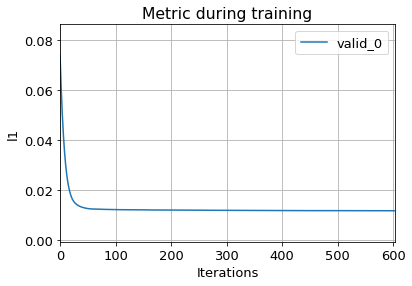

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.01464
[100]	valid_0's l1: 0.0142686
[150]	valid_0's l1: 0.0141789
[200]	valid_0's l1: 0.0141206
[250]	valid_0's l1: 0.0140121
[300]	valid_0's l1: 0.0137811
[350]	va

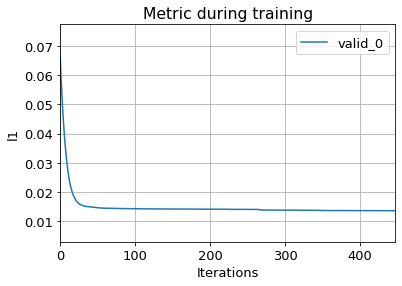

========== Starting level 10 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to 11.22 Mb (74.8% reduction)
3049 7
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to 11.16 Mb (0.5% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 5832737 rows and 6 columns
Selecting 6677310 rows (114.5%)
Mem. usage decreased to 483.94 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'r

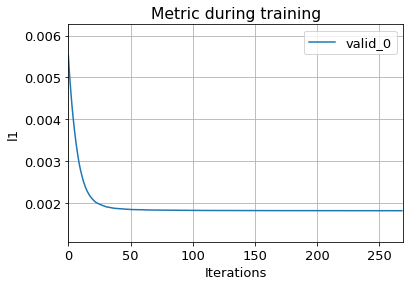

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00170779
[100]	valid_0's l1: 0.00168204
[150]	valid_0's l1: 0.00167904
[200]	valid_0's l1: 0.00167875
[250]	valid_0's l1: 0.00167621
[300]	valid_0's l1: 0.00167591
[350]	

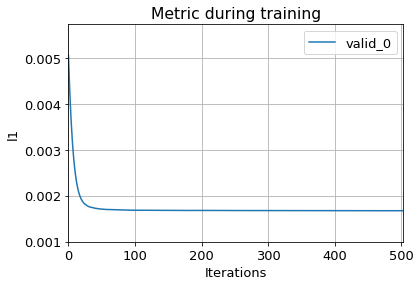

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00161948
[100]	valid_0's l1: 0.00158787
[150]	valid_0's l1: 0.00158197
[200]	valid_0's l1: 0.00158028
[250]	valid_0's l1: 0.00157889
[300]	valid_0's l1: 0.00157787
[350]	

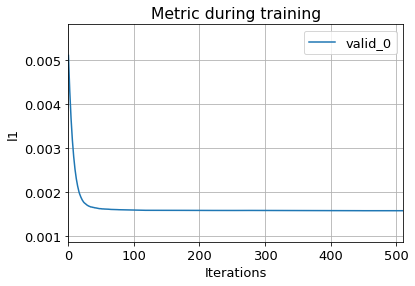

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.001407
[100]	valid_0's l1: 0.00135634
[150]	valid_0's l1: 0.00135226
Early stopping, best iteration is:
[130]	valid_0's l1: 0.00135089


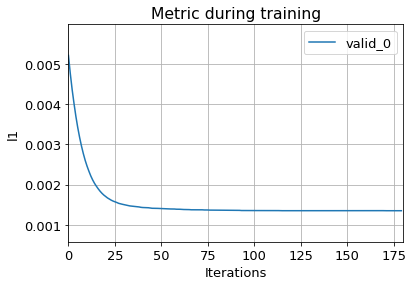

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00128296
[100]	valid_0's l1: 0.00126416
Early stopping, best iteration is:
[62]	valid_0's l1: 0.00125752


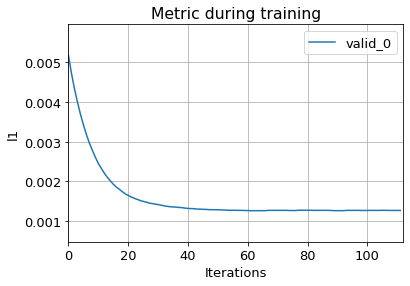

========== Starting level 11 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to 33.72 Mb (74.8% reduction)
9147 7
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to 33.49 Mb (0.7% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 17498211 rows and 7 columns
Selecting 20031930 rows (114.5%)
Mem. usage decreased to 1468.51 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7',

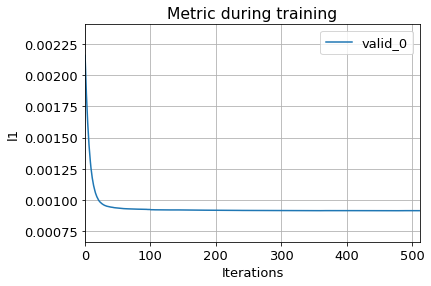

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000825063
[100]	valid_0's l1: 0.000814115
[150]	valid_0's l1: 0.000811442
[200]	valid_0's l1: 0.000809101
[250]	valid_0's l1: 0.000808396
[300]	valid_0's l1: 

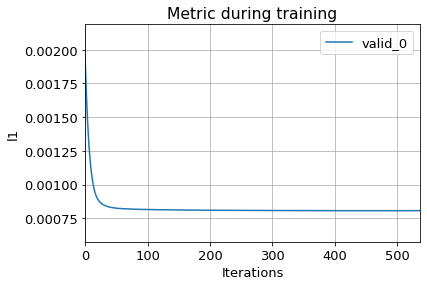

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000777671
[100]	valid_0's l1: 0.000762205
[150]	valid_0's l1: 0.000758337
[200]	valid_0's l1: 0.000756419
[250]	valid_0's l1: 0.000755149
[300]	valid_0's l1: 

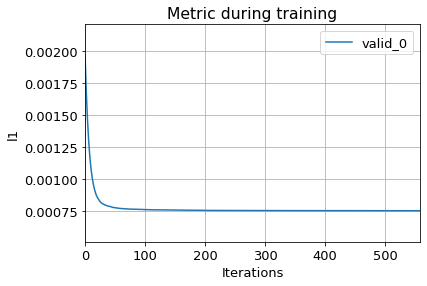

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000685885
[100]	valid_0's l1: 0.000665914
[150]	valid_0's l1: 0.000660203
[200]	valid_0's l1: 0.000658547
[250]	valid_0's l1: 0.000657158
[300]	valid_0's l1: 

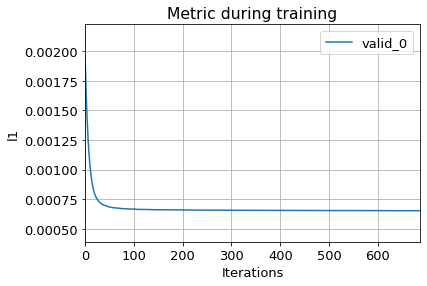

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000617438
[100]	valid_0's l1: 0.000614666
Early stopping, best iteration is:
[73]	valid_0's l1: 0.000599507


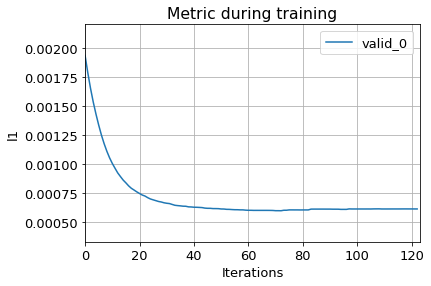

========== Starting level 12 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to 112.65 Mb (74.8% reduction)
30490 7
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to 111.66 Mb (0.9% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 58327370 rows and 8 columns
Selecting 22257700 rows (38.2%)
Our final dataset to train has 22257700 rows and 17 columns
Mem. usage decreased to 2186.34 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t

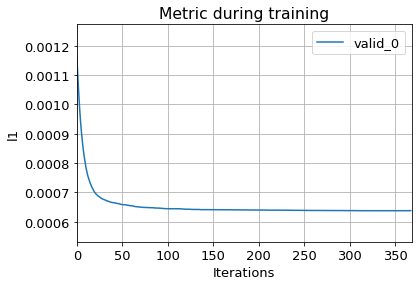

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-06-20 14:23:59.600000 and 2015-11-07 19:11:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000579118
[100]	valid_0's l1: 0.000565571
[

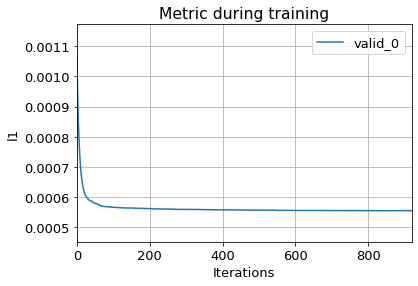

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-01-31 09:35:59.400000 and 2015-06-20 14:23:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000588789
Early stopping, best iteration is

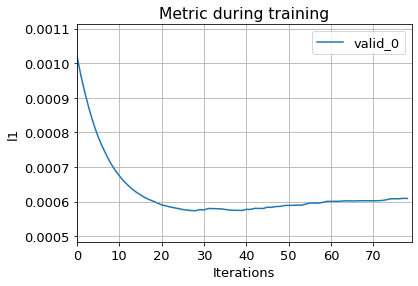

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-09-13 04:47:59.200000 and 2015-01-31 09:35:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000521848
[100]	valid_0's l1: 0.000506303
[

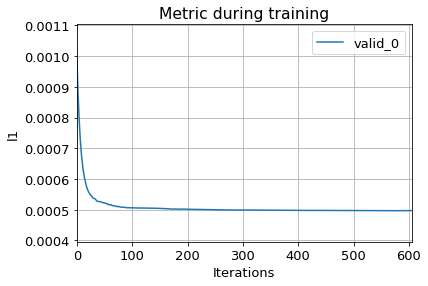

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t7', 'shift_t8', 'shift_t9', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-04-25 23:59:59 and 2014-09-13 04:47:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000520464
[100]	valid_0's l1: 0.000505564
[150]	va

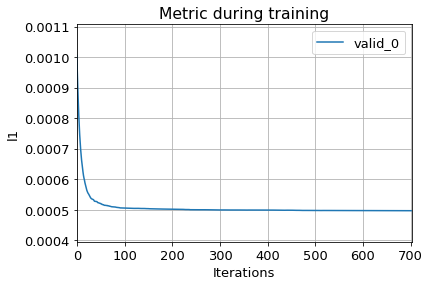

>>>>>>>>>>>>>>>> LAG IS 3 <<<<<<<<<<<<<<<
========== Starting level 1 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.00 Mb (74.6% reduction)
1 3
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.00 Mb (0.0% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 1913 rows and 3 columns
Selecting 2190 rows (114.5%)
Mem. usage decreased to  0.15 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_s

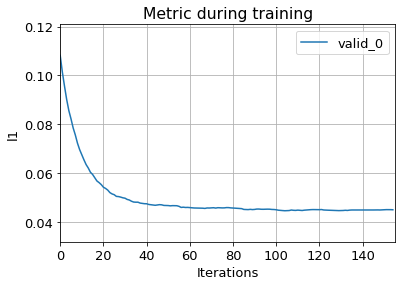

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0282823
[100]	valid_0's l1: 0.0272278
[150]	valid_0's l1: 0.0266935
[200]	valid_0's l1: 0.0265704
Early stopping, best iteration is:
[170]	valid_0's l1: 0.0264395


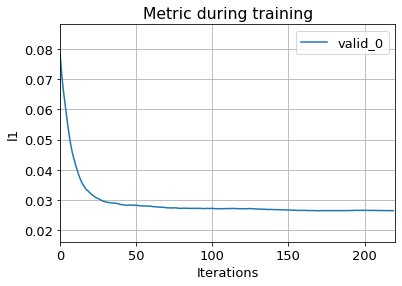

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0294808
[100]	valid_0's l1: 0.0290132
Early stopping, best iteration is:
[89]	valid_0's l1: 0.0288434


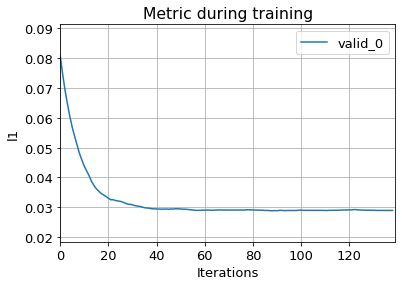

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0311865
[100]	valid_0's l1: 0.0299309
Early stopping, best iteration is:
[93]	valid_0's l1: 0.0298416


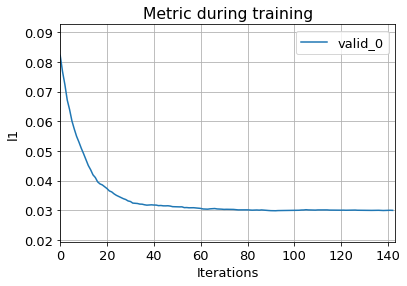

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0974465
Early stopping, best iteration is:
[49]	valid_0's l1: 0.0972871


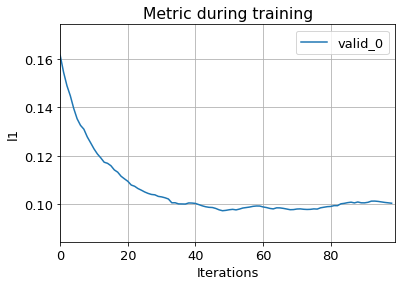

========== Starting level 2 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.01 Mb (74.8% reduction)
3 3
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.01 Mb (0.2% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 5739 rows and 4 columns
Selecting 6570 rows (114.5%)
Mem. usage decreased to  0.46 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean

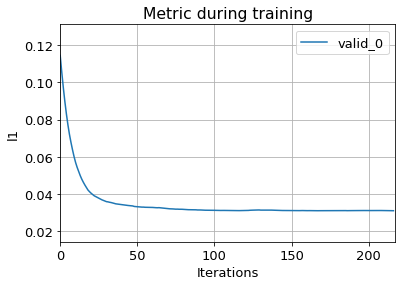

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0255344
[100]	valid_0's l1: 0.0240528
[150]	valid_0's l1: 0.0235499
[200]	valid_0's l1: 0.0234606
Early stopping, best iteration is:
[192]	valid_0's l1: 0.0234103


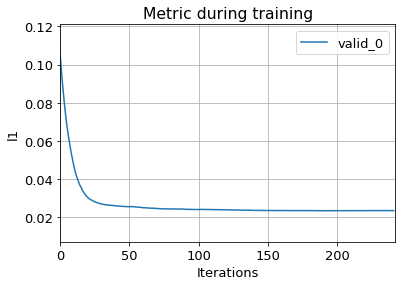

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0258915
[100]	valid_0's l1: 0.0244179
[150]	valid_0's l1: 0.0242453
Early stopping, best iteration is:
[119]	valid_0's l1: 0.0241455


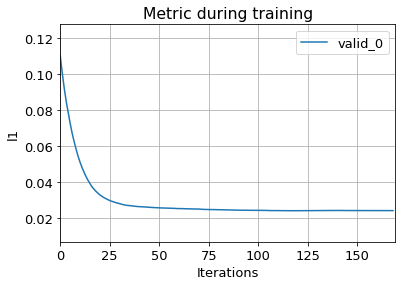

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0279592
[100]	valid_0's l1: 0.0269311
[150]	valid_0's l1: 0.0266515
[200]	valid_0's l1: 0.0264774
[250]	valid_0's l1: 0.0265195
Early stopping, best iteration is:
[224]	valid_0's l1: 0.02638

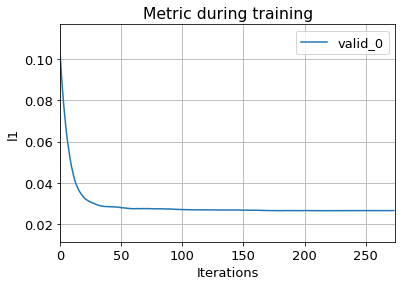

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0376326
[100]	valid_0's l1: 0.0371475
Early stopping, best iteration is:
[82]	valid_0's l1: 0.0368112


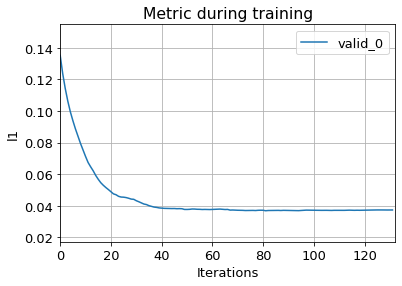

========== Starting level 3 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.04 Mb (74.8% reduction)
10 3
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.04 Mb (0.4% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 19130 rows and 5 columns
Selecting 21900 rows (114.5%)
Mem. usage decreased to  1.55 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_m

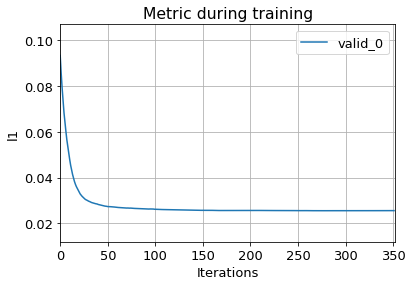

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0229398
[100]	valid_0's l1: 0.02206
[150]	valid_0's l1: 0.021875
[200]	valid_0's l1: 0.0215739
[250]	valid_0's l1: 0.0214926
Early stopping, best iteration is:
[234]	valid_0's l1

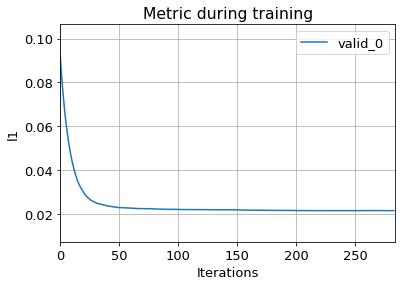

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0237404
[100]	valid_0's l1: 0.0225737
[150]	valid_0's l1: 0.0224268
[200]	valid_0's l1: 0.0223999
[250]	valid_0's l1: 0.0223282
Early stopping, best iteration is:
[220]	valid_0's

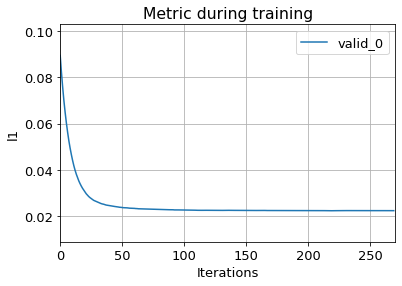

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0246355
[100]	valid_0's l1: 0.0234458
[150]	valid_0's l1: 0.0232746
[200]	valid_0's l1: 0.0231965
[250]	valid_0's l1: 0.0229786
[300]	valid_0's l1: 0.0229306
[350]	valid_0's l1: 

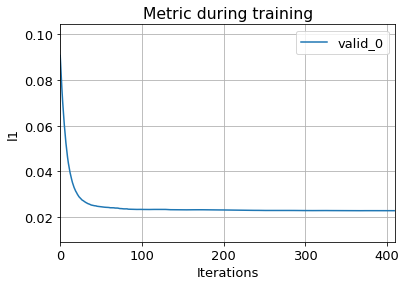

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0278596
[100]	valid_0's l1: 0.0271431
[150]	valid_0's l1: 0.0268254
[200]	valid_0's l1: 0.0261877
[250]	valid_0's l1: 0.0260167
[300]	valid_0's l1: 0.0260703
Early stopping, best iterat

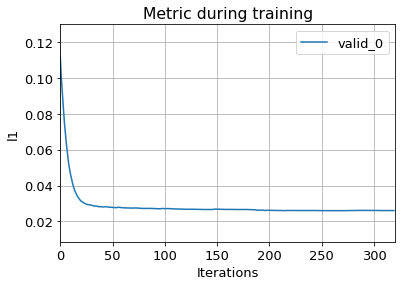

========== Starting level 4 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.01 Mb (74.8% reduction)
3 3
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.01 Mb (0.2% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 5739 rows and 4 columns
Selecting 6570 rows (114.5%)
Mem. usage decreased to  0.46 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean

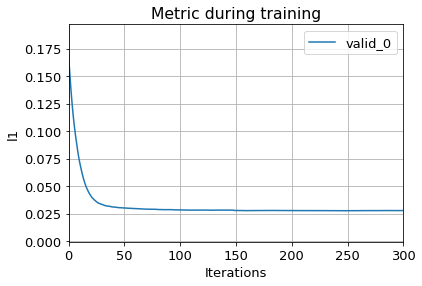

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0192232
[100]	valid_0's l1: 0.0184195
[150]	valid_0's l1: 0.0185148
Early stopping, best iteration is:
[102]	valid_0's l1: 0.0183966


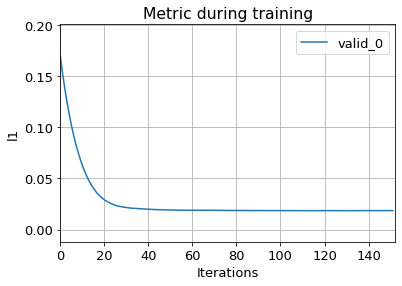

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0203179
[100]	valid_0's l1: 0.0198132
[150]	valid_0's l1: 0.0197803
Early stopping, best iteration is:
[110]	valid_0's l1: 0.0196584


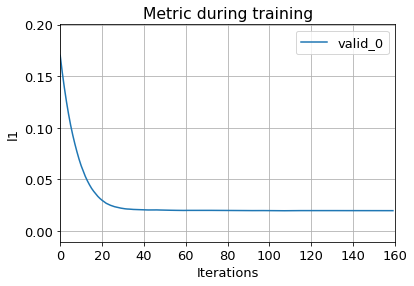

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0240768
[100]	valid_0's l1: 0.0228591
[150]	valid_0's l1: 0.0227341
[200]	valid_0's l1: 0.0227828
[250]	valid_0's l1: 0.0224511
Early stopping, best iteration is:
[235]	valid_0's l1: 0.0224213

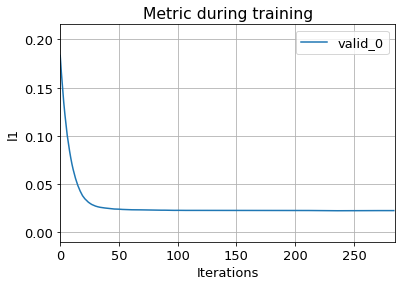

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.033201
[100]	valid_0's l1: 0.0331399
Early stopping, best iteration is:
[68]	valid_0's l1: 0.0329224


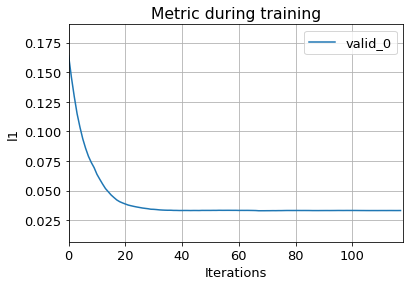

========== Starting level 5 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.03 Mb (74.8% reduction)
7 3
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.03 Mb (0.4% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 13391 rows and 5 columns
Selecting 15330 rows (114.5%)
Mem. usage decreased to  1.09 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_me

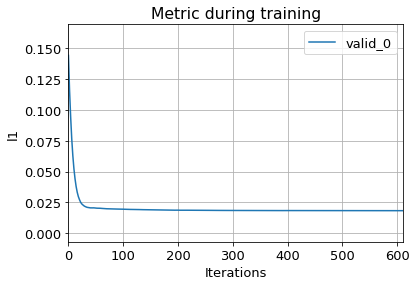

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0157164
[100]	valid_0's l1: 0.0150059
[150]	valid_0's l1: 0.0146978
[200]	valid_0's l1: 0.0145767
[250]	valid_0's l1: 0.0144817
Early stopping, best iteration is:
[243]	valid_0's l1

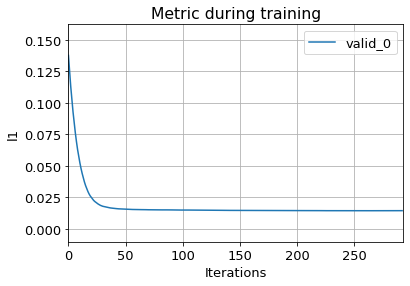

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0174872
[100]	valid_0's l1: 0.0167354
[150]	valid_0's l1: 0.0165999
[200]	valid_0's l1: 0.016517
[250]	valid_0's l1: 0.0163966
[300]	valid_0's l1: 0.0163477
[350]	valid_0's l1: 0.01

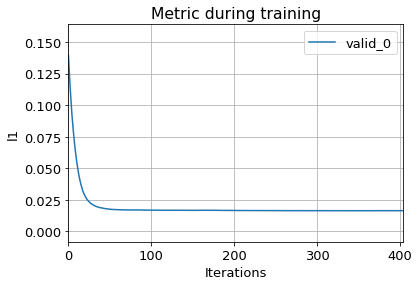

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0187712
[100]	valid_0's l1: 0.0174208
[150]	valid_0's l1: 0.0172207
[200]	valid_0's l1: 0.0171065
[250]	valid_0's l1: 0.0170639
[300]	valid_0's l1: 0.0169368
[350]	valid_0's l1: 0.0

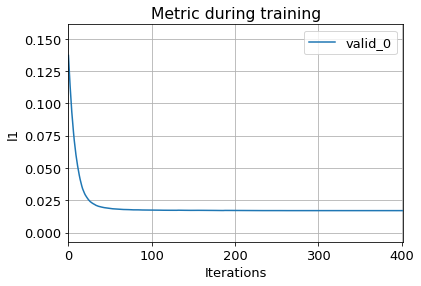

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0333425
[100]	valid_0's l1: 0.0322436
[150]	valid_0's l1: 0.0317282
[200]	valid_0's l1: 0.0313652
[250]	valid_0's l1: 0.0312189
[300]	valid_0's l1: 0.0312202
Early stopping, best iteration

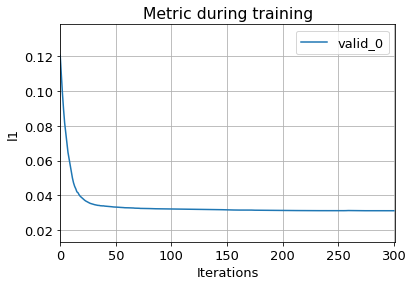

========== Starting level 6 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.03 Mb (74.8% reduction)
9 3
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.03 Mb (0.4% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 17217 rows and 5 columns
Selecting 19710 rows (114.5%)
Mem. usage decreased to  1.40 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_me

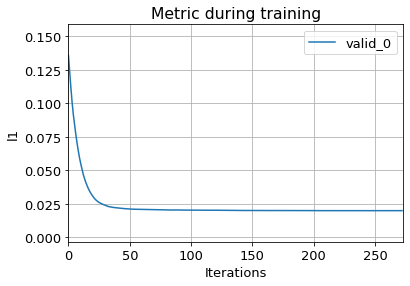

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0175203
[100]	valid_0's l1: 0.0166678
[150]	valid_0's l1: 0.0165132
[200]	valid_0's l1: 0.0164396
[250]	valid_0's l1: 0.0163332
[300]	valid_0's l1: 0.0163073
[350]	valid_0's l1: 0.

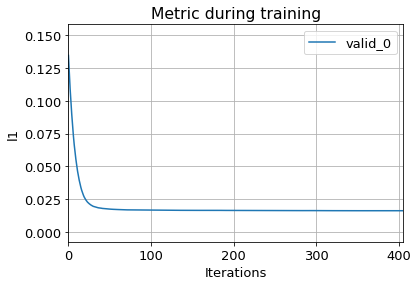

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0186073
[100]	valid_0's l1: 0.0180005
[150]	valid_0's l1: 0.0179529
[200]	valid_0's l1: 0.0178502
[250]	valid_0's l1: 0.0178094
Early stopping, best iteration is:
[236]	valid_0's l

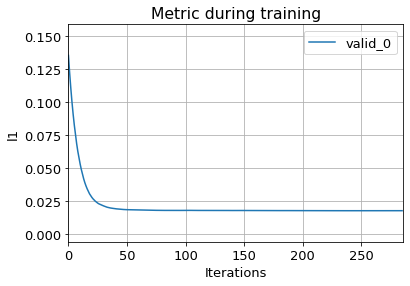

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0199994
[100]	valid_0's l1: 0.019089
[150]	valid_0's l1: 0.0188255
[200]	valid_0's l1: 0.018708
[250]	valid_0's l1: 0.0185998
[300]	valid_0's l1: 0.018594
[350]	valid_0's l1: 0.018

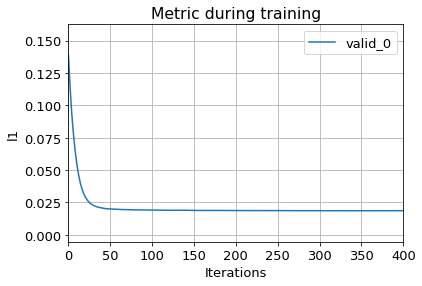

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0286186
[100]	valid_0's l1: 0.0280205
[150]	valid_0's l1: 0.0277787
[200]	valid_0's l1: 0.027528
[250]	valid_0's l1: 0.0273105
[300]	valid_0's l1: 0.0270243
Early stopping, best iteration

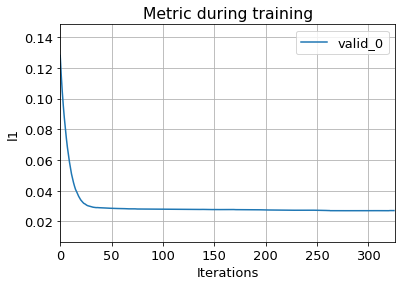

========== Starting level 7 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.08 Mb (74.8% reduction)
21 3
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.08 Mb (0.5% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 40173 rows and 6 columns
Selecting 45990 rows (114.5%)
Mem. usage decreased to  3.29 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_m

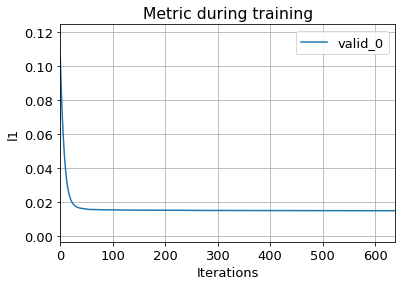

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0137506
[100]	valid_0's l1: 0.0129382
[150]	valid_0's l1: 0.0127632
[200]	valid_0's l1: 0.0126684
[250]	valid_0's l1: 0.0125529
[300]	valid_0's l1: 0.0124018
[350]	valid

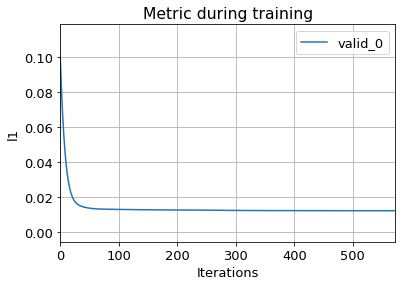

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0148542
[100]	valid_0's l1: 0.0136601
[150]	valid_0's l1: 0.0136094
[200]	valid_0's l1: 0.0135223
[250]	valid_0's l1: 0.0134316
[300]	valid_0's l1: 0.0133658
[350]	valid

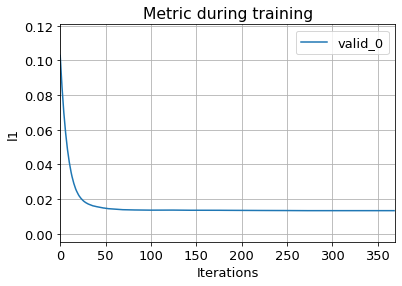

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0145566
[100]	valid_0's l1: 0.0135874
[150]	valid_0's l1: 0.0135134
[200]	valid_0's l1: 0.01341
[250]	valid_0's l1: 0.0132694
[300]	valid_0's l1: 0.0131867
[350]	valid_0

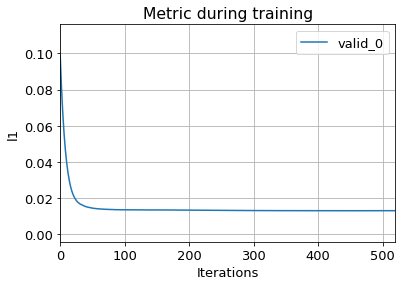

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0188923
[100]	valid_0's l1: 0.0180066
[150]	valid_0's l1: 0.0177485
[200]	valid_0's l1: 0.0174499
[250]	valid_0's l1: 0.0173899
[300]	valid_0's l1: 0.0173444
[350]	valid_0's l1

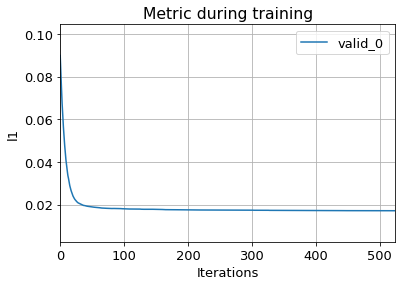

========== Starting level 8 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.11 Mb (74.8% reduction)
30 3
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.11 Mb (0.5% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 57390 rows and 6 columns
Selecting 65700 rows (114.5%)
Mem. usage decreased to  4.71 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_m

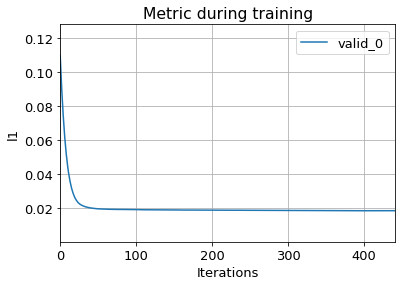

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0167243
[100]	valid_0's l1: 0.0160443
[150]	valid_0's l1: 0.0158781
[200]	valid_0's l1: 0.0156486
[250]	valid_0's l1: 0.0155399
[300]	valid_0's l1: 0.0155019
[350]	val

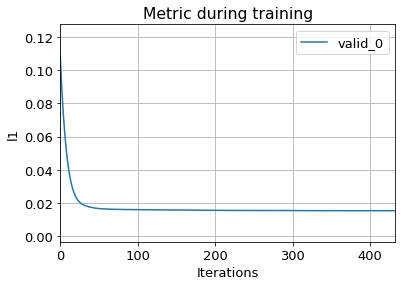

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0172723
[100]	valid_0's l1: 0.0166491
[150]	valid_0's l1: 0.0165292
[200]	valid_0's l1: 0.016438
Early stopping, best iteration is:
[192]	valid_0's l1: 0.0164275


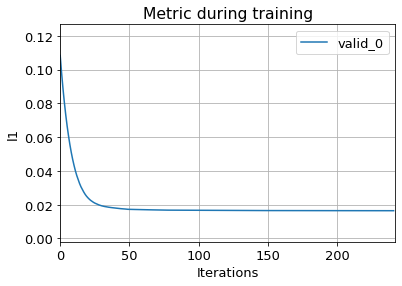

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0170358
[100]	valid_0's l1: 0.0162467
[150]	valid_0's l1: 0.0161407
[200]	valid_0's l1: 0.0159673
[250]	valid_0's l1: 0.0159354
[300]	valid_0's l1: 0.0159167
[350]	val

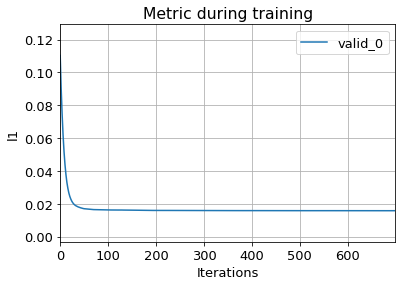

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0198444
[100]	valid_0's l1: 0.0192731
[150]	valid_0's l1: 0.0190834
[200]	valid_0's l1: 0.019037
[250]	valid_0's l1: 0.018997
Early stopping, best iteration is:
[236]	valid_0

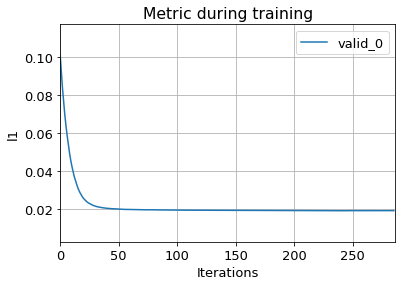

========== Starting level 9 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.26 Mb (74.8% reduction)
70 3
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.26 Mb (0.7% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 133910 rows and 7 columns
Selecting 153300 rows (114.5%)
Mem. usage decreased to 11.11 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling

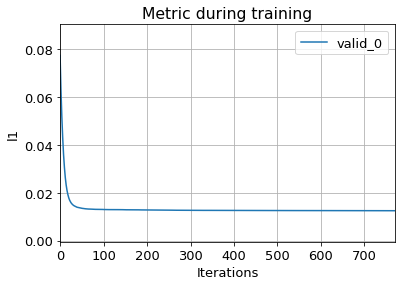

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0122098
[100]	valid_0's l1: 0.011549
[150]	valid_0's l1: 0.011423
[200]	valid_0's l1: 0.0113135
[250]	valid_0's l1: 0.0112312
[300]	valid_0's l1: 0.0111794
[

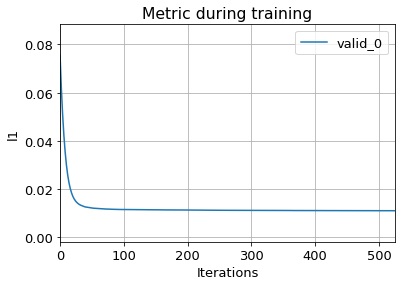

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0126699
[100]	valid_0's l1: 0.0119874
[150]	valid_0's l1: 0.0118593
[200]	valid_0's l1: 0.0117952
[250]	valid_0's l1: 0.0117245
[300]	valid_0's l1: 0.0116936

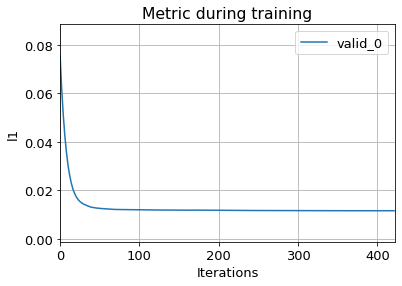

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0123623
[100]	valid_0's l1: 0.0117091
[150]	valid_0's l1: 0.0115078
[200]	valid_0's l1: 0.0114317
[250]	valid_0's l1: 0.0113098
[300]	valid_0's l1: 0.0112478

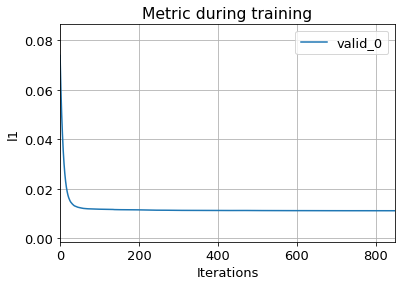

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.013741
[100]	valid_0's l1: 0.0132242
[150]	valid_0's l1: 0.0130276
[200]	valid_0's l1: 0.0129561
[250]	valid_0's l1: 0.0128337
[300]	valid_0's l1: 0.012741
[350]	va

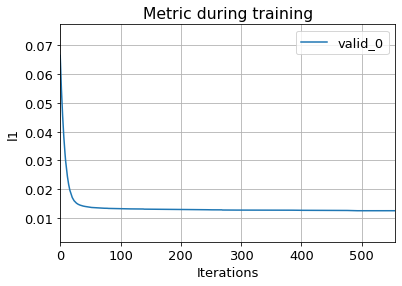

========== Starting level 10 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to 11.22 Mb (74.8% reduction)
3049 3
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to 11.16 Mb (0.5% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 5832737 rows and 6 columns
Selecting 6677310 rows (114.5%)
Mem. usage decreased to 483.94 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'r

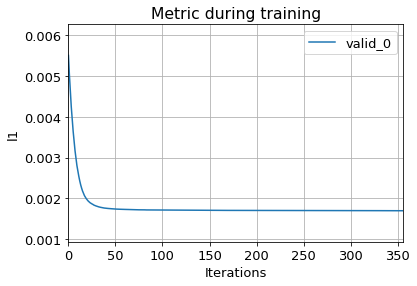

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00156994
[100]	valid_0's l1: 0.00154135
[150]	valid_0's l1: 0.00153545
[200]	valid_0's l1: 0.00153217
[250]	valid_0's l1: 0.00152862
[300]	valid_0's l1: 0.00152864
[350]	

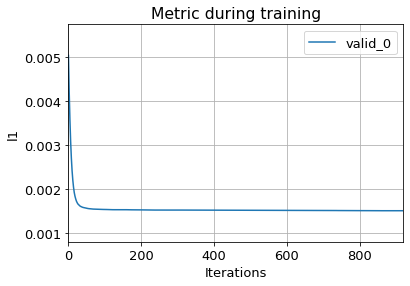

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0014785
[100]	valid_0's l1: 0.00144212
[150]	valid_0's l1: 0.001438
[200]	valid_0's l1: 0.00143513
[250]	valid_0's l1: 0.00143431
Early stopping, best iteration is:
[220]

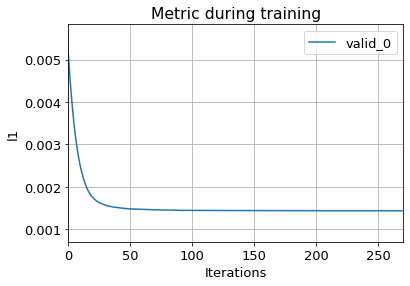

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00130035
[100]	valid_0's l1: 0.00124674
[150]	valid_0's l1: 0.0012415
[200]	valid_0's l1: 0.00123931
[250]	valid_0's l1: 0.00123547
[300]	valid_0's l1: 0.00123451
[350]	v

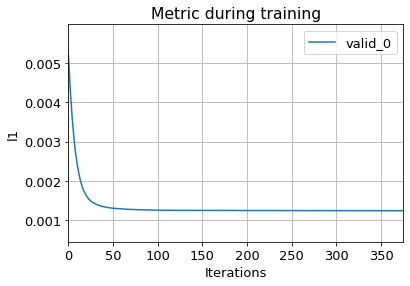

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00116421
[100]	valid_0's l1: 0.00112139
[150]	valid_0's l1: 0.00112611
Early stopping, best iteration is:
[106]	valid_0's l1: 0.0011212


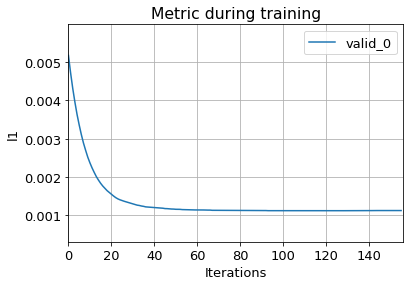

========== Starting level 11 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to 33.72 Mb (74.8% reduction)
9147 3
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to 33.49 Mb (0.7% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 17498211 rows and 7 columns
Selecting 20031930 rows (114.5%)
Mem. usage decreased to 1468.51 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7',

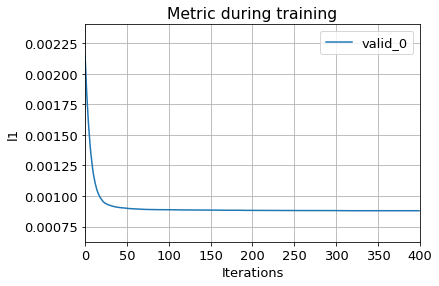

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000781829
[100]	valid_0's l1: 0.000771242
[150]	valid_0's l1: 0.000770997
[200]	valid_0's l1: 0.0007687
[250]	valid_0's l1: 0.000767609
[300]	valid_0's l1: 0.

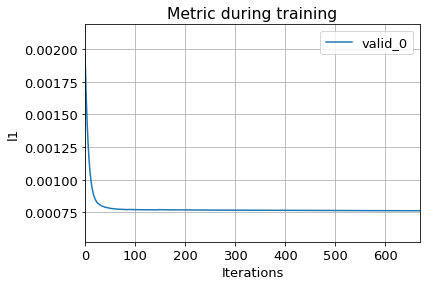

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000733158
[100]	valid_0's l1: 0.000716126
[150]	valid_0's l1: 0.000713088
[200]	valid_0's l1: 0.000712449
[250]	valid_0's l1: 0.000711277
[300]	valid_0's l1: 

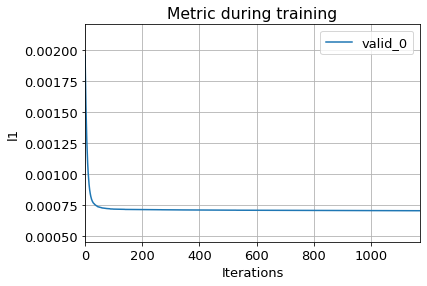

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00065052
[100]	valid_0's l1: 0.00062453
[150]	valid_0's l1: 0.000620695
[200]	valid_0's l1: 0.000619777
[250]	valid_0's l1: 0.000618542
[300]	valid_0's l1: 0.

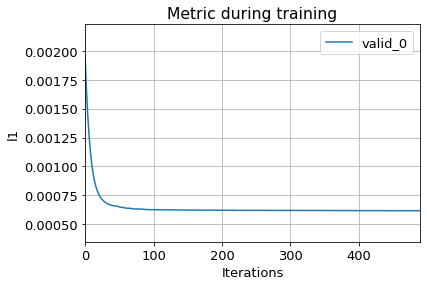

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000571754
[100]	valid_0's l1: 0.000553285
Early stopping, best iteration is:
[87]	valid_0's l1: 0.000551748


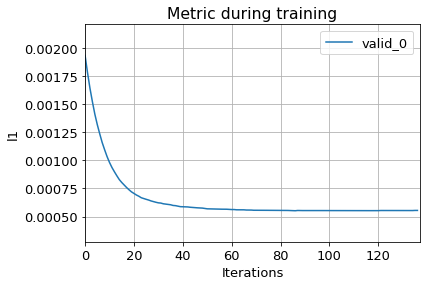

========== Starting level 12 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to 112.65 Mb (74.8% reduction)
30490 3
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to 111.66 Mb (0.9% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 58327370 rows and 8 columns
Selecting 22257700 rows (38.2%)
Our final dataset to train has 22257700 rows and 17 columns
Mem. usage decreased to 2186.34 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t

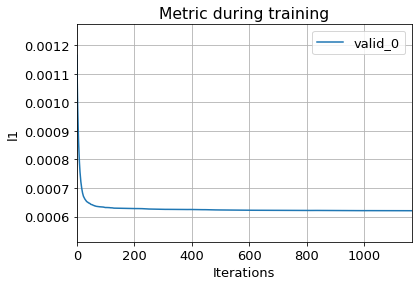

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-06-20 14:23:59.600000 and 2015-11-07 19:11:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000560411
[100]	valid_0's l1: 0.000549133
[

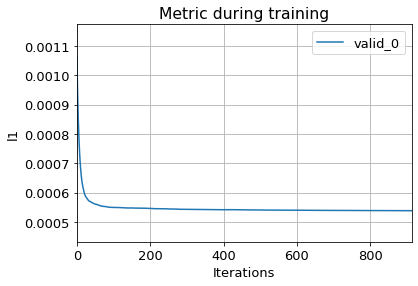

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-01-31 09:35:59.400000 and 2015-06-20 14:23:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00056393
Early stopping, best iteration is:

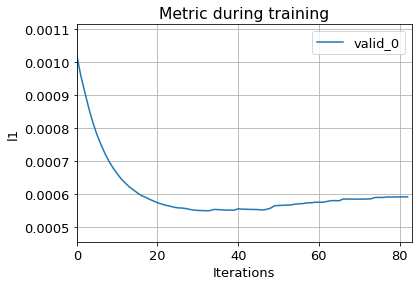

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-09-13 04:47:59.200000 and 2015-01-31 09:35:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000499933
[100]	valid_0's l1: 0.000488111
[

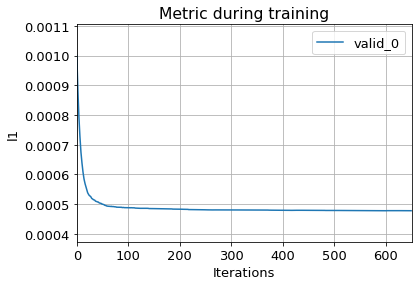

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t3', 'shift_t4', 'shift_t5', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-04-25 23:59:59 and 2014-09-13 04:47:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000498139
[100]	valid_0's l1: 0.000486092
[150]	va

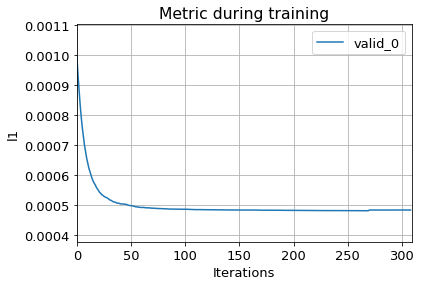

>>>>>>>>>>>>>>>> LAG IS 2 <<<<<<<<<<<<<<<
========== Starting level 1 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.00 Mb (74.6% reduction)
1 2
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.00 Mb (0.0% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 1913 rows and 3 columns
Selecting 2190 rows (114.5%)
Mem. usage decreased to  0.15 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_s

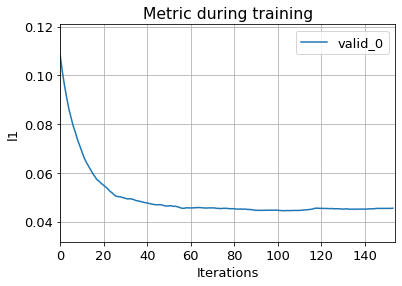

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0280307
[100]	valid_0's l1: 0.0269979
[150]	valid_0's l1: 0.0271
Early stopping, best iteration is:
[116]	valid_0's l1: 0.026913


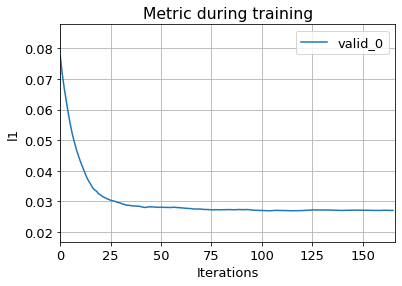

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0291427
[100]	valid_0's l1: 0.0285216
Early stopping, best iteration is:
[89]	valid_0's l1: 0.028282


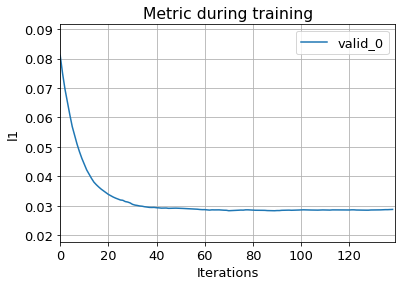

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0352059
[100]	valid_0's l1: 0.0331842
[150]	valid_0's l1: 0.0334457
Early stopping, best iteration is:
[122]	valid_0's l1: 0.0331018


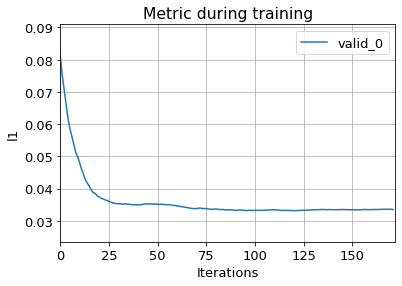

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0924144
[100]	valid_0's l1: 0.0930296
Early stopping, best iteration is:
[83]	valid_0's l1: 0.0912758


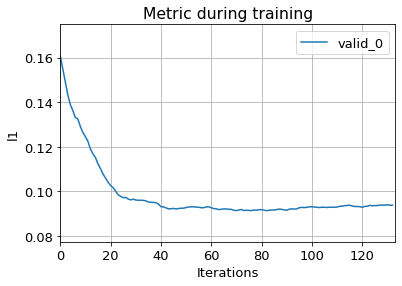

========== Starting level 2 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.01 Mb (74.8% reduction)
3 2
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.01 Mb (0.2% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 5739 rows and 4 columns
Selecting 6570 rows (114.5%)
Mem. usage decreased to  0.46 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean

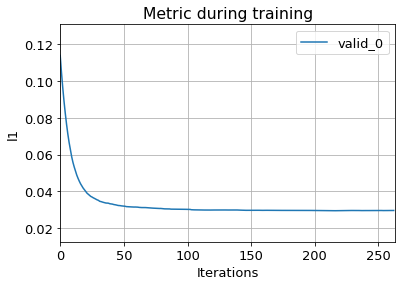

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0245909
[100]	valid_0's l1: 0.0237708
[150]	valid_0's l1: 0.0233897
[200]	valid_0's l1: 0.0229287
[250]	valid_0's l1: 0.0229515
Early stopping, best iteration is:
[212]	valid_0's l1: 0.02286

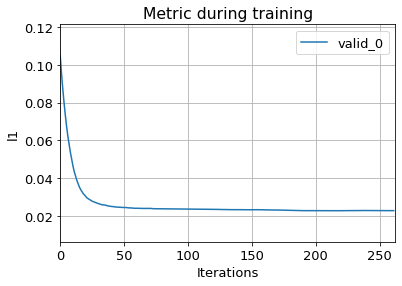

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0253918
[100]	valid_0's l1: 0.0240079
[150]	valid_0's l1: 0.0238491
[200]	valid_0's l1: 0.0237141
[250]	valid_0's l1: 0.0236539
[300]	valid_0's l1: 0.023523
[350]	valid_0's l1: 0.0236038
Ear

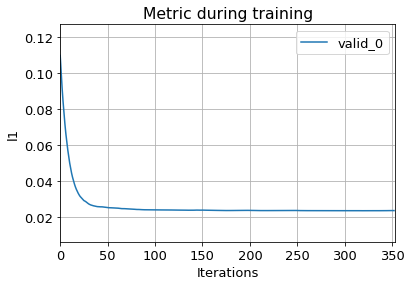

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0268164
[100]	valid_0's l1: 0.0255218
[150]	valid_0's l1: 0.0251735
[200]	valid_0's l1: 0.0249822
Early stopping, best iteration is:
[186]	valid_0's l1: 0.0249369


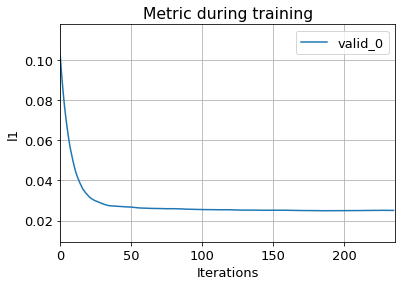

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0369393
[100]	valid_0's l1: 0.0376141
Early stopping, best iteration is:
[71]	valid_0's l1: 0.0365678


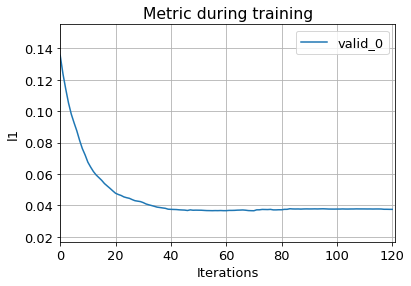

========== Starting level 3 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.04 Mb (74.8% reduction)
10 2
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.04 Mb (0.4% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 19130 rows and 5 columns
Selecting 21900 rows (114.5%)
Mem. usage decreased to  1.55 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_m

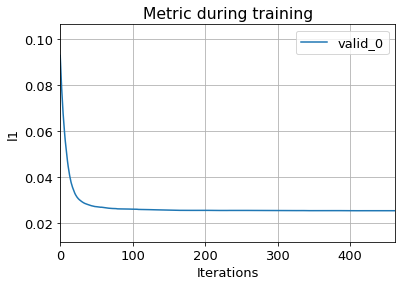

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.022444
[100]	valid_0's l1: 0.0214346
[150]	valid_0's l1: 0.0211373
[200]	valid_0's l1: 0.0209004
[250]	valid_0's l1: 0.0210128
Early stopping, best iteration is:
[209]	valid_0's 

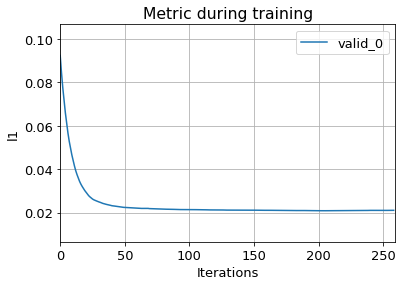

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0233455
[100]	valid_0's l1: 0.0223534
[150]	valid_0's l1: 0.0221606
[200]	valid_0's l1: 0.0220324
[250]	valid_0's l1: 0.0219467
[300]	valid_0's l1: 0.0219185
[350]	valid_0's l1: 

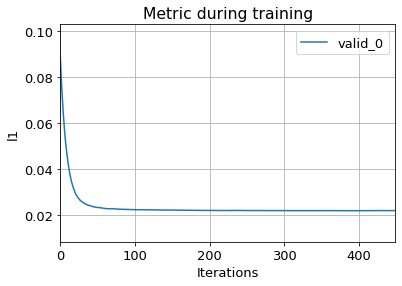

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0240528
[100]	valid_0's l1: 0.022882
[150]	valid_0's l1: 0.0226109
[200]	valid_0's l1: 0.022432
[250]	valid_0's l1: 0.0223411
[300]	valid_0's l1: 0.0222461
[350]	valid_0's l1: 0.

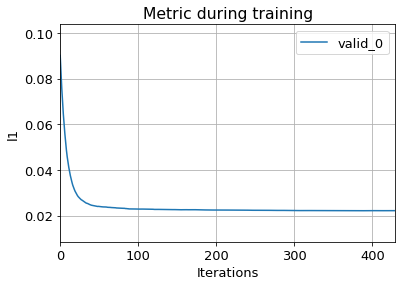

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0271774
[100]	valid_0's l1: 0.026216
[150]	valid_0's l1: 0.0261476
[200]	valid_0's l1: 0.0255265
[250]	valid_0's l1: 0.0254067
[300]	valid_0's l1: 0.0253523
[350]	valid_0's l1: 0.025251

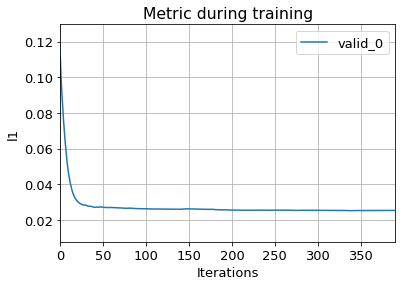

========== Starting level 4 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.01 Mb (74.8% reduction)
3 2
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.01 Mb (0.2% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 5739 rows and 4 columns
Selecting 6570 rows (114.5%)
Mem. usage decreased to  0.46 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean

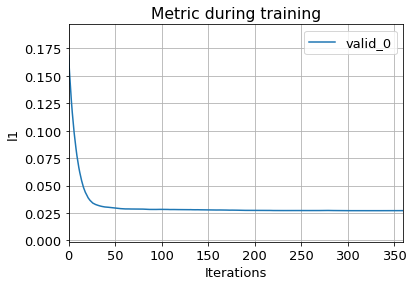

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0194059
[100]	valid_0's l1: 0.0185427
[150]	valid_0's l1: 0.0184553
[200]	valid_0's l1: 0.0183238
Early stopping, best iteration is:
[190]	valid_0's l1: 0.0182928


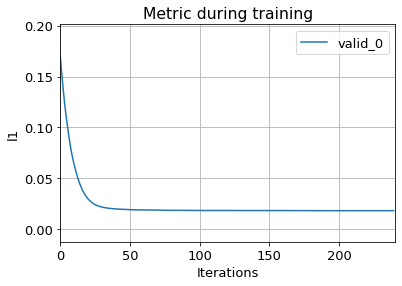

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0203472
[100]	valid_0's l1: 0.0195722
[150]	valid_0's l1: 0.0196646
Early stopping, best iteration is:
[103]	valid_0's l1: 0.0195248


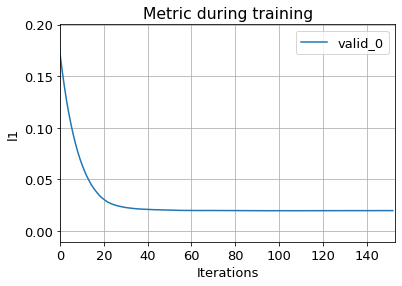

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0236048
[100]	valid_0's l1: 0.0221055
[150]	valid_0's l1: 0.0215624
[200]	valid_0's l1: 0.0213932
[250]	valid_0's l1: 0.0212939
Early stopping, best iteration is:
[241]	valid_0's l1: 0.0212233

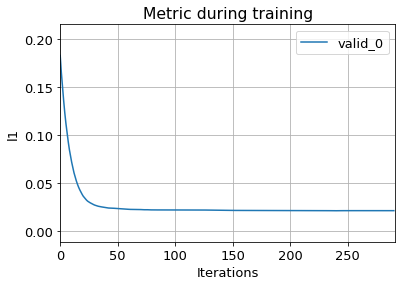

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0330126
[100]	valid_0's l1: 0.0324088
[150]	valid_0's l1: 0.0325119
Early stopping, best iteration is:
[100]	valid_0's l1: 0.0324088


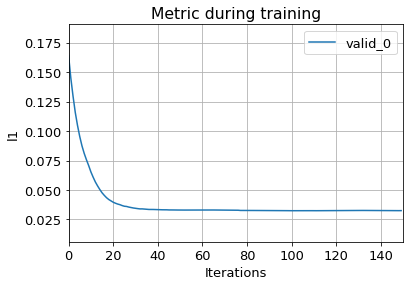

========== Starting level 5 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.03 Mb (74.8% reduction)
7 2
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.03 Mb (0.4% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 13391 rows and 5 columns
Selecting 15330 rows (114.5%)
Mem. usage decreased to  1.09 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_me

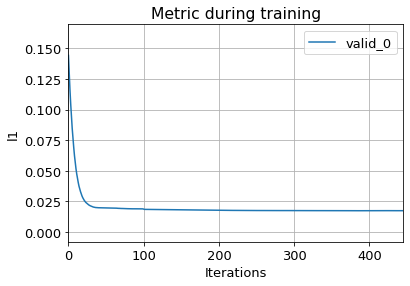

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.015008
[100]	valid_0's l1: 0.0142877
[150]	valid_0's l1: 0.0140471
[200]	valid_0's l1: 0.0139428
[250]	valid_0's l1: 0.0139109
[300]	valid_0's l1: 0.013882
[350]	valid_0's l1: 0.013

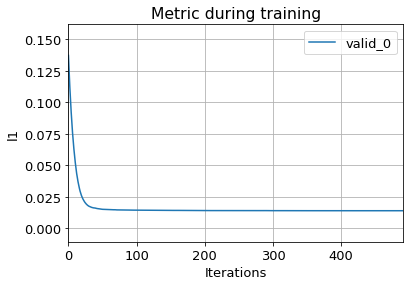

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0169702
[100]	valid_0's l1: 0.0160439
[150]	valid_0's l1: 0.0157518
[200]	valid_0's l1: 0.0155861
[250]	valid_0's l1: 0.0154511
[300]	valid_0's l1: 0.0154155
[350]	valid_0's l1: 0.0

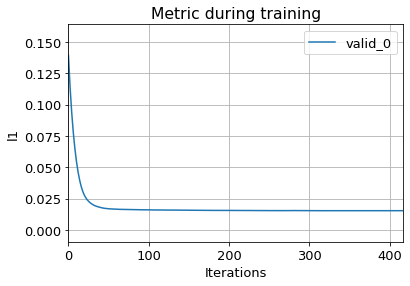

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0175524
[100]	valid_0's l1: 0.016223
[150]	valid_0's l1: 0.0161036
[200]	valid_0's l1: 0.0159129
[250]	valid_0's l1: 0.0158289
[300]	valid_0's l1: 0.0157814
[350]	valid_0's l1: 0.01

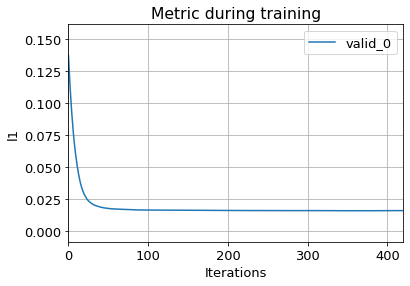

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0275666
[100]	valid_0's l1: 0.0263989
[150]	valid_0's l1: 0.0261941
[200]	valid_0's l1: 0.0259539
[250]	valid_0's l1: 0.0256926
[300]	valid_0's l1: 0.0254092
[350]	valid_0's l1: 0.0252631


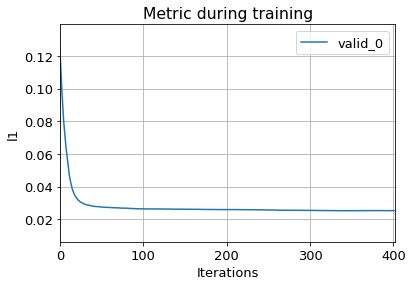

========== Starting level 6 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.03 Mb (74.8% reduction)
9 2
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.03 Mb (0.4% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 17217 rows and 5 columns
Selecting 19710 rows (114.5%)
Mem. usage decreased to  1.40 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_me

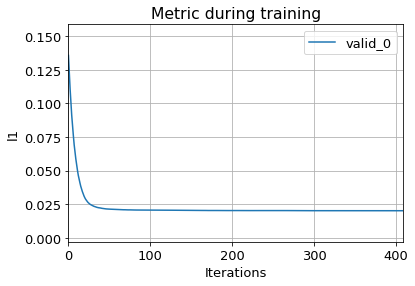

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0169201
[100]	valid_0's l1: 0.0164255
[150]	valid_0's l1: 0.0162976
[200]	valid_0's l1: 0.0162562
[250]	valid_0's l1: 0.0161734
[300]	valid_0's l1: 0.0161745
[350]	valid_0's l1: 0.

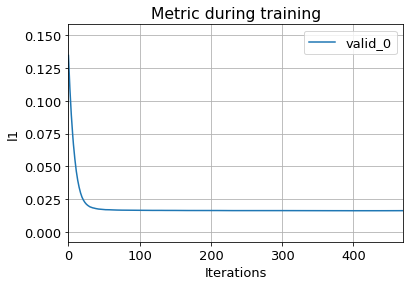

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0184458
[100]	valid_0's l1: 0.0177185
[150]	valid_0's l1: 0.0176447
[200]	valid_0's l1: 0.0174686
[250]	valid_0's l1: 0.0174735
[300]	valid_0's l1: 0.0174353
[350]	valid_0's l1: 0.

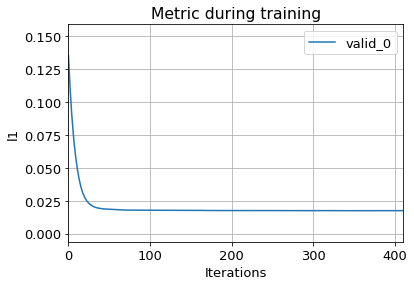

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0193343
[100]	valid_0's l1: 0.0185063
[150]	valid_0's l1: 0.0183931
[200]	valid_0's l1: 0.0182305
[250]	valid_0's l1: 0.0181899
[300]	valid_0's l1: 0.0182075
Early stopping, best i

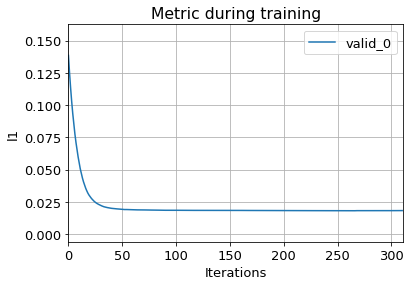

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0262407
[100]	valid_0's l1: 0.0257549
[150]	valid_0's l1: 0.0256059
[200]	valid_0's l1: 0.0255346
[250]	valid_0's l1: 0.0253685
Early stopping, best iteration is:
[230]	valid_0's l1: 0.02

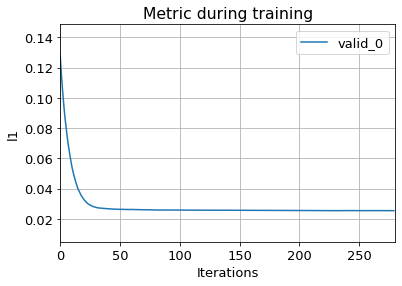

========== Starting level 7 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.08 Mb (74.8% reduction)
21 2
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.08 Mb (0.5% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 40173 rows and 6 columns
Selecting 45990 rows (114.5%)
Mem. usage decreased to  3.29 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_m

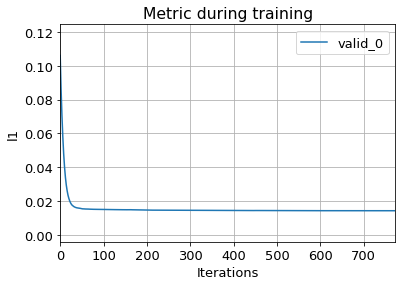

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0133178
[100]	valid_0's l1: 0.0126412
[150]	valid_0's l1: 0.0124614
[200]	valid_0's l1: 0.0123171
[250]	valid_0's l1: 0.0121717
[300]	valid_0's l1: 0.0121257
[350]	valid

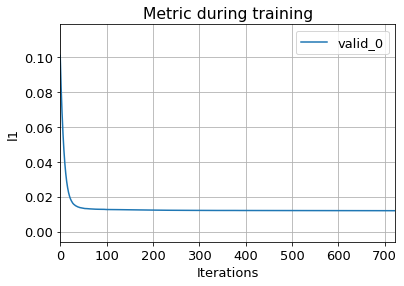

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0143991
[100]	valid_0's l1: 0.0134318
[150]	valid_0's l1: 0.013242
[200]	valid_0's l1: 0.0131604
[250]	valid_0's l1: 0.0130477
[300]	valid_0's l1: 0.0129942
[350]	valid_

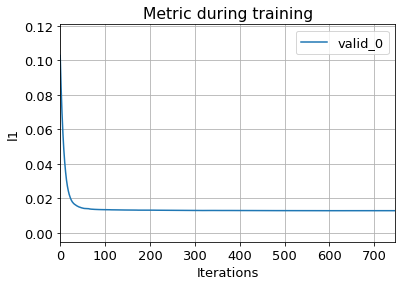

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0140988
[100]	valid_0's l1: 0.0131368
[150]	valid_0's l1: 0.0129373
[200]	valid_0's l1: 0.0128211
[250]	valid_0's l1: 0.0127092
[300]	valid_0's l1: 0.0126742
[350]	valid

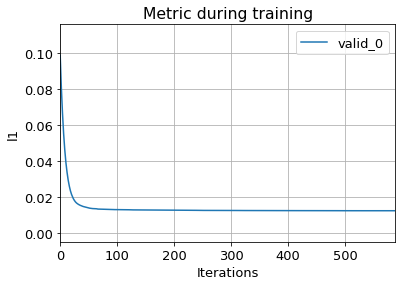

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.017498
[100]	valid_0's l1: 0.0168666
[150]	valid_0's l1: 0.016543
[200]	valid_0's l1: 0.0164069
[250]	valid_0's l1: 0.0162791
[300]	valid_0's l1: 0.0162411
[350]	valid_0's l1: 

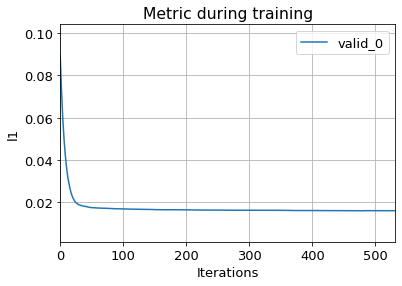

========== Starting level 8 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.11 Mb (74.8% reduction)
30 2
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.11 Mb (0.5% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 57390 rows and 6 columns
Selecting 65700 rows (114.5%)
Mem. usage decreased to  4.71 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_m

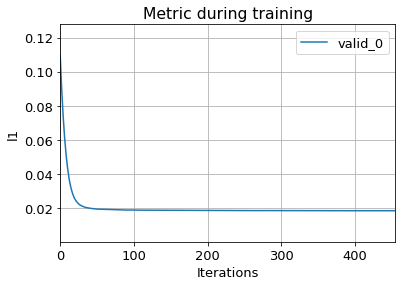

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0165804
[100]	valid_0's l1: 0.0159879
[150]	valid_0's l1: 0.0157996
[200]	valid_0's l1: 0.0157134
[250]	valid_0's l1: 0.0155963
[300]	valid_0's l1: 0.0155402
[350]	val

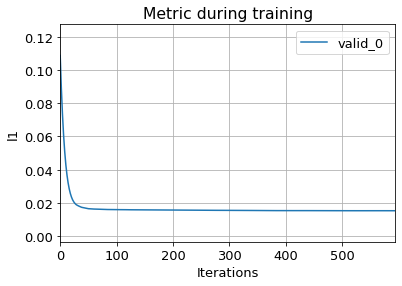

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0170933
[100]	valid_0's l1: 0.0165401
[150]	valid_0's l1: 0.0165004
[200]	valid_0's l1: 0.0163984
[250]	valid_0's l1: 0.0163611
[300]	valid_0's l1: 0.0162588
[350]	val

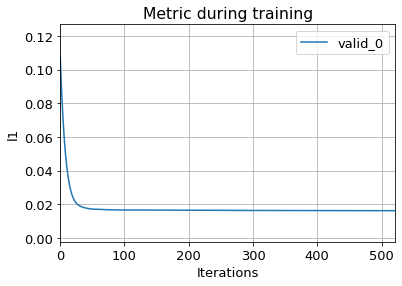

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0165277
[100]	valid_0's l1: 0.0158143
[150]	valid_0's l1: 0.015634
[200]	valid_0's l1: 0.0155106
[250]	valid_0's l1: 0.0154535
[300]	valid_0's l1: 0.0153882
[350]	vali

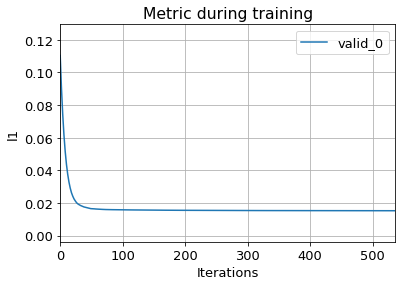

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0190201
[100]	valid_0's l1: 0.0185018
[150]	valid_0's l1: 0.0183536
[200]	valid_0's l1: 0.0182182
[250]	valid_0's l1: 0.0181326
[300]	valid_0's l1: 0.0180402
[350]	valid_0's 

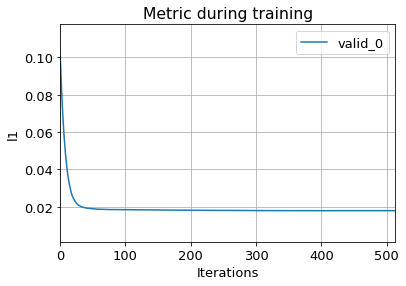

========== Starting level 9 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.26 Mb (74.8% reduction)
70 2
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.26 Mb (0.7% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 133910 rows and 7 columns
Selecting 153300 rows (114.5%)
Mem. usage decreased to 11.11 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling

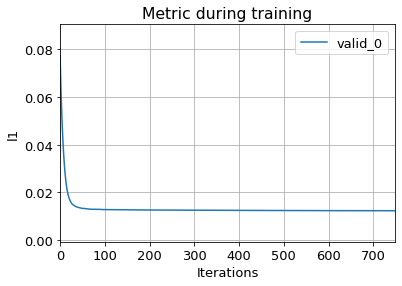

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0120713
[100]	valid_0's l1: 0.0114138
[150]	valid_0's l1: 0.0112838
[200]	valid_0's l1: 0.0111996
[250]	valid_0's l1: 0.0110772
[300]	valid_0's l1: 0.0110063

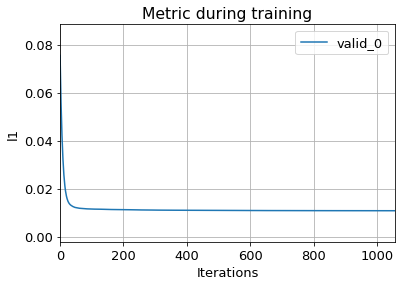

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0124026
[100]	valid_0's l1: 0.0116645
[150]	valid_0's l1: 0.0115379
[200]	valid_0's l1: 0.0114509
[250]	valid_0's l1: 0.0114213
[300]	valid_0's l1: 0.0113855

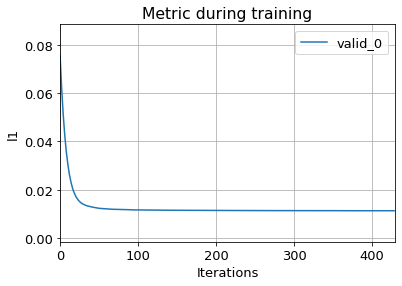

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0118727
[100]	valid_0's l1: 0.0112657
[150]	valid_0's l1: 0.0111275
[200]	valid_0's l1: 0.0110624
[250]	valid_0's l1: 0.0110156
[300]	valid_0's l1: 0.0109434

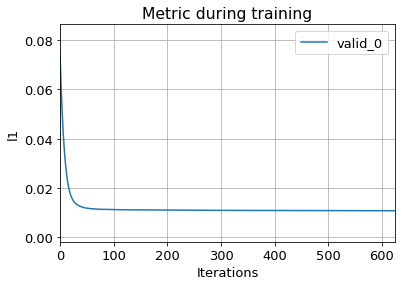

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0128039
[100]	valid_0's l1: 0.012137
[150]	valid_0's l1: 0.0119141
[200]	valid_0's l1: 0.0117878
[250]	valid_0's l1: 0.0117113
[300]	valid_0's l1: 0.0116703
[350]	v

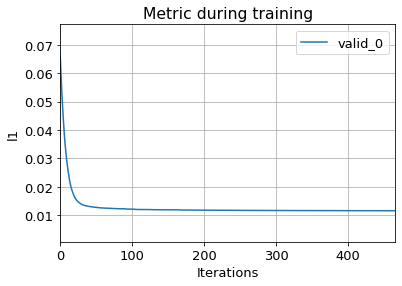

========== Starting level 10 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to 11.22 Mb (74.8% reduction)
3049 2
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to 11.16 Mb (0.5% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 5832737 rows and 6 columns
Selecting 6677310 rows (114.5%)
Mem. usage decreased to 483.94 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'r

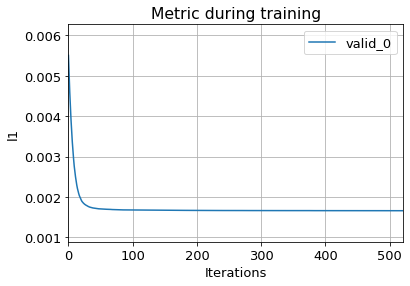

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00152594
[100]	valid_0's l1: 0.00149777
[150]	valid_0's l1: 0.00149217
[200]	valid_0's l1: 0.00148932
[250]	valid_0's l1: 0.00148644
[300]	valid_0's l1: 0.00148576
[350]	

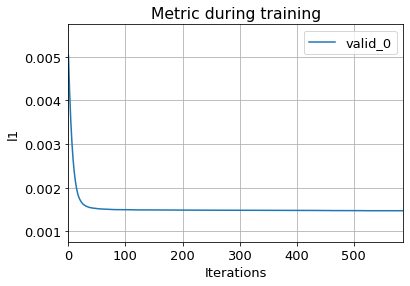

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00143267
[100]	valid_0's l1: 0.00139311
[150]	valid_0's l1: 0.00138803
[200]	valid_0's l1: 0.00138694
[250]	valid_0's l1: 0.00138451
[300]	valid_0's l1: 0.00138348
[350]	

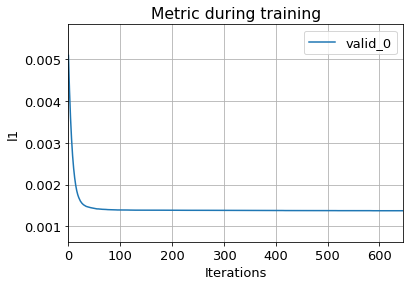

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00126077
[100]	valid_0's l1: 0.00121605
[150]	valid_0's l1: 0.00120995
[200]	valid_0's l1: 0.00120909
[250]	valid_0's l1: 0.00120582
[300]	valid_0's l1: 0.00120341
[350]	

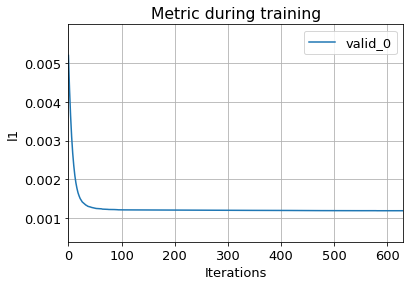

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00112641
[100]	valid_0's l1: 0.00107275
[150]	valid_0's l1: 0.00107236
Early stopping, best iteration is:
[117]	valid_0's l1: 0.00106969


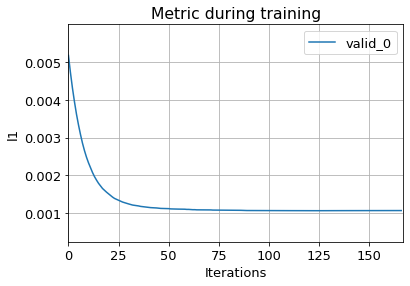

========== Starting level 11 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to 33.72 Mb (74.8% reduction)
9147 2
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to 33.49 Mb (0.7% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 17498211 rows and 7 columns
Selecting 20031930 rows (114.5%)
Mem. usage decreased to 1468.51 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7',

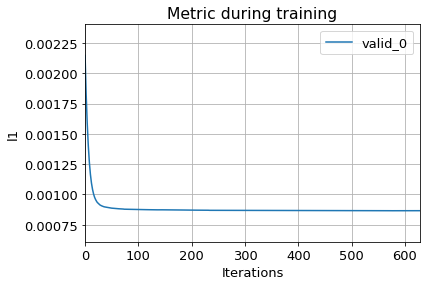

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000766269
[100]	valid_0's l1: 0.00075388
[150]	valid_0's l1: 0.000751293
[200]	valid_0's l1: 0.000749307
[250]	valid_0's l1: 0.00074864
[300]	valid_0's l1: 0.

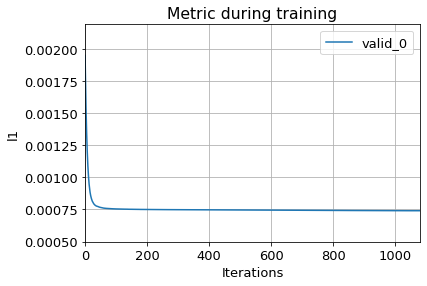

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000715664
[100]	valid_0's l1: 0.000697787
[150]	valid_0's l1: 0.000695667
[200]	valid_0's l1: 0.000693559
[250]	valid_0's l1: 0.000693083
[300]	valid_0's l1: 

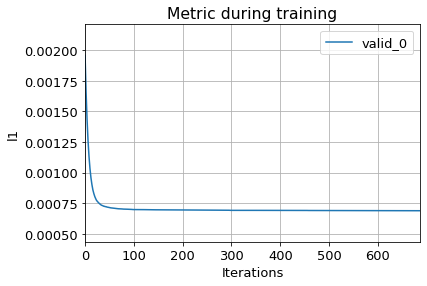

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000634768
[100]	valid_0's l1: 0.00061334
[150]	valid_0's l1: 0.000609222
[200]	valid_0's l1: 0.000607267
[250]	valid_0's l1: 0.000606382
[300]	valid_0's l1: 0

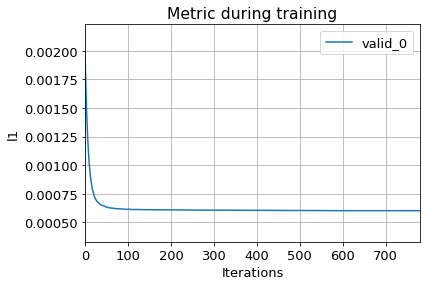

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000566575
[100]	valid_0's l1: 0.000538368
[150]	valid_0's l1: 0.000538935
Early stopping, best iteration is:
[147]	valid_0's l1: 0.000537041


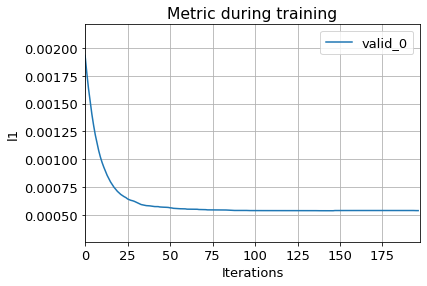

========== Starting level 12 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to 112.65 Mb (74.8% reduction)
30490 2
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to 111.66 Mb (0.9% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 58327370 rows and 8 columns
Selecting 22257700 rows (38.2%)
Our final dataset to train has 22257700 rows and 17 columns
Mem. usage decreased to 2186.34 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t

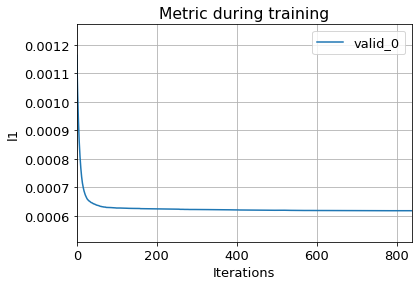

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-06-20 14:23:59.600000 and 2015-11-07 19:11:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000555727
[100]	valid_0's l1: 0.000544292
[

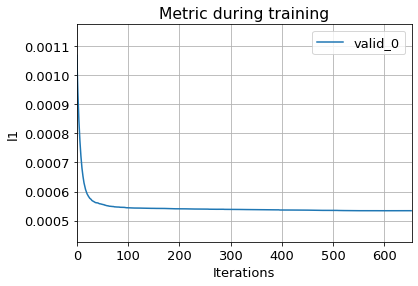

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-01-31 09:35:59.400000 and 2015-06-20 14:23:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000553804
Early stopping, best iteration is

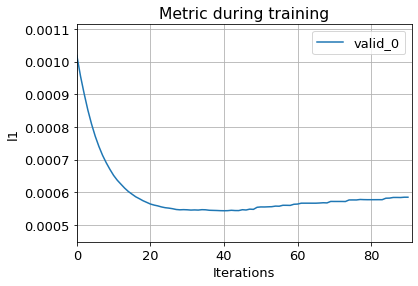

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-09-13 04:47:59.200000 and 2015-01-31 09:35:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000492684
[100]	valid_0's l1: 0.000479228
[

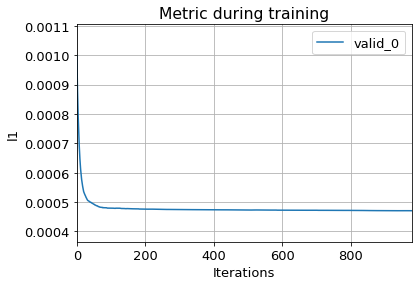

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t2', 'shift_t3', 'shift_t4', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-04-25 23:59:59 and 2014-09-13 04:47:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000490418
[100]	valid_0's l1: 0.000478617
[150]	va

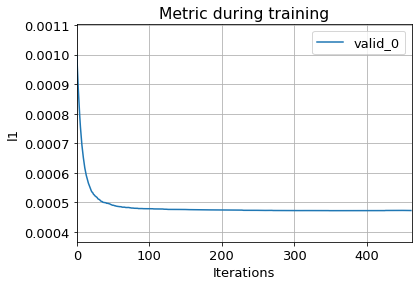

>>>>>>>>>>>>>>>> LAG IS 1 <<<<<<<<<<<<<<<
========== Starting level 1 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.00 Mb (74.6% reduction)
1 1
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.00 Mb (0.0% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 1913 rows and 3 columns
Selecting 2190 rows (114.5%)
Mem. usage decreased to  0.15 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_s

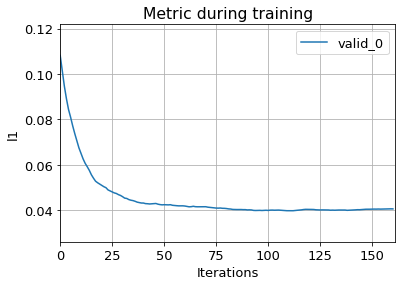

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0268998
[100]	valid_0's l1: 0.0265795
Early stopping, best iteration is:
[71]	valid_0's l1: 0.0263199


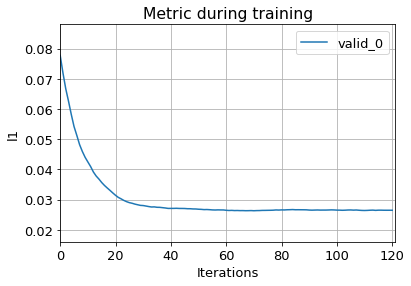

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0285322
[100]	valid_0's l1: 0.0276393
[150]	valid_0's l1: 0.0275058
Early stopping, best iteration is:
[129]	valid_0's l1: 0.0272366


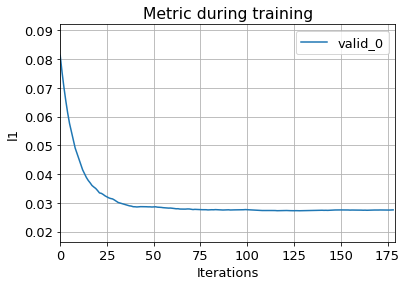

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.033175
[100]	valid_0's l1: 0.0324057
Early stopping, best iteration is:
[79]	valid_0's l1: 0.0322014


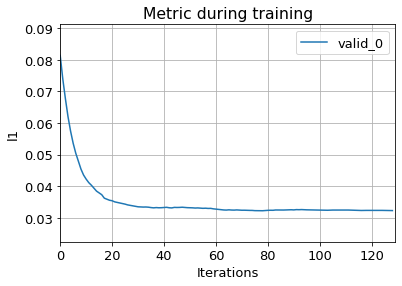

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0836825
[100]	valid_0's l1: 0.0828546
Early stopping, best iteration is:
[87]	valid_0's l1: 0.0805813


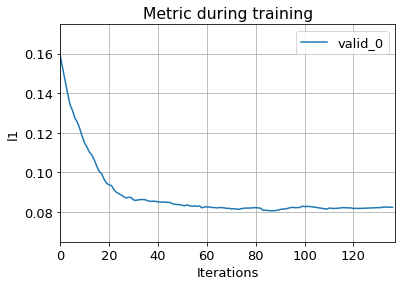

========== Starting level 2 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.01 Mb (74.8% reduction)
3 1
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.01 Mb (0.2% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 5739 rows and 4 columns
Selecting 6570 rows (114.5%)
Mem. usage decreased to  0.46 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean

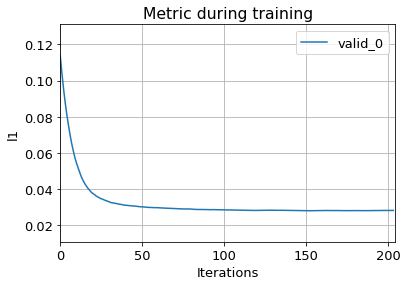

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0236051
[100]	valid_0's l1: 0.0223018
[150]	valid_0's l1: 0.0217899
[200]	valid_0's l1: 0.0213544
[250]	valid_0's l1: 0.0213199
[300]	valid_0's l1: 0.021276
[350]	valid_0's l1: 0.021182
[400

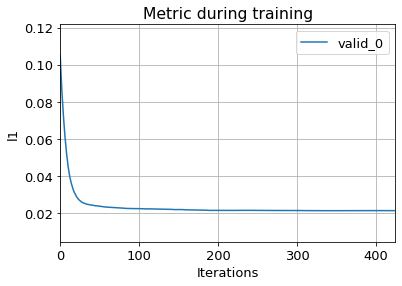

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0245644
[100]	valid_0's l1: 0.0227515
[150]	valid_0's l1: 0.0224812
Early stopping, best iteration is:
[128]	valid_0's l1: 0.0224266


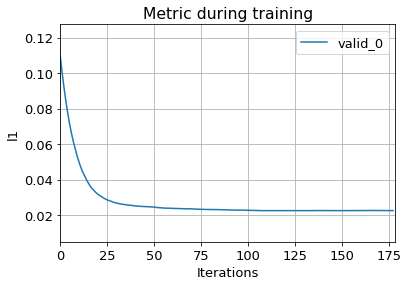

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0252695
[100]	valid_0's l1: 0.023884
[150]	valid_0's l1: 0.0235603
[200]	valid_0's l1: 0.0234181
[250]	valid_0's l1: 0.0235012
Early stopping, best iteration is:
[207]	valid_0's l1: 0.023410

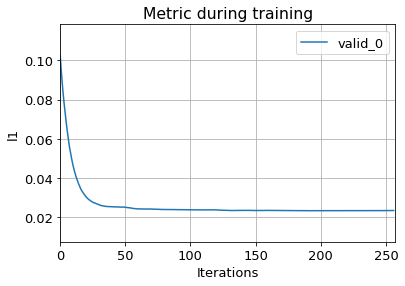

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0329616
[100]	valid_0's l1: 0.0324244
[150]	valid_0's l1: 0.0323855
Early stopping, best iteration is:
[125]	valid_0's l1: 0.0321019


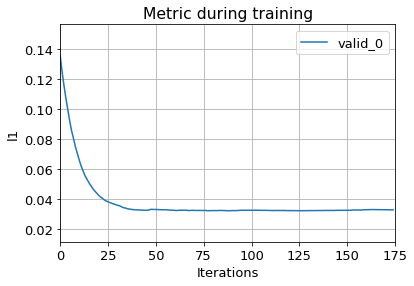

========== Starting level 3 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.04 Mb (74.8% reduction)
10 1
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.04 Mb (0.4% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 19130 rows and 5 columns
Selecting 21900 rows (114.5%)
Mem. usage decreased to  1.55 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_m

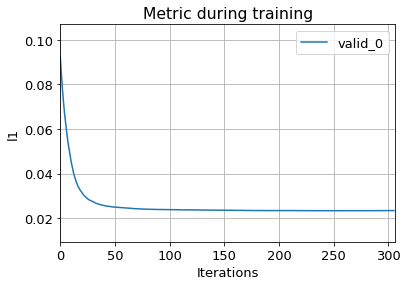

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0217925
[100]	valid_0's l1: 0.0208405
[150]	valid_0's l1: 0.0205875
[200]	valid_0's l1: 0.0203321
[250]	valid_0's l1: 0.0203416
Early stopping, best iteration is:
[224]	valid_0's

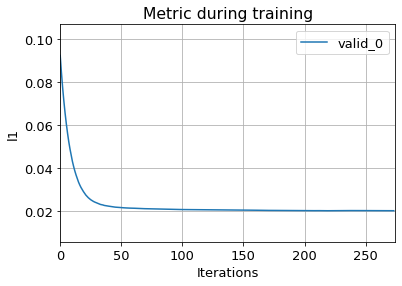

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0225095
[100]	valid_0's l1: 0.0215352
[150]	valid_0's l1: 0.0212715
[200]	valid_0's l1: 0.0211724
[250]	valid_0's l1: 0.0211123
[300]	valid_0's l1: 0.0209945
[350]	valid_0's l1: 

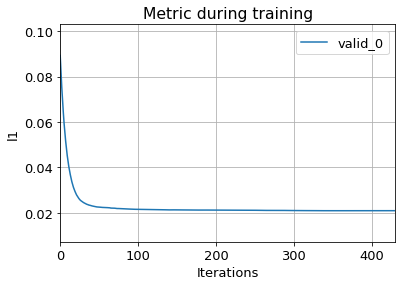

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.022318
[100]	valid_0's l1: 0.0214231
[150]	valid_0's l1: 0.0213679
[200]	valid_0's l1: 0.0212102
[250]	valid_0's l1: 0.0211143
[300]	valid_0's l1: 0.0211173
[350]	valid_0's l1: 0

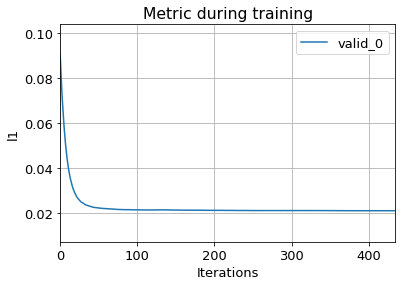

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0218376
[100]	valid_0's l1: 0.0212272
[150]	valid_0's l1: 0.0209583
[200]	valid_0's l1: 0.0208963
[250]	valid_0's l1: 0.0207345
[300]	valid_0's l1: 0.0206757
Early stopping, best iterat

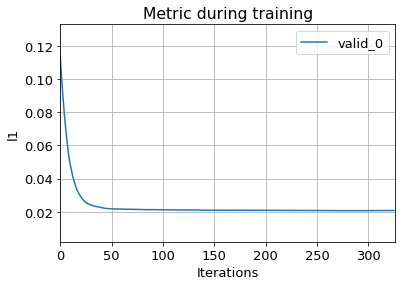

========== Starting level 4 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.01 Mb (74.8% reduction)
3 1
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.01 Mb (0.2% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 5739 rows and 4 columns
Selecting 6570 rows (114.5%)
Mem. usage decreased to  0.46 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean

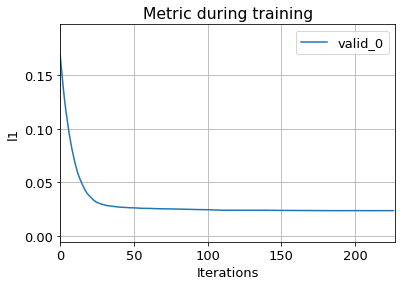

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.017308
[100]	valid_0's l1: 0.0167124
[150]	valid_0's l1: 0.0166042
[200]	valid_0's l1: 0.0163692
[250]	valid_0's l1: 0.0162913
Early stopping, best iteration is:
[235]	valid_0's l1: 0.016243


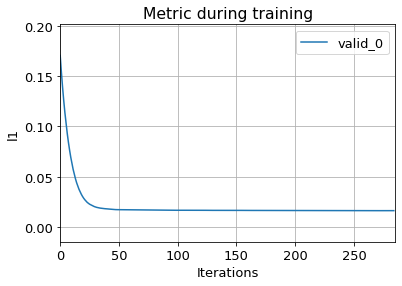

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0184034
[100]	valid_0's l1: 0.0177892
[150]	valid_0's l1: 0.0177466
Early stopping, best iteration is:
[140]	valid_0's l1: 0.0177332


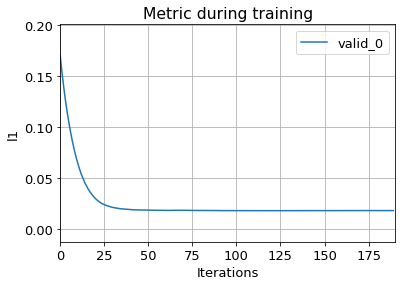

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0199178
[100]	valid_0's l1: 0.0186007
[150]	valid_0's l1: 0.018226
[200]	valid_0's l1: 0.0180463
Early stopping, best iteration is:
[168]	valid_0's l1: 0.017977


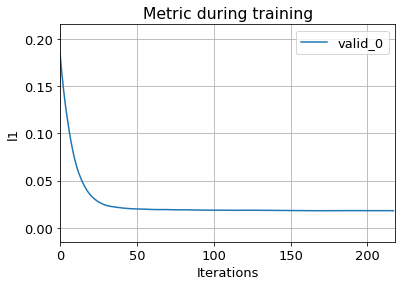

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0370718
[100]	valid_0's l1: 0.0365737
[150]	valid_0's l1: 0.0363815
Early stopping, best iteration is:
[137]	valid_0's l1: 0.0362531


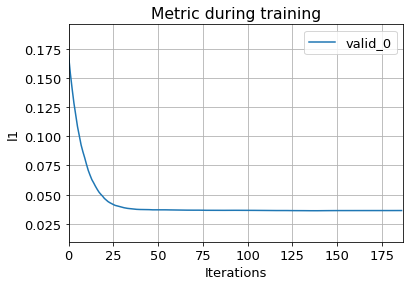

========== Starting level 5 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.03 Mb (74.8% reduction)
7 1
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.03 Mb (0.4% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 13391 rows and 5 columns
Selecting 15330 rows (114.5%)
Mem. usage decreased to  1.09 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_me

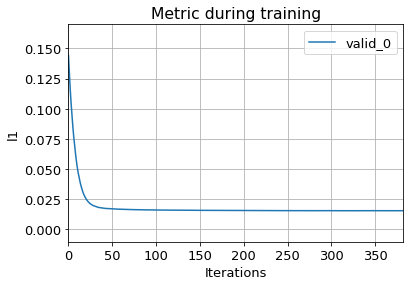

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0138212
[100]	valid_0's l1: 0.0128556
[150]	valid_0's l1: 0.0127047
[200]	valid_0's l1: 0.0126366
[250]	valid_0's l1: 0.0125822
[300]	valid_0's l1: 0.0126012
Early stopping, best it

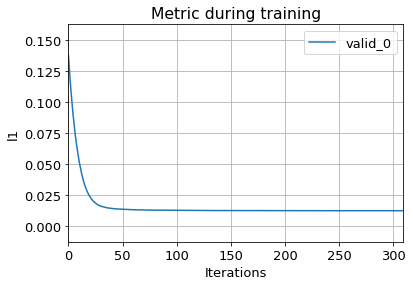

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0152754
[100]	valid_0's l1: 0.0143363
[150]	valid_0's l1: 0.014107
[200]	valid_0's l1: 0.0140147
[250]	valid_0's l1: 0.0138911
[300]	valid_0's l1: 0.0138737
[350]	valid_0's l1: 0.01

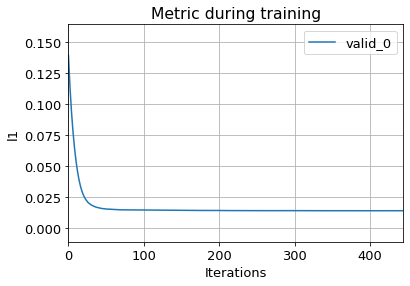

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0152251
[100]	valid_0's l1: 0.0139577
[150]	valid_0's l1: 0.0136631
[200]	valid_0's l1: 0.0135173
[250]	valid_0's l1: 0.0134547
[300]	valid_0's l1: 0.0133949
[350]	valid_0's l1: 0.0

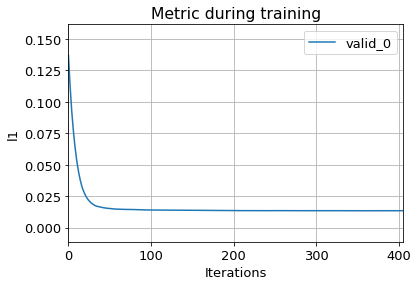

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0225538
[100]	valid_0's l1: 0.0216391
[150]	valid_0's l1: 0.0215515
Early stopping, best iteration is:
[131]	valid_0's l1: 0.0215032


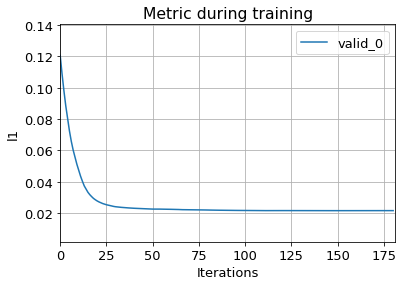

========== Starting level 6 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.03 Mb (74.8% reduction)
9 1
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.03 Mb (0.4% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 17217 rows and 5 columns
Selecting 19710 rows (114.5%)
Mem. usage decreased to  1.40 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_me

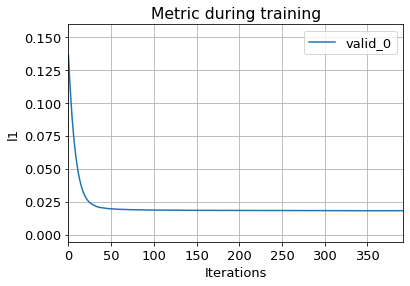

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0161079
[100]	valid_0's l1: 0.0153025
[150]	valid_0's l1: 0.0150949
[200]	valid_0's l1: 0.0149771
Early stopping, best iteration is:
[193]	valid_0's l1: 0.014963


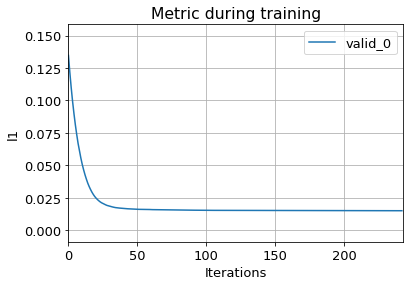

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0175748
[100]	valid_0's l1: 0.0168367
[150]	valid_0's l1: 0.0166311
[200]	valid_0's l1: 0.0164225
[250]	valid_0's l1: 0.0164201
[300]	valid_0's l1: 0.0163863
[350]	valid_0's l1: 0.

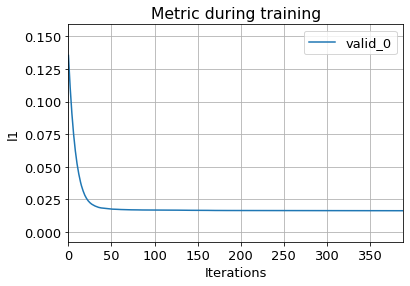

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.017215
[100]	valid_0's l1: 0.0162428
[150]	valid_0's l1: 0.0163727
Early stopping, best iteration is:
[119]	valid_0's l1: 0.0162008


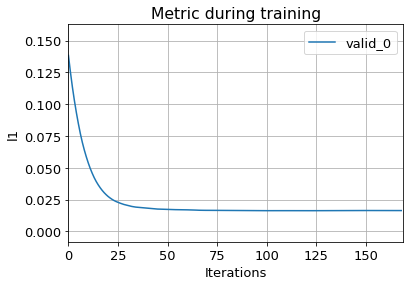

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0201008
[100]	valid_0's l1: 0.0194981
[150]	valid_0's l1: 0.0192391
[200]	valid_0's l1: 0.0190786
[250]	valid_0's l1: 0.019027
Early stopping, best iteration is:
[230]	valid_0's l1: 0.018

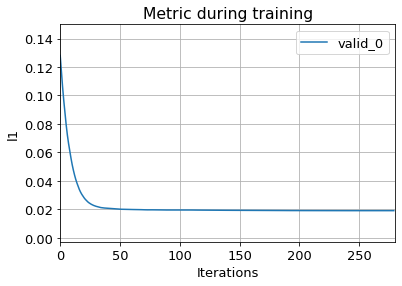

========== Starting level 7 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.08 Mb (74.8% reduction)
21 1
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.08 Mb (0.5% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 40173 rows and 6 columns
Selecting 45990 rows (114.5%)
Mem. usage decreased to  3.29 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_m

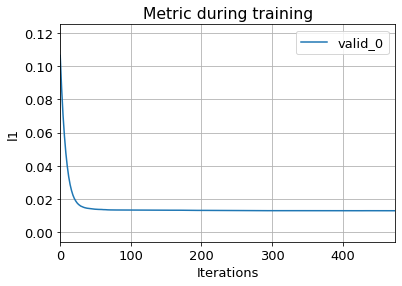

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0122827
[100]	valid_0's l1: 0.0116484
[150]	valid_0's l1: 0.0114961
[200]	valid_0's l1: 0.0113472
[250]	valid_0's l1: 0.0112155
[300]	valid_0's l1: 0.0111615
[350]	valid

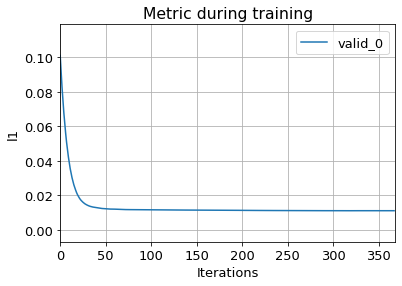

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0132664
[100]	valid_0's l1: 0.0124633
[150]	valid_0's l1: 0.0123456
[200]	valid_0's l1: 0.0121571
[250]	valid_0's l1: 0.0120629
[300]	valid_0's l1: 0.0120228
[350]	valid

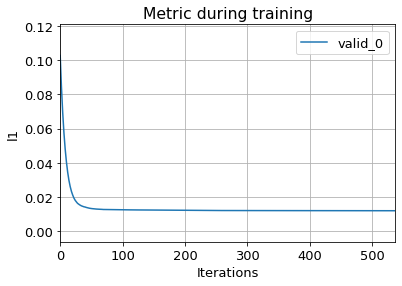

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0125307
[100]	valid_0's l1: 0.0116477
[150]	valid_0's l1: 0.0115791
[200]	valid_0's l1: 0.0114449
[250]	valid_0's l1: 0.011384
[300]	valid_0's l1: 0.0112939
[350]	valid_

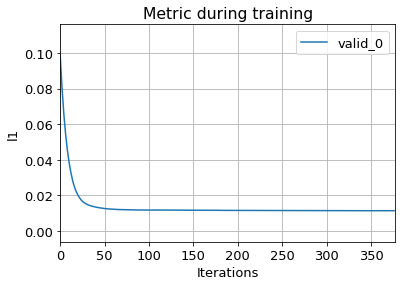

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0151515
[100]	valid_0's l1: 0.014578
[150]	valid_0's l1: 0.0144765
[200]	valid_0's l1: 0.0144049
[250]	valid_0's l1: 0.0143419
[300]	valid_0's l1: 0.014358
Early stopping, best

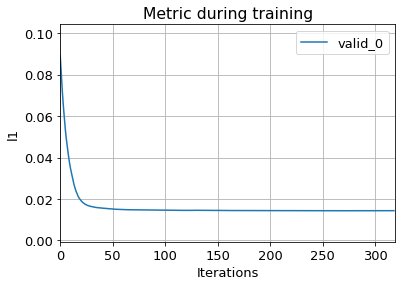

========== Starting level 8 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.11 Mb (74.8% reduction)
30 1
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.11 Mb (0.5% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 57390 rows and 6 columns
Selecting 65700 rows (114.5%)
Mem. usage decreased to  4.71 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_m

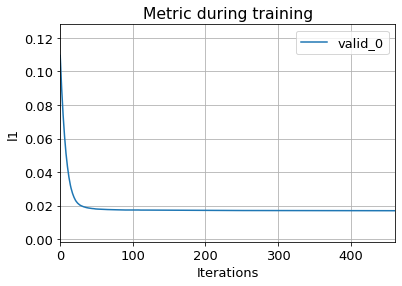

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0158074
[100]	valid_0's l1: 0.0151129
[150]	valid_0's l1: 0.0150066
[200]	valid_0's l1: 0.0148676
[250]	valid_0's l1: 0.0147566
[300]	valid_0's l1: 0.0147194
[350]	val

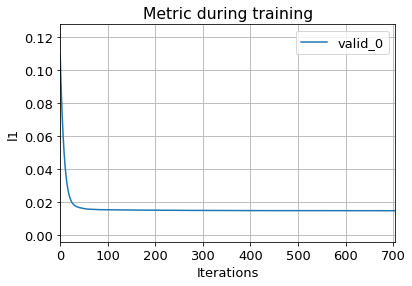

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.016403
[100]	valid_0's l1: 0.0158138
[150]	valid_0's l1: 0.0157167
[200]	valid_0's l1: 0.0156013
[250]	valid_0's l1: 0.0155228
[300]	valid_0's l1: 0.0154711
[350]	vali

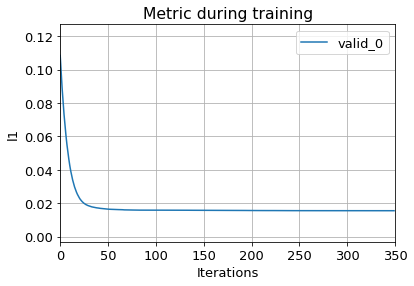

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0153956
[100]	valid_0's l1: 0.0146808
[150]	valid_0's l1: 0.0145663
[200]	valid_0's l1: 0.0144882
[250]	valid_0's l1: 0.0144342
[300]	valid_0's l1: 0.0143502
[350]	val

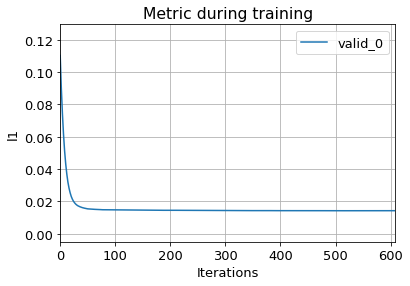

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.016751
[100]	valid_0's l1: 0.016203
[150]	valid_0's l1: 0.0160803
[200]	valid_0's l1: 0.0159638
[250]	valid_0's l1: 0.0159248
[300]	valid_0's l1: 0.0158566
[350]	valid_0's l1

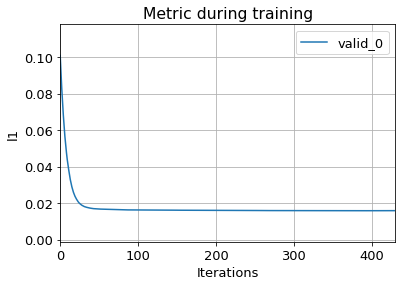

========== Starting level 9 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to  0.26 Mb (74.8% reduction)
70 1
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to  0.26 Mb (0.7% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 133910 rows and 7 columns
Selecting 153300 rows (114.5%)
Mem. usage decreased to 11.11 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling

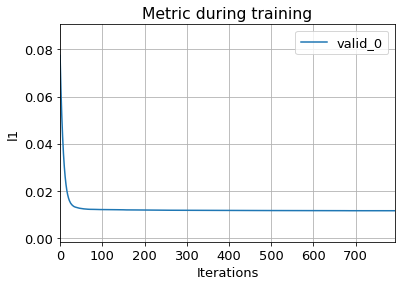

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0114442
[100]	valid_0's l1: 0.0108991
[150]	valid_0's l1: 0.0107819
[200]	valid_0's l1: 0.010648
[250]	valid_0's l1: 0.0105353
[300]	valid_0's l1: 0.0104881


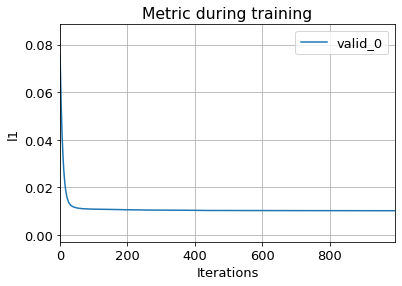

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0117394
[100]	valid_0's l1: 0.0110948
[150]	valid_0's l1: 0.0109958
[200]	valid_0's l1: 0.0108583
[250]	valid_0's l1: 0.0108089
[300]	valid_0's l1: 0.0107692

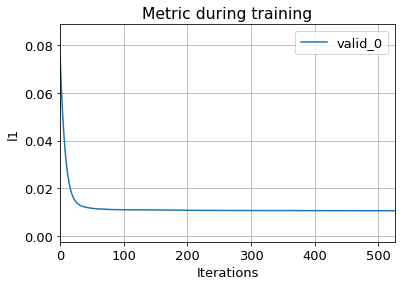

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.010954
[100]	valid_0's l1: 0.010391
[150]	valid_0's l1: 0.0103025
[200]	valid_0's l1: 0.0102539
[250]	valid_0's l1: 0.0101925
[300]	valid_0's l1: 0.0101143
[

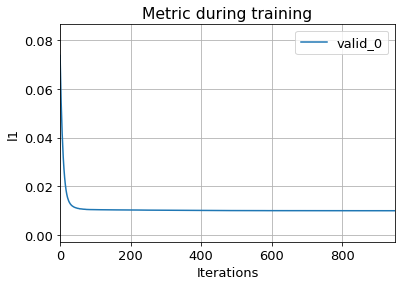

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0109079
[100]	valid_0's l1: 0.0104535
[150]	valid_0's l1: 0.0103722
[200]	valid_0's l1: 0.0102801
[250]	valid_0's l1: 0.0101842
[300]	valid_0's l1: 0.010155
[350]	v

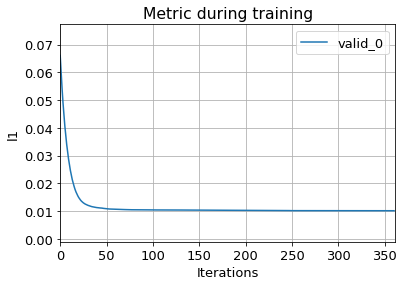

========== Starting level 10 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to 11.22 Mb (74.8% reduction)
3049 1
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to 11.16 Mb (0.5% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 5832737 rows and 6 columns
Selecting 6677310 rows (114.5%)
Mem. usage decreased to 483.94 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'r

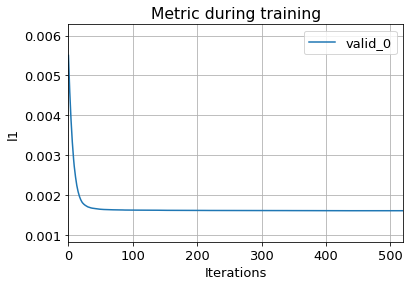

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.0014465
[100]	valid_0's l1: 0.00141958
[150]	valid_0's l1: 0.0014166
[200]	valid_0's l1: 0.00141498
[250]	valid_0's l1: 0.00141253
[300]	valid_0's l1: 0.00141201
[350]	va

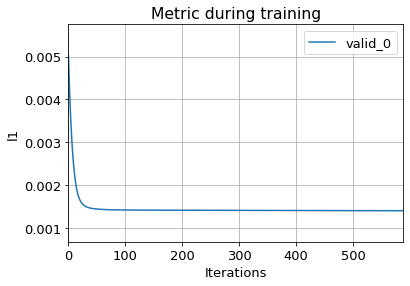

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00135399
[100]	valid_0's l1: 0.00131924
[150]	valid_0's l1: 0.00131411
[200]	valid_0's l1: 0.00131213
[250]	valid_0's l1: 0.00131043
[300]	valid_0's l1: 0.0013093
[350]	v

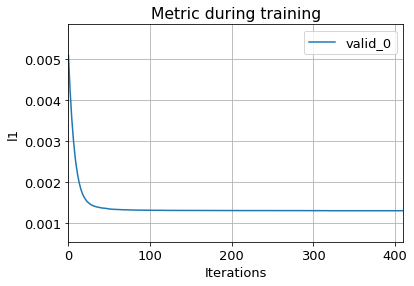

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00120341
[100]	valid_0's l1: 0.00115261
[150]	valid_0's l1: 0.00114831
[200]	valid_0's l1: 0.00114732
[250]	valid_0's l1: 0.00114439
[300]	valid_0's l1: 0.0011433
[350]	v

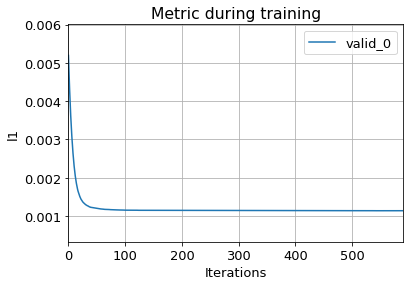

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00106016
[100]	valid_0's l1: 0.00100746
[150]	valid_0's l1: 0.0010039
Early stopping, best iteration is:
[130]	valid_0's l1: 0.00100331


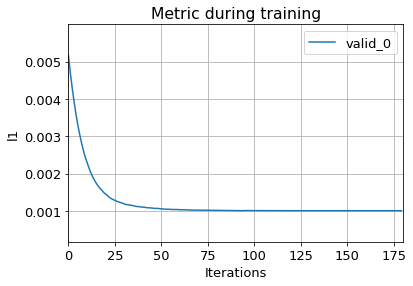

========== Starting level 11 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to 33.72 Mb (74.8% reduction)
9147 1
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to 33.49 Mb (0.7% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 17498211 rows and 7 columns
Selecting 20031930 rows (114.5%)
Mem. usage decreased to 1468.51 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7',

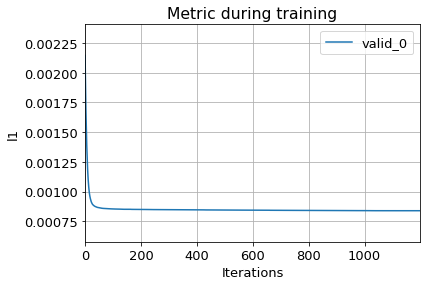

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2014-03-04 09:35:59.600000 and 2015-03-16 04:47:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000742193
[100]	valid_0's l1: 0.000729902
[150]	valid_0's l1: 0.000728512
[200]	valid_0's l1: 0.000726734
[250]	valid_0's l1: 0.000725777
[300]	valid_0's l1: 

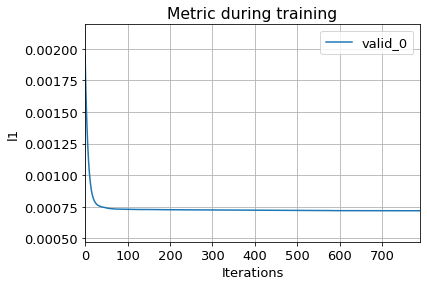

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2013-02-20 14:23:59.400000 and 2014-03-04 09:35:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000686288
[100]	valid_0's l1: 0.000670294
[150]	valid_0's l1: 0.000667006
[200]	valid_0's l1: 0.000664957
[250]	valid_0's l1: 0.000663699
[300]	valid_0's l1: 

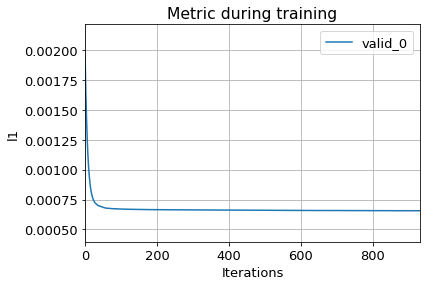

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2012-02-09 19:11:59.200000 and 2013-02-20 14:23:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000613768
[100]	valid_0's l1: 0.00059369
[150]	valid_0's l1: 0.000589919
[200]	valid_0's l1: 0.000587031
[250]	valid_0's l1: 0.000586213
[300]	valid_0's l1: 0

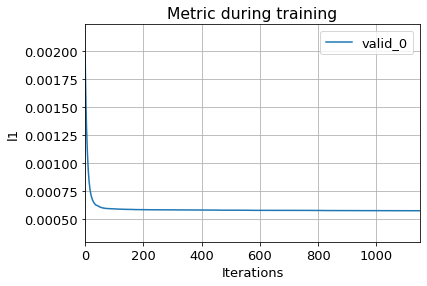

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'cat_id', 'dept_id', 'item_id']
Selecing validation days between 2011-01-28 23:59:59 and 2012-02-09 19:11:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000542742
[100]	valid_0's l1: 0.000514703
[150]	valid_0's l1: 0.000514103
[200]	valid_0's l1: 0.00051261
Early stopping, best iteration is:
[191]	valid_0's l1: 0.000

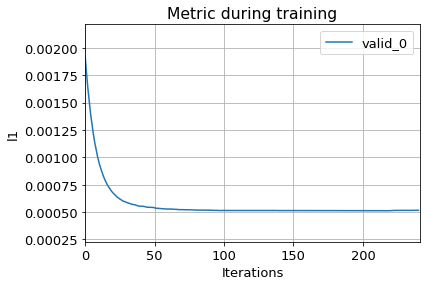

========== Starting level 12 ==========
== Starting fold 1 ==
Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns
Mem. usage decreased to 112.65 Mb (74.8% reduction)
30490 1
Mem. usage decreased to  0.08 Mb (36.9% reduction)
Mem. usage decreased to 111.66 Mb (0.9% reduction)
Mem. usage decreased to 45.67 Mb (65.0% reduction)
Melted sales train validation has 58327370 rows and 8 columns
Selecting 22257700 rows (38.2%)
Our final dataset to train has 22257700 rows and 17 columns
Mem. usage decreased to 2186.34 Mb (0.0% reduction)
Saving to file..
Finished.
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t

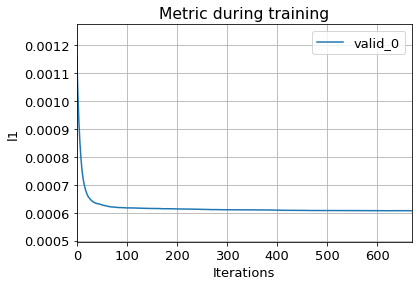

== Starting fold 2 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-06-20 14:23:59.600000 and 2015-11-07 19:11:59.800000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.00054369
[100]	valid_0's l1: 0.000533897
[1

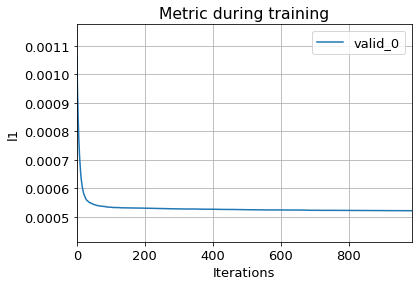

== Starting fold 3 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2015-01-31 09:35:59.400000 and 2015-06-20 14:23:59.600000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000528992
Early stopping, best iteration is

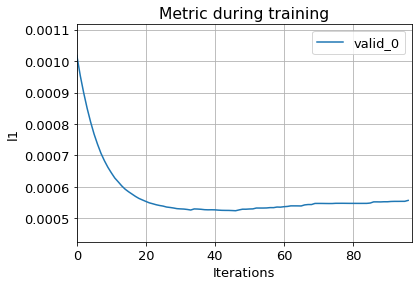

== Starting fold 4 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-09-13 04:47:59.200000 and 2015-01-31 09:35:59.400000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000479554
[100]	valid_0's l1: 0.000470698
[

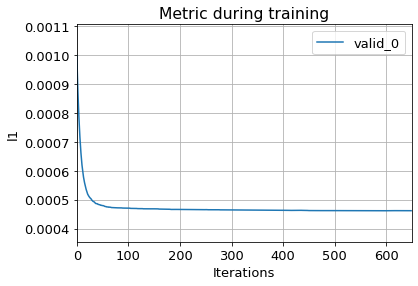

== Starting fold 5 ==
Reading from file..
Converting to pandas data..
Resetting categories..
['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'shift_t1', 'shift_t2', 'shift_t3', 'rolling_std_t7', 'rolling_std_t30', 'rolling_std_t60', 'rolling_std_t90', 'rolling_std_t180', 'rolling_mean_t7', 'rolling_mean_t30', 'rolling_mean_t60', 'rolling_mean_t90', 'rolling_mean_t180', 'rolling_skew_t30', 'rolling_kurt_t30', 'year', 'month', 'week', 'day', 'dayofweek', 'is_year_end', 'is_year_start', 'is_quarter_end', 'is_quarter_start', 'is_month_end', 'is_month_start', 'is_weekend', 'state_id', 'store_id', 'cat_id', 'dept_id', 'item_id', 'sell_price', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30']
Selecing validation days between 2014-04-25 23:59:59 and 2014-09-13 04:47:59.200000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l1: 0.000474693
[100]	valid_0's l1: 0.00046276
[150]	val

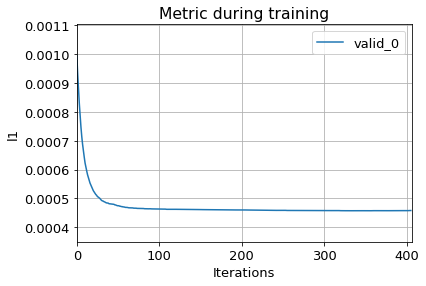

In [5]:
for lag in [28, 21, 14, 7, 3, 2, 1]:
    print(">>>>>>>>>>>>>>>> LAG IS {} <<<<<<<<<<<<<<<".format(lag))
    for level in range(1, 1+12):
        print("========== Starting level {} ==========".format(level))
        for fold in range(1, 1+5):
            print("== Starting fold {} ==".format(fold))
            # train
            model, evals_result, val = train_lightgbm_model(level, fold=fold, params=params, model_dir=model_dir,
                                                           prediction_lag=lag)